In [978]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [979]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (10,5) # figure size in inches
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Index:
* [Checking Data Types](#first-bullet)
* [Univariate Analysis](#second-bullet)
* [Bivariate Analysis](#third-bullet)
* [Multivariate Analysis](#fourth-bullet)
* [Missing Values](#fifth-bullet)
* [Outliers](#sixth-bullet)
* [Model Building](#seventh-bullet)

## Reading The DataSet

In [980]:
df = pd.read_csv('patient-survival.csv')
df.shape

(91713, 85)

In [981]:
df.head()

encounter_id  patient_id  hospital_id   age    bmi  elective_surgery  \
0         66154       25312          118  68.0  22.73                 0   
1        114252       59342           81  77.0  27.42                 0   
2        119783       50777          118  25.0  31.95                 0   
3         79267       46918          118  81.0  22.64                 1   
4         92056       34377           33  19.0    NaN                 0   

   ethnicity gender  height           icu_admit_source  icu_id icu_stay_type  \
0  Caucasian      M   180.3                      Floor      92         admit   
1  Caucasian      F   160.0                      Floor      90         admit   
2  Caucasian      F   172.7       Accident & Emergency      93         admit   
3  Caucasian      F   165.1  Operating Room / Recovery      92         admit   
4  Caucasian      M   188.0       Accident & Emergency      91         admit   

       icu_type  pre_icu_los_days  weight  apache_2_diagnosis  \
0         CTICU          0.541667    73.9               113.0   
1  Med-Surg ICU          0.927778    70.2               108.0   
2  Med-Surg ICU          0.000694    95.3               122.0   
3         CTICU          0.000694    61.7               203.0   
4  Med-Surg ICU          0.073611     NaN               119.0   

   apache_3j_diagnosis  apache_post_operative  arf_apache  gcs_eyes_apache  \
0               502.01                      0         0.0              3.0   
1               203.01                      0         0.0              1.0   
2               703.03                      0         0.0              3.0   
3              1206.03                      1         0.0              4.0   
4               601.01                      0         0.0              NaN   

   gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  heart_rate_apache  \
0               6.0                0.0                4.0              118.0   
1               3.0                0.0                1.0              120.0   
2               6.0                0.0                5.0              102.0   
3               6.0                0.0                5.0              114.0   
4               NaN                NaN                NaN               60.0   

   intubated_apache  map_apache  resprate_apache  temp_apache  \
0               0.0        40.0             36.0         39.3   
1               0.0        46.0             33.0         35.1   
2               0.0        68.0             37.0         36.7   
3               1.0        60.0              4.0         34.8   
4               0.0       103.0             16.0         36.7   

   ventilated_apache  d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
0                0.0           68.0           37.0                       68.0   
1                1.0           95.0           31.0                       95.0   
2                0.0           88.0           48.0                       88.0   
3                1.0           48.0           42.0                       48.0   
4                0.0           99.0           57.0                       99.0   

   d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_max  \
0                       37.0             119.0              72.0        89.0   
1                       31.0             118.0              72.0       120.0   
2                       48.0              96.0              68.0       102.0   
3                       42.0             116.0              92.0        84.0   
4                       57.0              89.0              60.0       104.0   

   d1_mbp_min  d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  \
0        46.0                    89.0                    46.0   
1        38.0                   120.0                    38.0   
2        68.0                   102.0                    68.0   
3        84.0                    84.0                    84.0   
4        90.0                   104.0         

## Data Types

In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

## Data Summary

In [983]:
df.describe(include='all')

encounter_id     patient_id   hospital_id           age  \
count    91713.000000   91713.000000  91713.000000  87485.000000   
unique            NaN            NaN           NaN           NaN   
top               NaN            NaN           NaN           NaN   
freq              NaN            NaN           NaN           NaN   
mean     65606.079280   65537.131464    105.669262     62.309516   
std      37795.088538   37811.252183     62.854406     16.775119   
min          1.000000       1.000000      2.000000     16.000000   
25%      32852.000000   32830.000000     47.000000     52.000000   
50%      65665.000000   65413.000000    109.000000     65.000000   
75%      98342.000000   98298.000000    161.000000     75.000000   
max     131051.000000  131051.000000    204.000000     89.000000   

                 bmi  elective_surgery  ethnicity gender        height  \
count   88284.000000      91713.000000      90318  91688  90379.000000   
unique           NaN               NaN          6      2           NaN   
top              NaN               NaN  Caucasian      M           NaN   
freq             NaN               NaN      70684  49469           NaN   
mean       29.185818          0.183736        NaN    NaN    169.641588   
std         8.275142          0.387271        NaN    NaN     10.795378   
min        14.844926          0.000000        NaN    NaN    137.200000   
25%        23.641975          0.000000        NaN    NaN    162.500000   
50%        27.654655          0.000000        NaN    NaN    170.100000   
75%        32.930206          0.000000        NaN    NaN    177.800000   
max        67.814990          1.000000        NaN    NaN    195.590000   

            icu_admit_source        icu_id icu_stay_type      icu_type  \
count                  91601  91713.000000         91713         91713   
unique                     5           NaN             3             8   
top     Accident & Emergency           NaN         admit  Med-Surg ICU   
freq                   54060           NaN         86183         50586   
mean                     NaN    508.357692           NaN           NaN   
std                      NaN    228.989661           NaN           NaN   
min                      NaN     82.000000           NaN           NaN   
25%                      NaN    369.000000           NaN           NaN   
50%                      NaN    504.000000           NaN           NaN   
75%                      NaN    679.000000           NaN           NaN   
max                      NaN    927.000000           NaN           NaN   

        pre_icu_los_days        weight  apache_2_diagnosis  \
count       91713.000000  88993.000000        90051.000000   
unique               NaN           NaN                 NaN   
top                  NaN           NaN                 NaN   
freq                 NaN           NaN                 NaN   
mean            0.835766     84.028340          185.401739   
std             2.487756     25.011497           86.050882   
min           -24.947222     38.600000          101.000000   
25%             0.035417     66.800000          113.000000   
50%             0.138889     80.300000          122.000000   
75%             0.409028     97.100000          301.000000   
max           159.090972    186.000000          308.000000   

        apache_3j_diagnosis  apache_post_operative    arf_apache  \
count          90612.000000           91713.000000  90998.000000   
unique                  NaN                    NaN           NaN   
top                     NaN                    NaN           NaN   
freq                    NaN                    NaN           NaN   
mean             558.216377               0.201106      0.027979   
std              463.266985               0.400829      0.164912   
min                0.010000               0.000000      0.000000   
25%              203.010000               0.000000      0.000000   
50%              409.020000               0.000000      0

## Removing unnecessary columns

In [984]:
df['patient_id'].duplicated().sum()

0

In [985]:
df['encounter_id'].duplicated().sum()

0

In [986]:
df['icu_id'].duplicated().sum()

91472

In [987]:
df['hospital_id'].duplicated().sum()

91566

<AxesSubplot:xlabel='hospital_id', ylabel='count'>

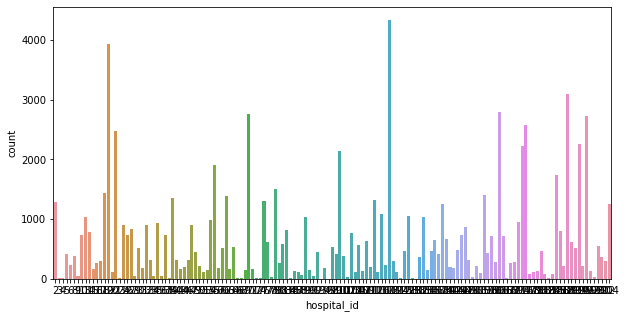

In [988]:
sns.countplot(data=df, x='hospital_id')

In [989]:
# Since these columns are arbitrary and are only used for identification, we will drop them

In [990]:
df = df.drop(columns=['Unnamed: 83', 'patient_id', 'encounter_id', 'hospital_id', 'icu_id'])

In [991]:
# New shape
df.shape

(91713, 80)

In [992]:
# duplicate rows
df.duplicated().sum()

0

## Checking Data Types <a class="anchor" id="first-bullet"></a>

In [993]:
df_cat = df.select_dtypes('object')
df_cat.shape

(91713, 7)

In [994]:
df_num = df.select_dtypes('number')
df_num.shape

(91713, 73)

In [995]:
# No of categories in categorical variables

In [996]:
for col in df_cat.columns:
    print(f'{col:>20}: ',df_cat[col].value_counts().count())

           ethnicity:  6
              gender:  2
    icu_admit_source:  5
       icu_stay_type:  3
            icu_type:  8
apache_3j_bodysystem:  11
 apache_2_bodysystem:  10


In [997]:
# some numerical columns have very few unique values, they are possibly categorical
categorical_columns = []
for col in df_num.columns:
    cats = df_num[col].value_counts()
    if cats.count() <= 10: 
        categorical_columns.append(col)
        print(f'{col:>30}: ',cats.index.to_list())

              elective_surgery:  [0, 1]
         apache_post_operative:  [0, 1]
                    arf_apache:  [0.0, 1.0]
               gcs_eyes_apache:  [4.0, 3.0, 1.0, 2.0]
              gcs_motor_apache:  [6.0, 5.0, 1.0, 4.0, 3.0, 2.0]
             gcs_unable_apache:  [0.0, 1.0]
             gcs_verbal_apache:  [5.0, 1.0, 4.0, 3.0, 2.0]
              intubated_apache:  [0.0, 1.0]
             ventilated_apache:  [0.0, 1.0]
                          aids:  [0.0, 1.0]
                     cirrhosis:  [0.0, 1.0]
             diabetes_mellitus:  [0.0, 1.0]
               hepatic_failure:  [0.0, 1.0]
             immunosuppression:  [0.0, 1.0]
                      leukemia:  [0.0, 1.0]
                      lymphoma:  [0.0, 1.0]
   solid_tumor_with_metastasis:  [0.0, 1.0]
                hospital_death:  [0, 1]


In [998]:
# All these variables need to be converted to categorical

In [999]:
# separate numerical and categorical again

In [1000]:
for col in categorical_columns:
    df[col] = df[col].astype('object')

In [1001]:
df_num = df.select_dtypes('number')
numerical_columns = df_num.columns
df_num.shape

(91713, 55)

In [1002]:
df_cat = df.select_dtypes('object')
categorical_columns = df_cat.columns
df_cat.shape

(91713, 25)

In [1003]:
# Display categories of multicategory variables
for col in categorical_columns:
    if df_cat[col].value_counts().count()>2:
        print('\n')
        print(df_cat[col].value_counts(normalize=True)*100)



Caucasian           78.261255
African American    10.570429
Other/Unknown        4.842888
Hispanic             4.202927
Asian                1.250028
Native American      0.872473
Name: ethnicity, dtype: float64


Accident & Emergency         59.016823
Operating Room / Recovery    20.428816
Floor                        17.042390
Other Hospital                2.574208
Other ICU                     0.937763
Name: icu_admit_source, dtype: float64


admit       93.970320
transfer     5.419079
readmit      0.610600
Name: icu_stay_type, dtype: float64


Med-Surg ICU    55.156848
MICU             8.390305
Neuro ICU        8.368497
CCU-CTICU        7.802602
SICU             5.679675
Cardiac ICU      5.207550
CSICU            5.029821
CTICU            4.364703
Name: icu_type, dtype: float64


4.0    70.140961
3.0    15.435577
1.0     9.212577
2.0     5.210885
Name: gcs_eyes_apache, dtype: float64


6.0    79.009486
5.0     8.887454
1.0     6.171781
4.0     5.003786
3.0     0.583441
2.0     0.

In [1004]:
# Undefined Diagnoses repeats two times in apache_2_bodysystem, we need to replace it
df['apache_2_bodysystem'] = df['apache_2_bodysystem'].replace('Undefined Diagnoses', 'Undefined diagnoses')

In [1005]:
# Total no of categories across all variables
df[categorical_columns].nunique().sort_values(ascending=False).sum()

89

## Univariate Analysis <a class="anchor" id="second-bullet"></a>

### Target Variable - hospital_death

In [206]:
df['hospital_death'].value_counts(normalize=True)

0    0.913698
1    0.086302
Name: hospital_death, dtype: float64

<AxesSubplot:ylabel='hospital_death'>

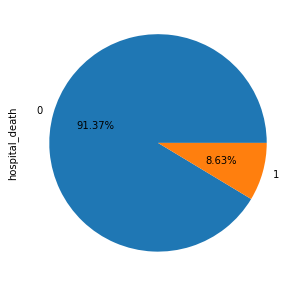

In [207]:
df['hospital_death'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<AxesSubplot:ylabel='cirrhosis'>

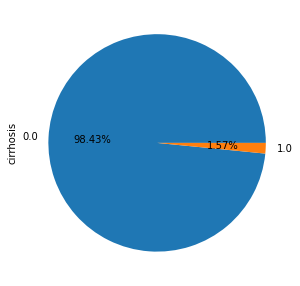

In [208]:
df['cirrhosis'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [47]:
df[categorical_columns].describe()

elective_surgery  ethnicity gender      icu_admit_source  \
count              91713      90318  91688                 91601   
unique                 2          6      2                     5   
top                    0  Caucasian      M  Accident & Emergency   
freq               74862      70684  49469                 54060   

       icu_stay_type      icu_type  apache_post_operative  arf_apache  \
count          91713         91713                  91713     90998.0   
unique             3             8                      2         2.0   
top            admit  Med-Surg ICU                      0         0.0   
freq           86183         50586                  73269     88452.0   

        gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
count           89812.0           89812.0            90676.0   
unique              4.0               6.0                2.0   
top                 4.0               6.0                0.0   
freq            62995.0           70960.0            89812.0   

        gcs_verbal_apache  intubated_apache  ventilated_apache     aids  \
count             89812.0           90998.0            90998.0  90998.0   
unique                5.0               2.0                2.0      2.0   
top                   5.0               0.0                0.0      0.0   
freq              56909.0           77237.0            61358.0  90920.0   

        cirrhosis  diabetes_mellitus  hepatic_failure  immunosuppression  \
count     90998.0            90998.0          90998.0            90998.0   
unique        2.0                2.0              2.0                2.0   
top           0.0                0.0              0.0                0.0   
freq      89570.0            70506.0          89816.0            88617.0   

        leukemia  lymphoma  solid_tumor_with_metastasis apache_3j_bodysystem  \
count    90998.0   90998.0                      90998.0                90051   
unique       2.0       2.0                          2.0                   11   
top          0.0       0.0                          0.0       Cardiovascular   
freq     90355.0   90622.0                      89120.0                29999   

       apache_2_bodysystem  hospital_death  
count                90051           91713  
unique                  10               2  
top         Cardiovascular               0  
freq                 38816           83798

#### We observe that our target variable - hospital_death is moderately unbalanced

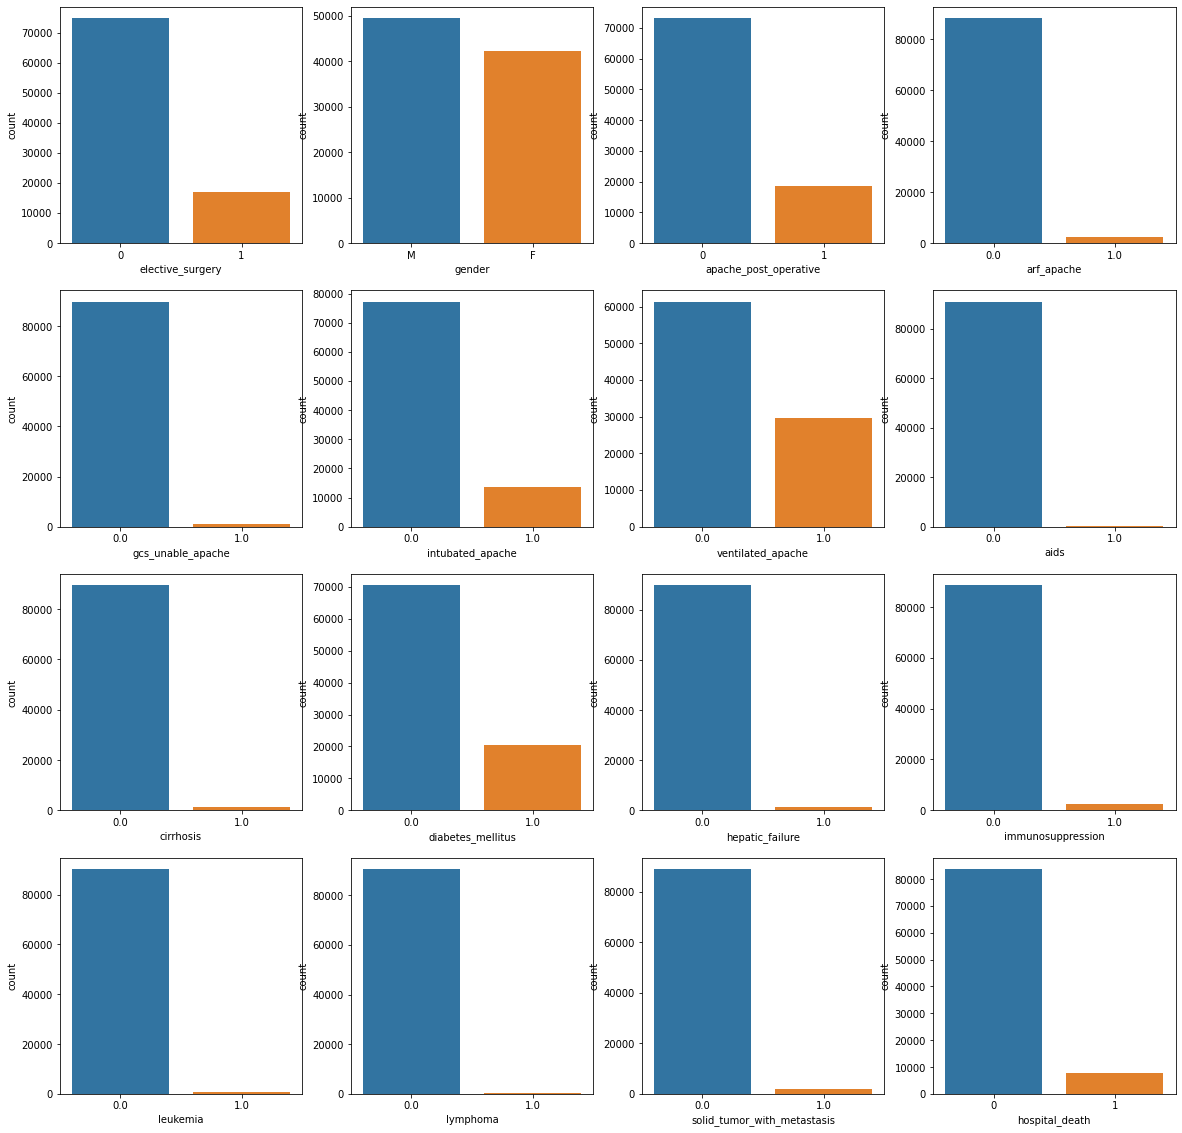

In [56]:
# some categorical variables have many categories, we will plot them separately
many_cat_cols = []

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
i=0
for col in categorical_columns:
    
    if df[col].value_counts().count()>2:
        many_cat_cols.append(col)
        continue
    
    # row_index and col_index to use for subplot
    r = i//4
    c = i%4
    i+=1
    sns.countplot(data=df, x=col, ax=ax[r][c])

In [35]:
# plot multi category columns separately
print(many_cat_cols)

['ethnicity', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'apache_3j_bodysystem', 'apache_2_bodysystem']


<AxesSubplot:xlabel='ethnicity', ylabel='count'>

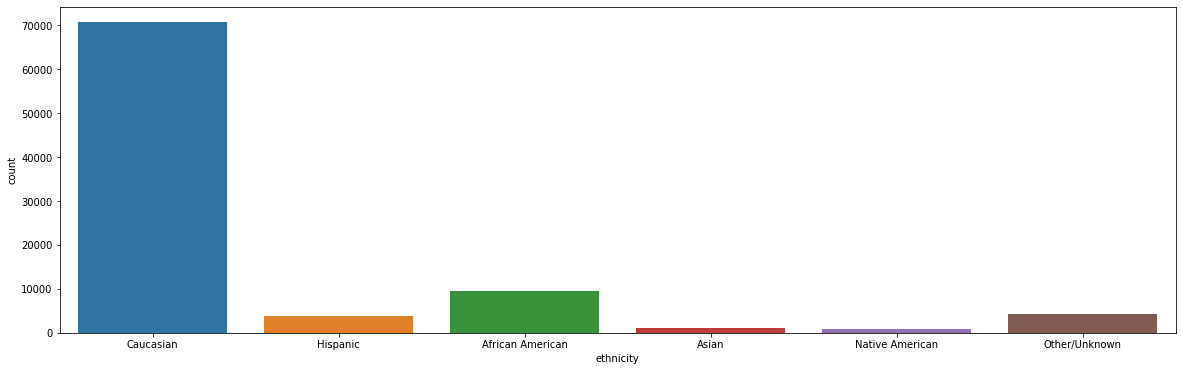

In [36]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='ethnicity')

<AxesSubplot:xlabel='icu_admit_source', ylabel='count'>

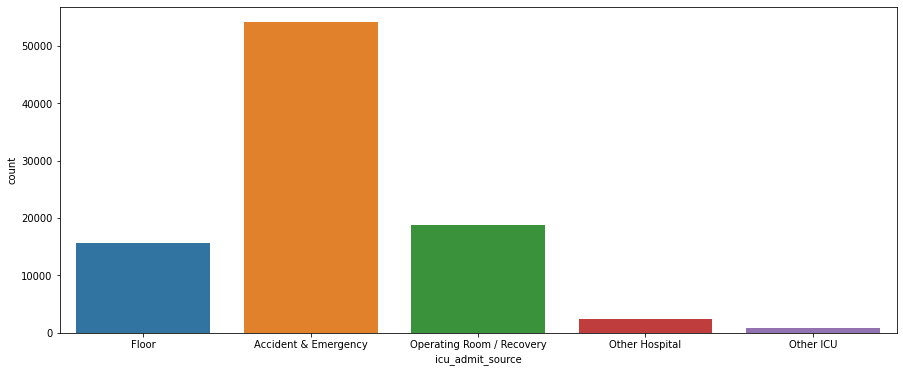

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='icu_admit_source')

<AxesSubplot:xlabel='icu_stay_type', ylabel='count'>

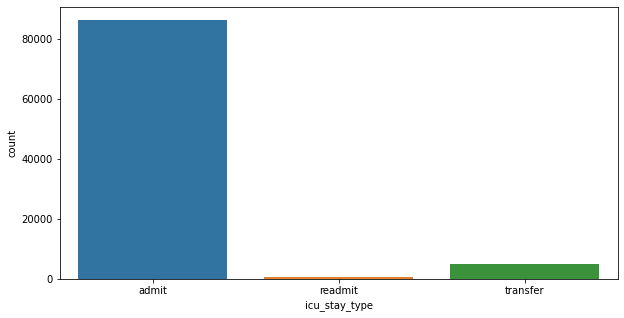

In [38]:
sns.countplot(data=df, x='icu_stay_type')

<AxesSubplot:xlabel='icu_type', ylabel='count'>

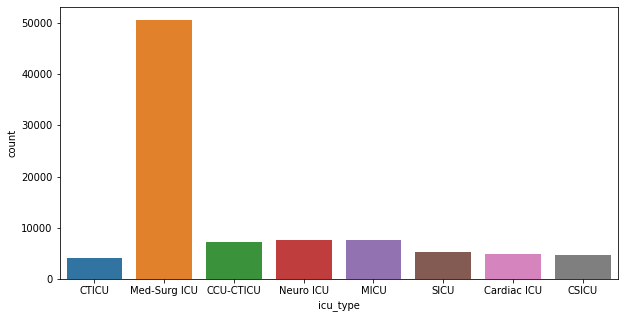

In [39]:
sns.countplot(data=df, x='icu_type')

<AxesSubplot:xlabel='gcs_eyes_apache', ylabel='count'>

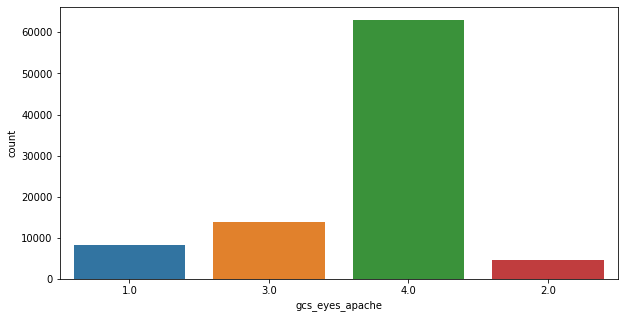

In [40]:
sns.countplot(data=df, x='gcs_eyes_apache')

<AxesSubplot:xlabel='gcs_motor_apache', ylabel='count'>

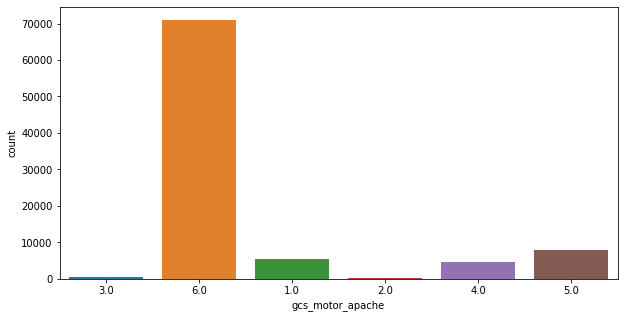

In [41]:
sns.countplot(data=df, x='gcs_motor_apache')

<AxesSubplot:xlabel='gcs_verbal_apache', ylabel='count'>

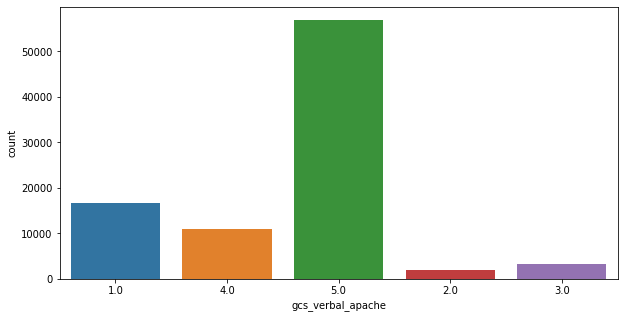

In [42]:
sns.countplot(data=df, x='gcs_verbal_apache')

<AxesSubplot:xlabel='apache_3j_bodysystem', ylabel='count'>

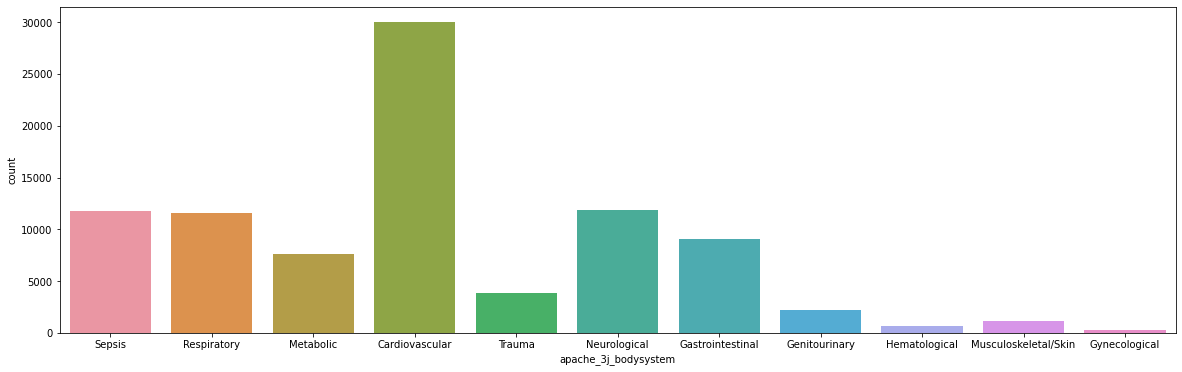

In [43]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='apache_3j_bodysystem')

<AxesSubplot:xlabel='apache_2_bodysystem', ylabel='count'>

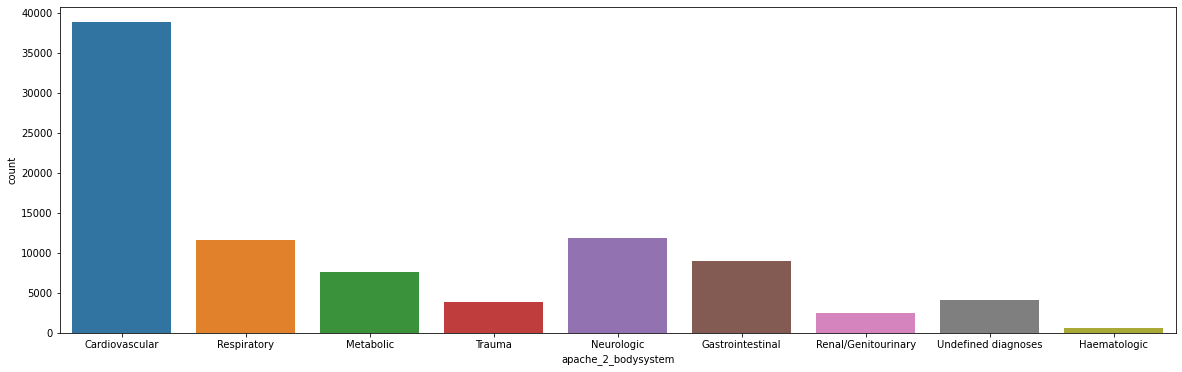

In [44]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='apache_2_bodysystem')

In [57]:
df[numerical_columns].describe()

age           bmi        height  pre_icu_los_days  \
count  87485.000000  88284.000000  90379.000000      91713.000000   
mean      62.309516     29.185818    169.641588          0.835766   
std       16.775119      8.275142     10.795378          2.487756   
min       16.000000     14.844926    137.200000        -24.947222   
25%       52.000000     23.641975    162.500000          0.035417   
50%       65.000000     27.654655    170.100000          0.138889   
75%       75.000000     32.930206    177.800000          0.409028   
max       89.000000     67.814990    195.590000        159.090972   

             weight  apache_2_diagnosis  apache_3j_diagnosis  \
count  88993.000000        90051.000000         90612.000000   
mean      84.028340          185.401739           558.216377   
std       25.011497           86.050882           463.266985   
min       38.600000          101.000000             0.010000   
25%       66.800000          113.000000           203.010000   
50%       80.300000          122.000000           409.020000   
75%       97.100000          301.000000           703.030000   
max      186.000000          308.000000          2201.050000   

       heart_rate_apache    map_apache  resprate_apache   temp_apache  \
count       90835.000000  90719.000000     90479.000000  87605.000000   
mean           99.707932     88.015873        25.811007     36.414472   
std            30.870502     42.032412        15.106312      0.833496   
min            30.000000     40.000000         4.000000     32.100000   
25%            86.000000     54.000000        11.000000     36.200000   
50%           104.000000     67.000000        28.000000     36.500000   
75%           120.000000    125.000000        36.000000     36.700000   
max           178.000000    200.000000        60.000000     39.700000   

       d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
count   91548.000000   91548.000000               90673.000000   
mean       88.491873      50.161314                  88.610513   
std        19.798379      13.317586                  19.793743   
min        46.000000      13.000000                  46.000000   
25%        75.000000      42.000000                  75.000000   
50%        86.000000      50.000000                  87.000000   
75%        99.000000      58.000000                  99.000000   
max       165.000000      90.000000                 165.000000   

       d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  \
count               90673.000000      91568.000000      91568.000000   
mean                   50.242597        103.000568         70.321848   
std                    13.341521         22.017346         17.115903   
min                    13.000000         58.000000          0.000000   
25%                    42.000000         87.000000         60.000000   
50%                    50.000000        101.000000         69.000000   
75%                    58.000000        116.000000         81.000000   
max                    90.000000        177.000000        175.000000   

         d1_mbp_max    d1_mbp_min  d1_mbp_noninvasive_max  \
count  91493.000000  91493.000000            90234.000000   
mean     104.651339     64.871859              104.590454   
std       20.808358     15.679680               20.701171   
min       60.000000     22.000000               60.000000   
25%       90.000000     55.000000               90.000000   
50%      102.000000     64.000000              102.000000   
75%      116.000000     75.000000              116.000000   
max      184.000000    112.000000              181.000000   

       d1_mbp_noninvasive_min  d1_resprate_max  d1_resprate_min   d1_spo2_max  \
count            90234.000000     91328.000000     91328.000000  91380.000000   
mean                64.941541        28.882774        12.846279     99.241836   
std                 15.701305        10.701973         5.064943      1.794181   
min                 22.000000        14.0

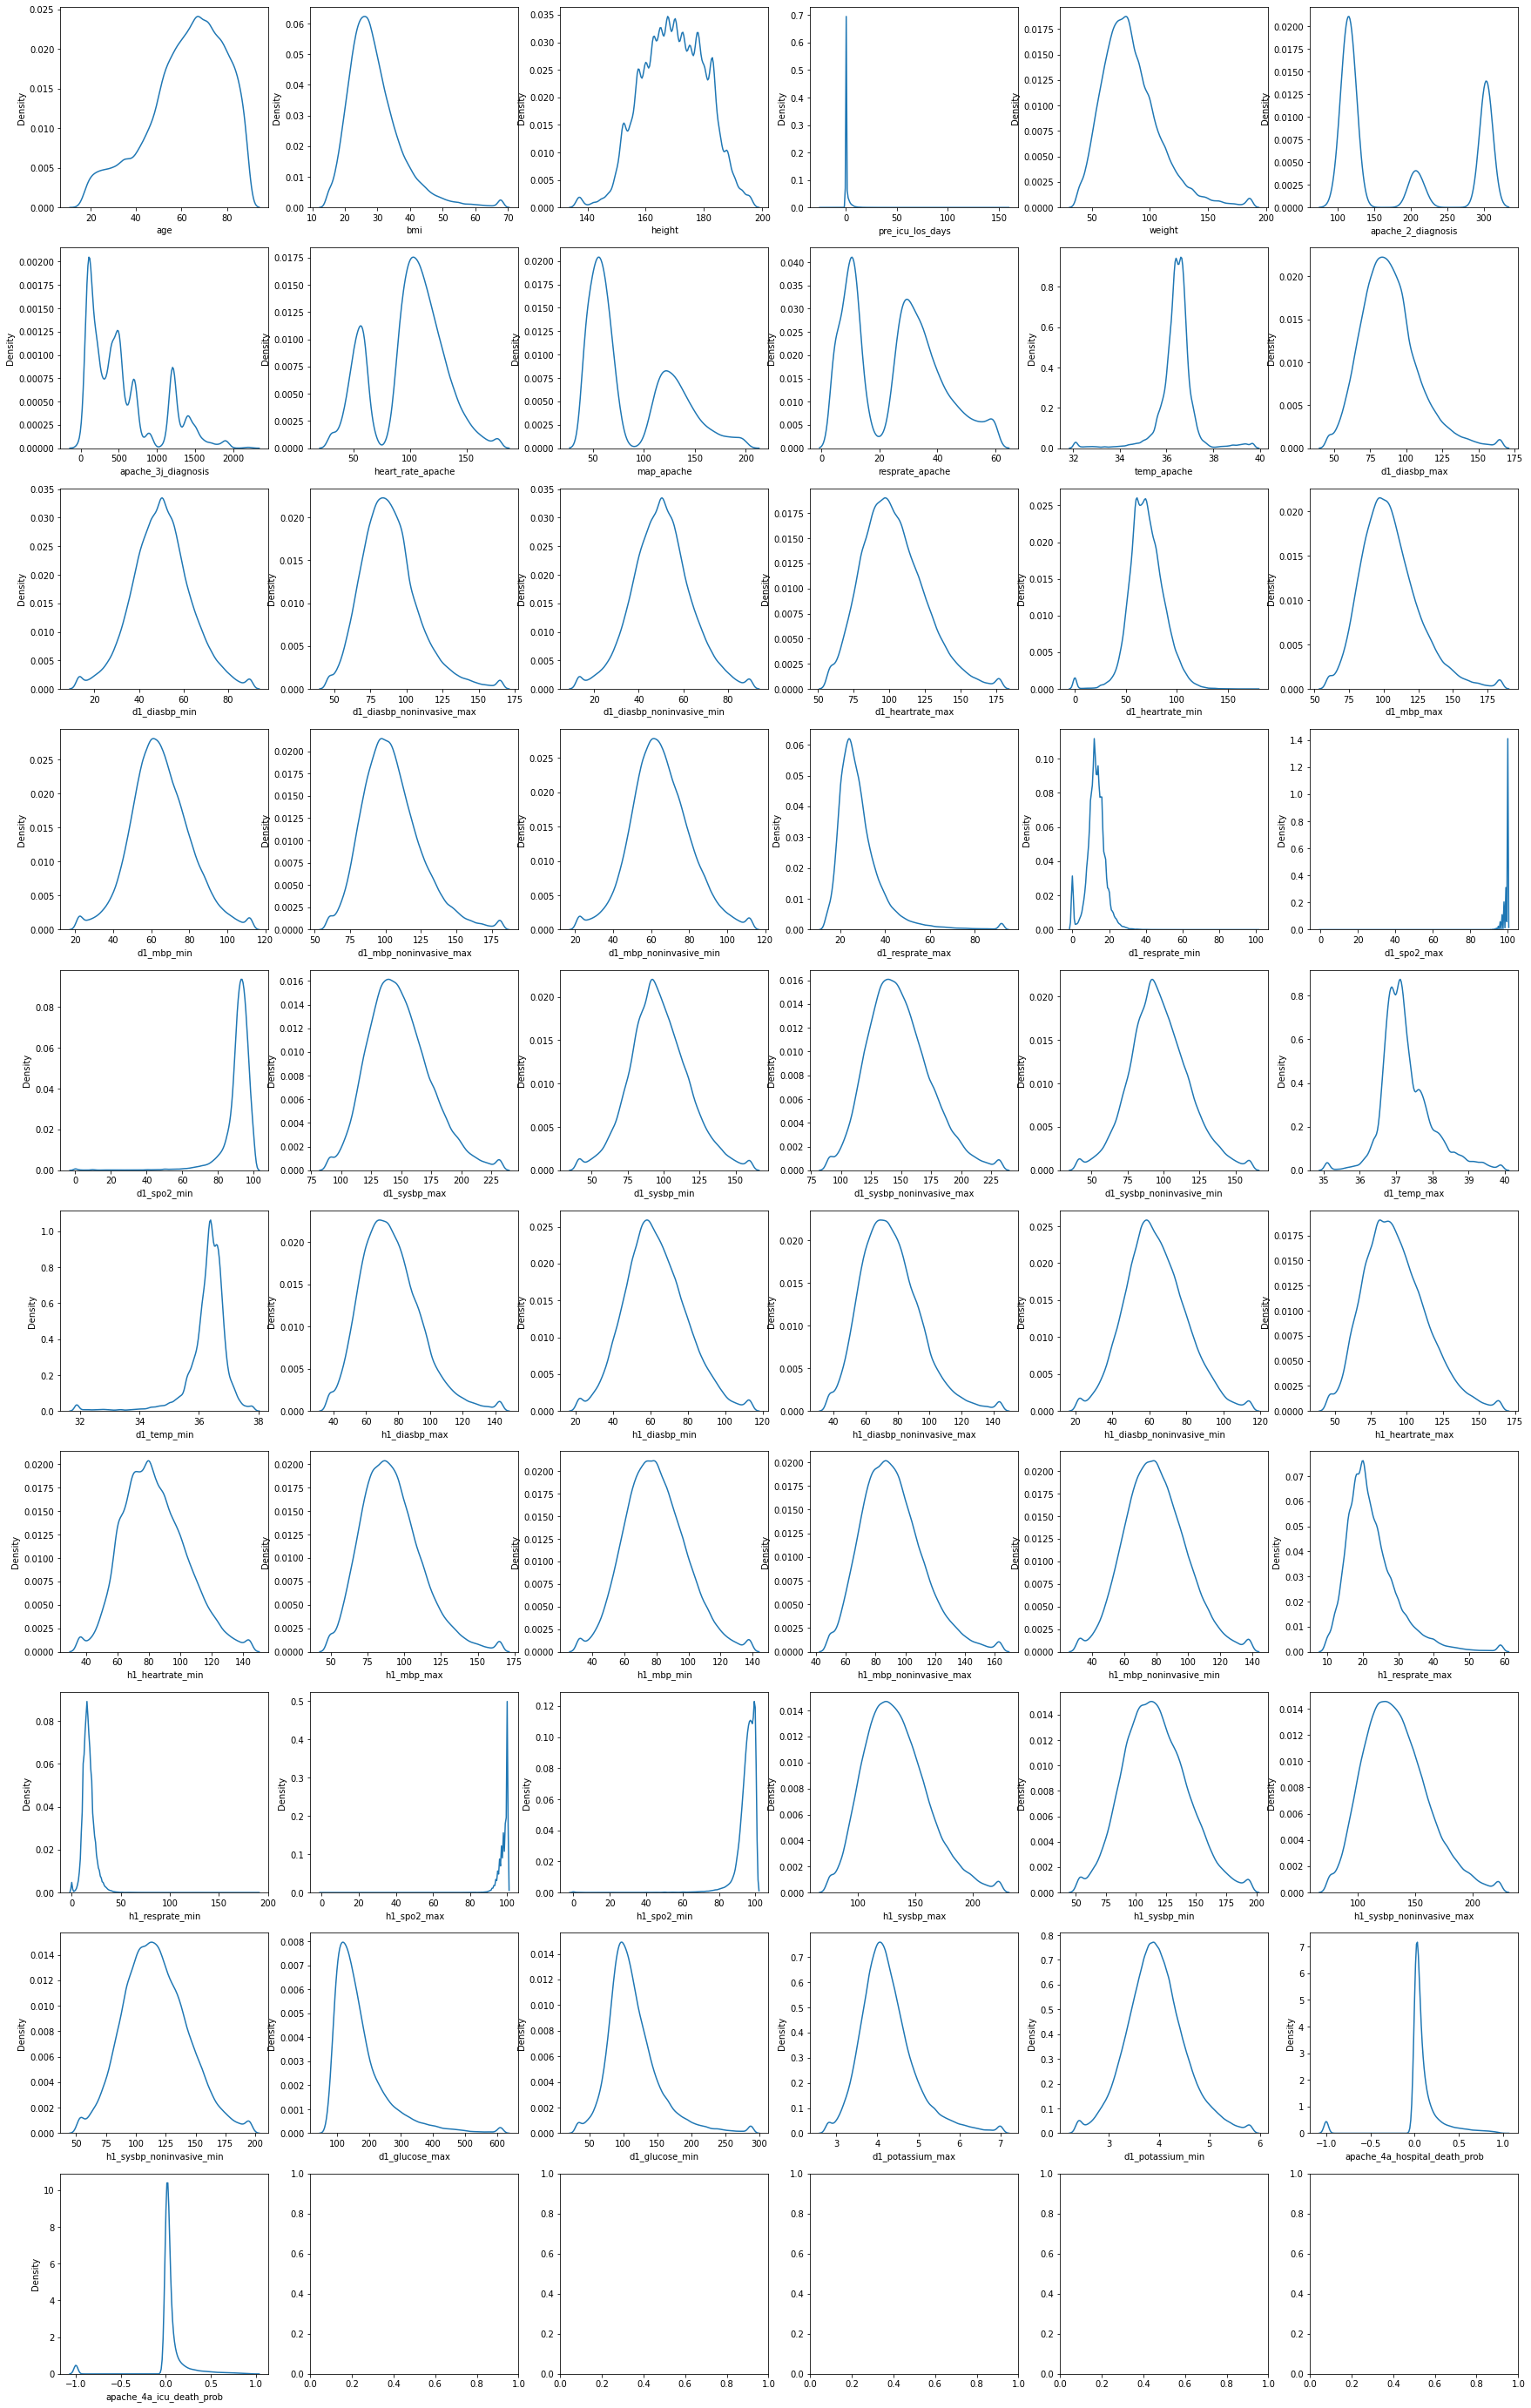

In [45]:
fig, ax = plt.subplots(nrows=10, ncols=6, figsize=(30,50))

i=0
for col in df_num.columns:   
    r = i//6
    c = i%6
    i+=1
    sns.kdeplot(data=df, x=col, ax=ax[r][c])

<AxesSubplot:xlabel='pre_icu_los_days', ylabel='Density'>

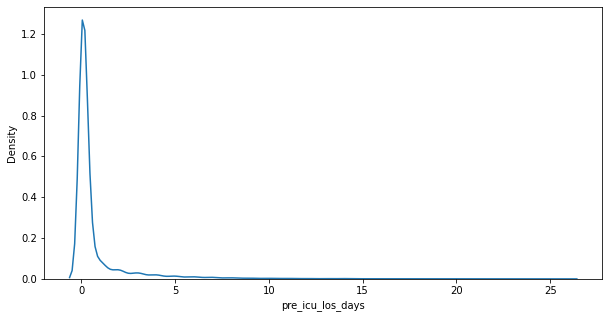

In [137]:
sns.kdeplot(df[(df['pre_icu_los_days']>=0)&(df['pre_icu_los_days']<26)]['pre_icu_los_days'])

## Bivariate Analysis <a class="anchor" id="third-bullet"></a>

In [29]:
def show_bivariate(df, col):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
    ax1 = sns.kdeplot(df.loc[df['hospital_death']==1, col], color='Red', shade=True, ax= ax[0])
    ax1 = sns.kdeplot(df.loc[df['hospital_death']==0, col], color='Green', shade=True, ax= ax[0])
    ax1.legend(['Death', 'Not Death'], loc='upper right')
    ax1.set_ylabel('Density')
    ax1.set_xlabel(col)
    ax1.set_title('Distribution of variable by death')
    sns.boxplot(x=df['hospital_death'], y=df[col], ax=ax[1])

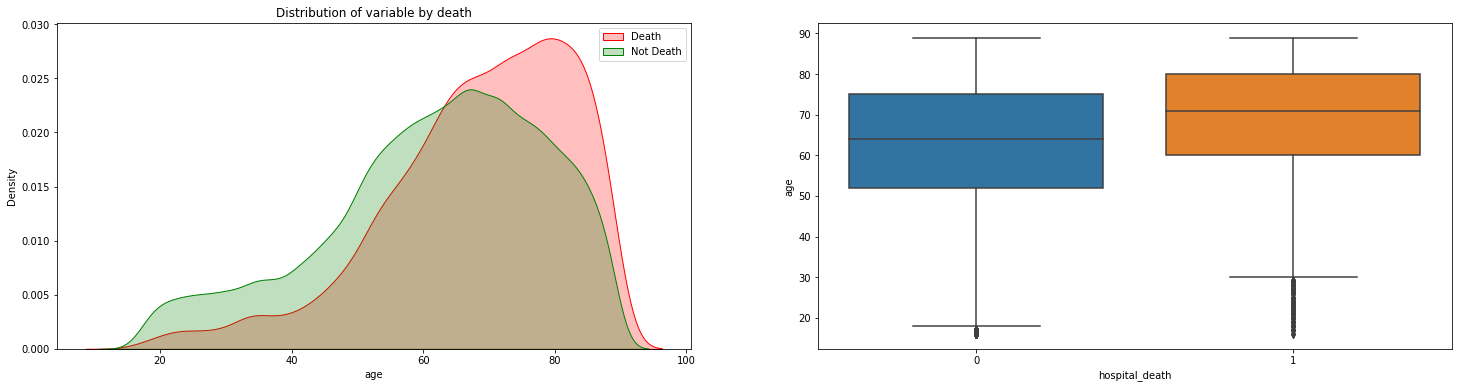

In [30]:
show_bivariate(df, 'age')

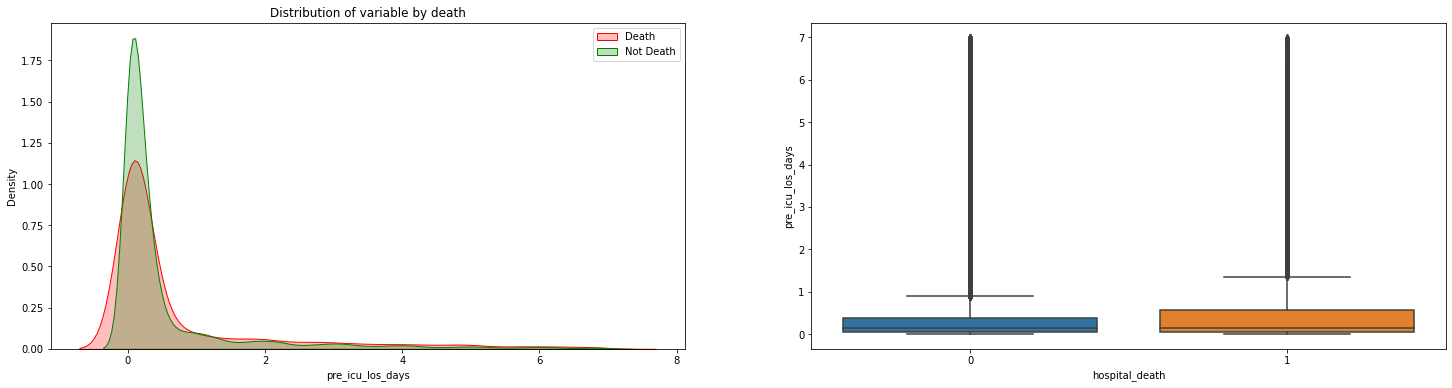

In [31]:
df_filt = df[(df['pre_icu_los_days']>0) & (df['pre_icu_los_days']<7)]
show_bivariate(df_filt, 'pre_icu_los_days')

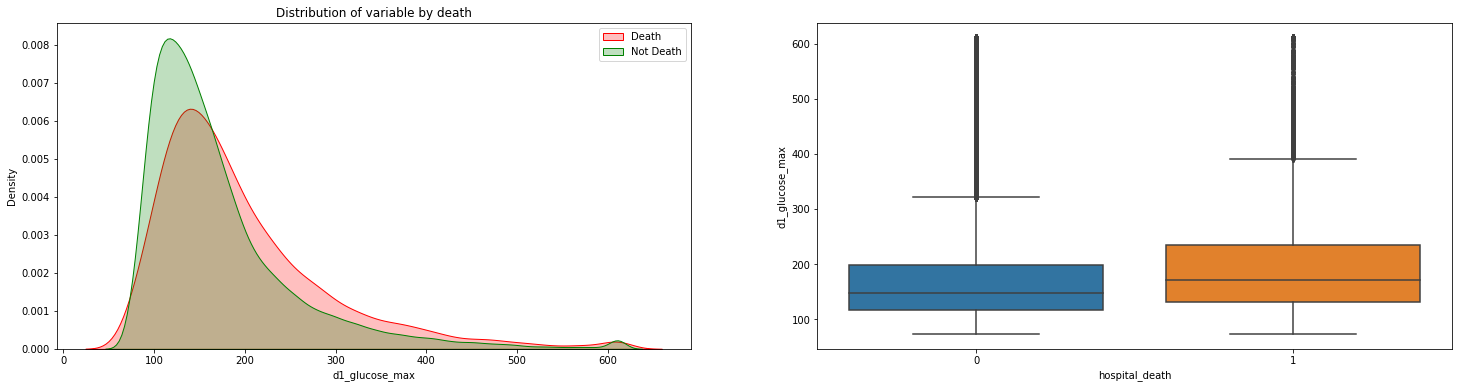

In [32]:
# df_filt = df[(df['pre_icu_los_days']>0) & (df['pre_icu_los_days']<7)]
show_bivariate(df, 'd1_glucose_max')

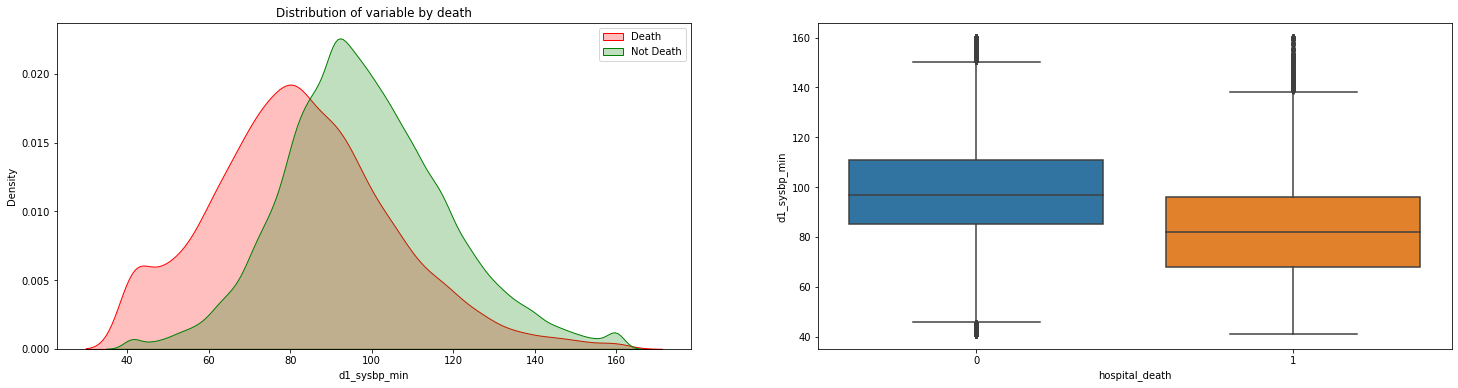

In [33]:
show_bivariate(df, 'd1_sysbp_min')

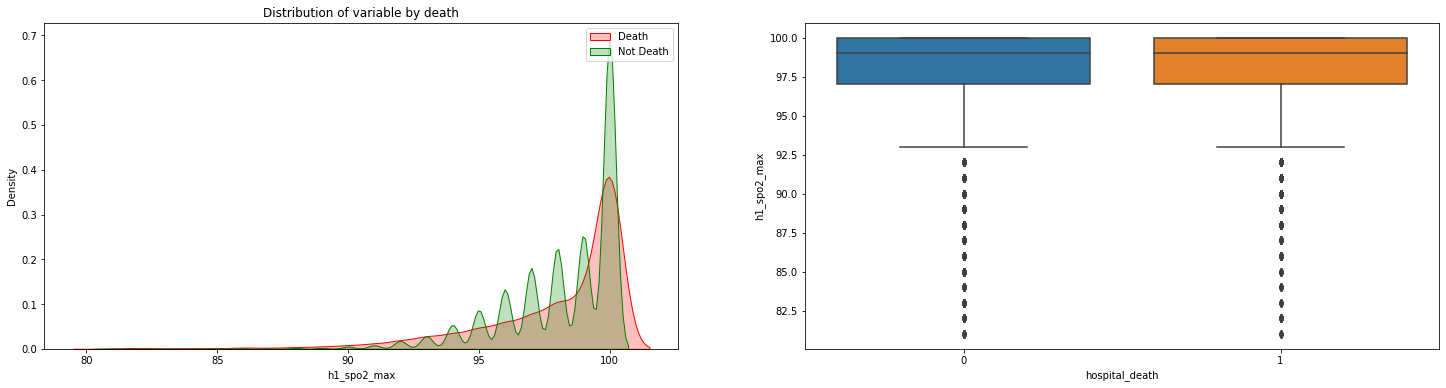

In [53]:
df_filt = df[(df['h1_spo2_max']>80) & (df['h1_spo2_max']<120)]
show_bivariate(df_filt, 'h1_spo2_max')

In [ ]:
df['h1_spo2_min

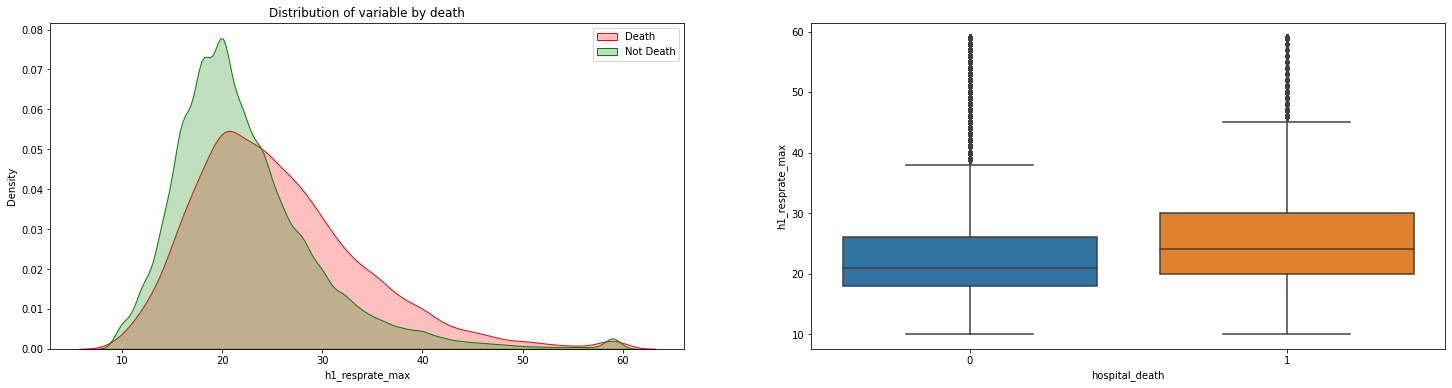

In [54]:
show_bivariate(df, 'h1_resprate_max')

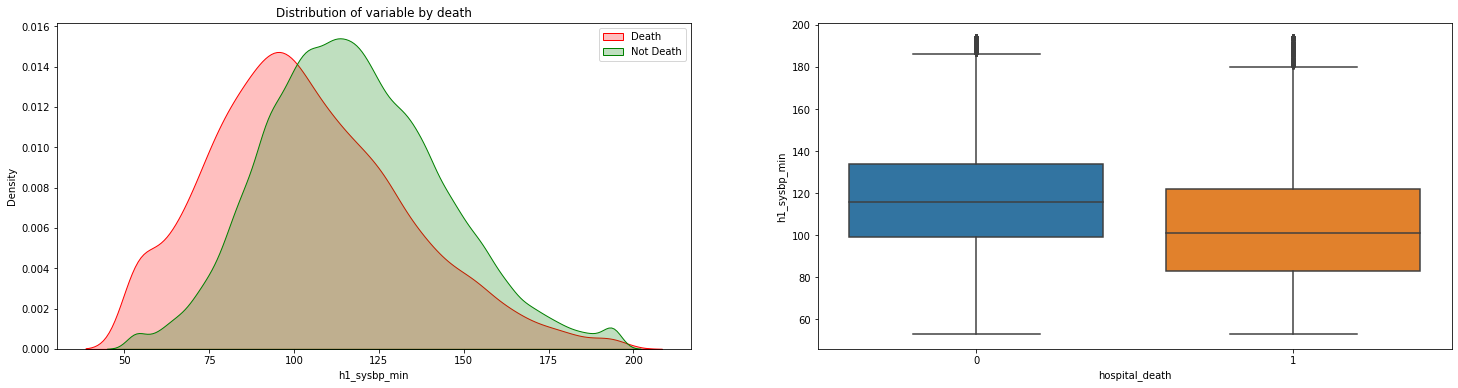

In [55]:
show_bivariate(df, 'h1_sysbp_min')

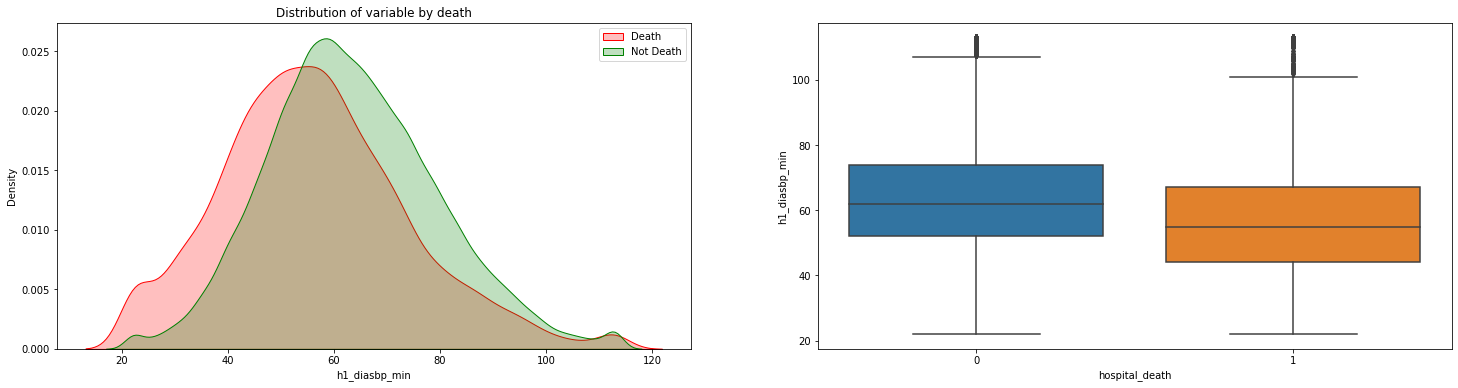

In [56]:
show_bivariate(df, 'h1_diasbp_min')

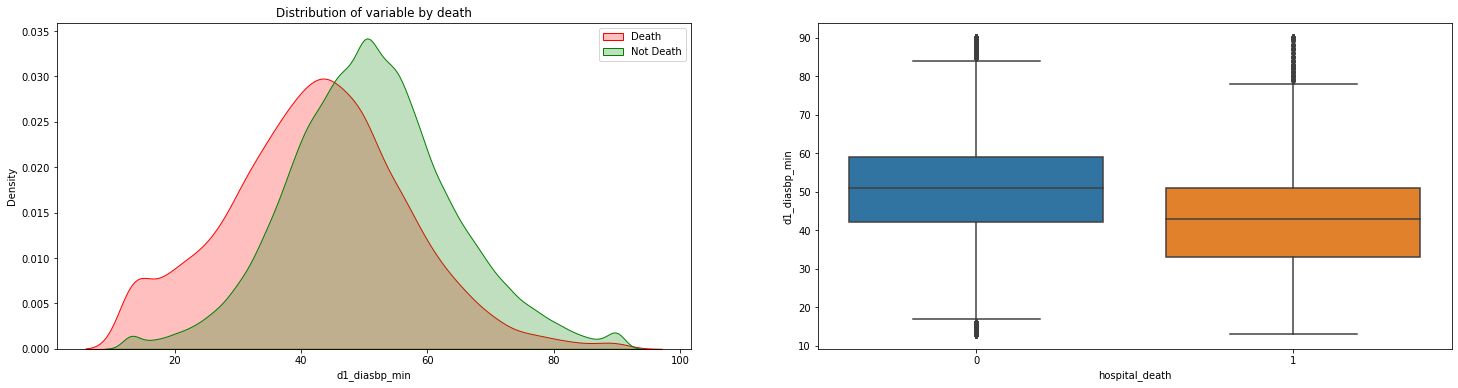

In [57]:
show_bivariate(df, 'd1_diasbp_min')

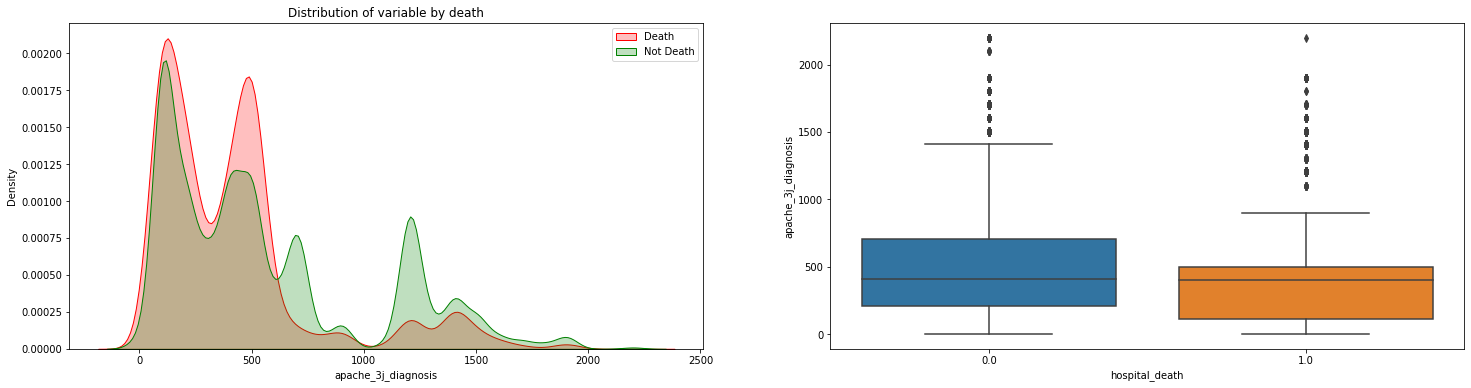

In [164]:
show_bivariate(df, 'apache_3j_diagnosis')

<AxesSubplot:xlabel='icu_type', ylabel='count'>

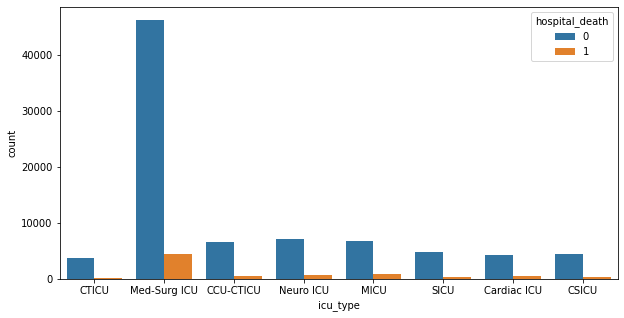

In [59]:
sns.countplot(data=df, x='icu_type', hue='hospital_death')

In [91]:
# analyze the apache death probabilities with target

In [86]:
threshold = 0.2
apache_death_prob = df['apache_4a_hospital_death_prob'].apply(lambda x: 1 if x >=threshold else 0)
apache_death_prob.value_counts(normalize=True)

0    0.845017
1    0.154983
Name: apache_4a_hospital_death_prob, dtype: float64

In [88]:
pd.crosstab(df['hospital_death'], apache_death_prob, normalize=True)*100

apache_4a_hospital_death_prob          0          1
hospital_death                                     
0                              80.977615  10.392202
1                               3.524037   5.106146

In [62]:
# We observe apache mortality prediction does not have a good performance in case of class 1 (death), when threshhold was 0.5, but performs better at 0.2

In [84]:
apache_death_prob_icu = df['apache_4a_icu_death_prob'].apply(lambda x: 1 if x >=0.2 else 0)
apache_death_prob_icu.value_counts(normalize=True)

0    0.912739
1    0.087261
Name: apache_4a_icu_death_prob, dtype: float64

In [90]:
pd.crosstab(df['hospital_death'], apache_death_prob_icu, normalize=True)*100

apache_4a_icu_death_prob          0         1
hospital_death                               
0                         86.480652  4.889165
1                          4.793214  3.836970

## Multi Variate Analysis <a class="anchor" id="fourth-bullet"></a>

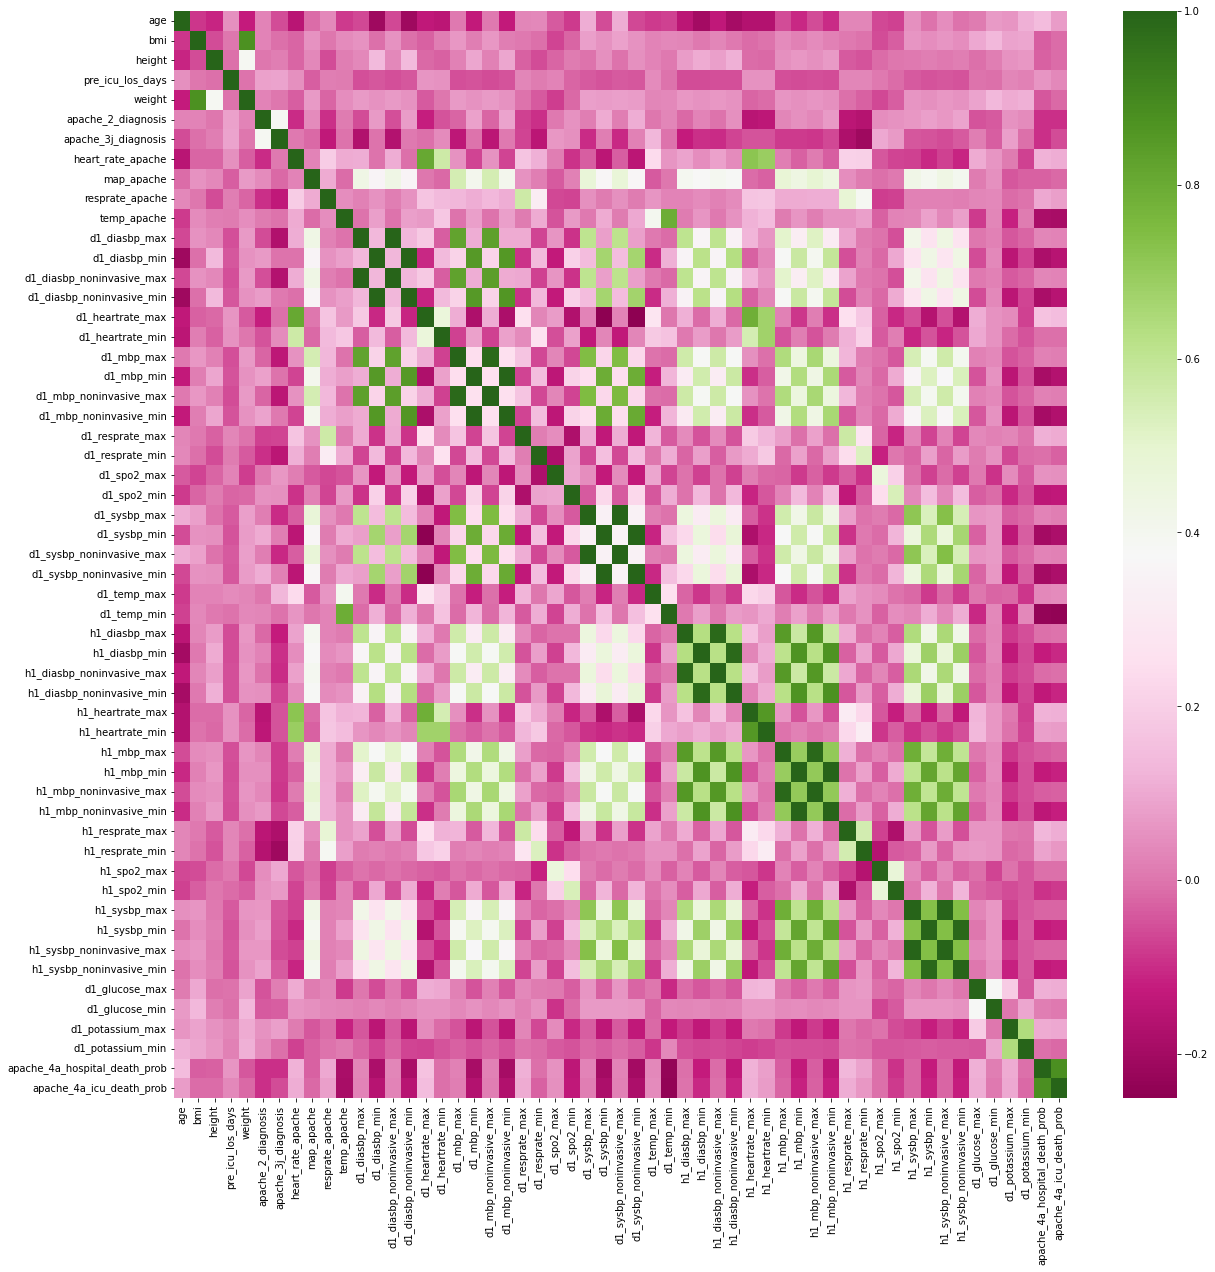

In [65]:
plt.figure(figsize=(20,20))
_=sns.heatmap(df[numerical_columns].corr(),cmap='PiYG')

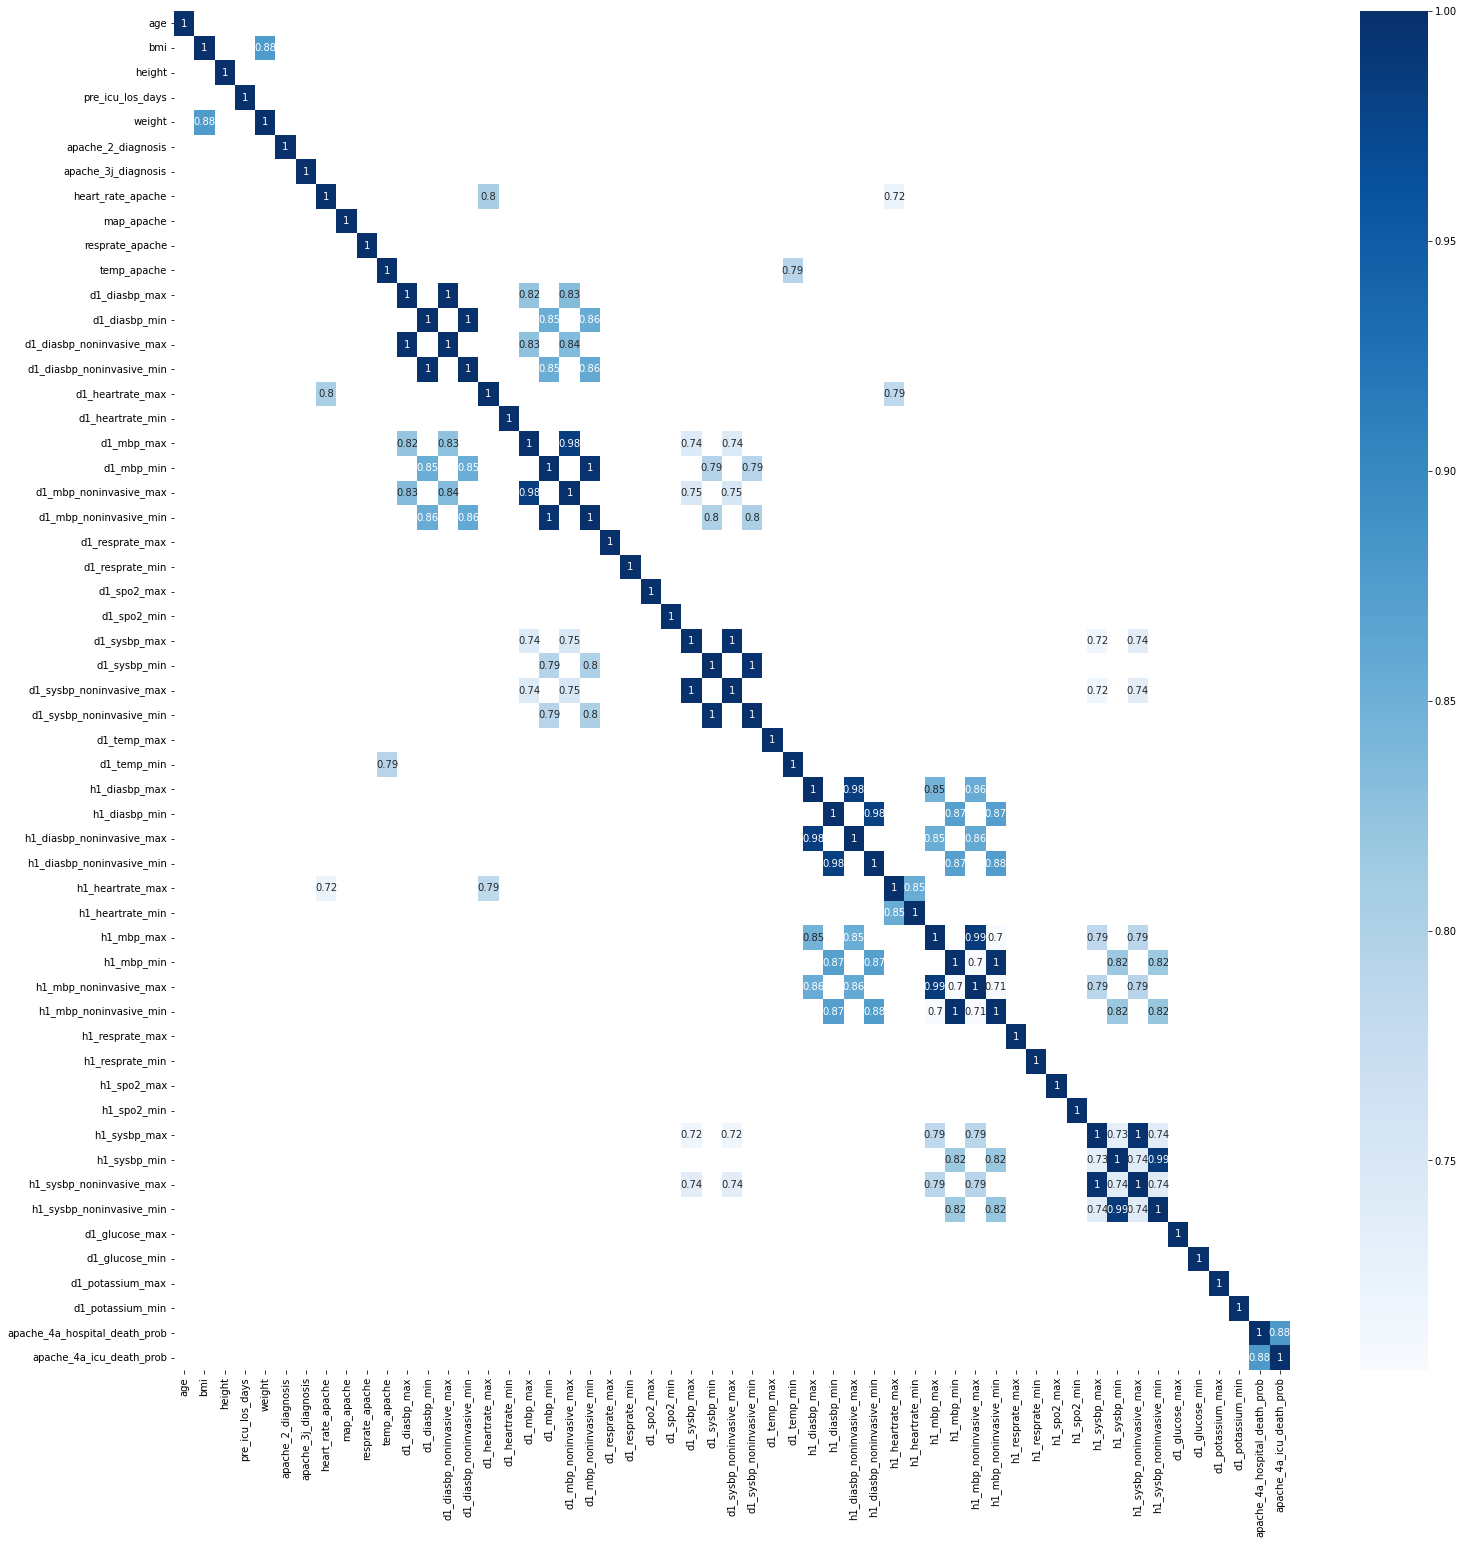

In [92]:
plt.figure(figsize=(25,25))
corr = df[numerical_columns].corr()
pearsonmap=sns.heatmap(corr[corr>=0.7],cmap='Blues',annot=True)

## Outliers <a class="anchor" id="sixth-bullet"></a>

In [775]:
df.describe(percentiles=[0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

age           bmi        height  pre_icu_los_days  \
count  87485.000000  88284.000000  90379.000000      91713.000000   
mean      62.309516     29.185818    169.641588          0.835766   
std       16.775119      8.275142     10.795378          2.487756   
min       16.000000     14.844926    137.200000        -24.947222   
0.1%      17.000000     14.844926    137.200000         -1.280011   
0.5%      19.000000     14.844926    137.200000         -0.114194   
1%        20.000000     15.937500    144.800000          0.000000   
5%        29.000000     18.855359    152.400000          0.000694   
10%       37.000000     20.541293    155.000000          0.003472   
25%       52.000000     23.641975    162.500000          0.035417   
50%       65.000000     27.654655    170.100000          0.138889   
75%       75.000000     32.930206    177.800000          0.409028   
90%       83.000000     39.424148    182.900000          2.231806   
95%       86.000000     44.516538    187.900000          4.387778   
99%       89.000000     59.419030    193.000000         10.860278   
99.5%     89.000000     67.247209    195.500000         14.362028   
99.9%     89.000000     67.814990    195.590000         26.882050   
max       89.000000     67.814990    195.590000        159.090972   

             weight  apache_2_diagnosis  apache_3j_diagnosis  \
count  88993.000000        90051.000000         90612.000000   
mean      84.028340          185.401739           558.216377   
std       25.011497           86.050882           463.266985   
min       38.600000          101.000000             0.010000   
0.1%      38.600000          101.000000             0.220000   
0.5%      38.600000          102.000000             0.250000   
1%        41.000000          102.000000           102.010000   
5%        50.300000          106.000000           104.010000   
10%       56.000000          110.000000           106.010000   
25%       66.800000          113.000000           203.010000   
50%       80.300000          122.000000           409.020000   
75%       97.100000          301.000000           703.030000   
90%      115.700000          304.000000          1302.020000   
95%      130.000000          307.000000          1501.010000   
99%      169.000000          308.000000          1902.010000   
99.5%    186.000000          308.000000          1903.019450   
99.9%    186.000000          308.000000          2201.010000   
max      186.000000          308.000000          2201.050000   

       heart_rate_apache    map_apache  resprate_apache   temp_apache  \
count       90835.000000  90719.000000     90479.000000  87605.000000   
mean           99.707932     88.015873        25.811007     36.414472   
std            30.870502     42.032412        15.106312      0.833496   
min            30.000000     40.000000         4.000000     32.100000   
0.1%           30.000000     40.000000         4.000000     32.100000   
0.5%           30.000000     40.000000         4.000000     32.100000   
1%             34.000000     40.000000         4.000000     32.800000   
5%             47.000000     42.000000         5.000000     35.300000   
10%            53.000000     46.000000         7.000000     35.700000   
25%            86.000000     54.000000        11.000000     36.200000   
50%           104.000000     67.000000        28.000000     36.500000   
75%           120.000000    125.000000        36.000000     36.700000   
90%           136.000000    148.000000        46.000000     37.000000   
95%           146.000000    164.000000        53.000000     37.300000   
99%           168.000000    193.000000        60.000000     39.300000   
99.5%         178.000000    197.000000        60.000000     39.600000   
99.9%         178.000000    200.000000        60.000000     39.700000   
max           178.000000    200.000000        60.000000     39.700000   

       d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
count   91548.000000   91548.0000

<AxesSubplot:>

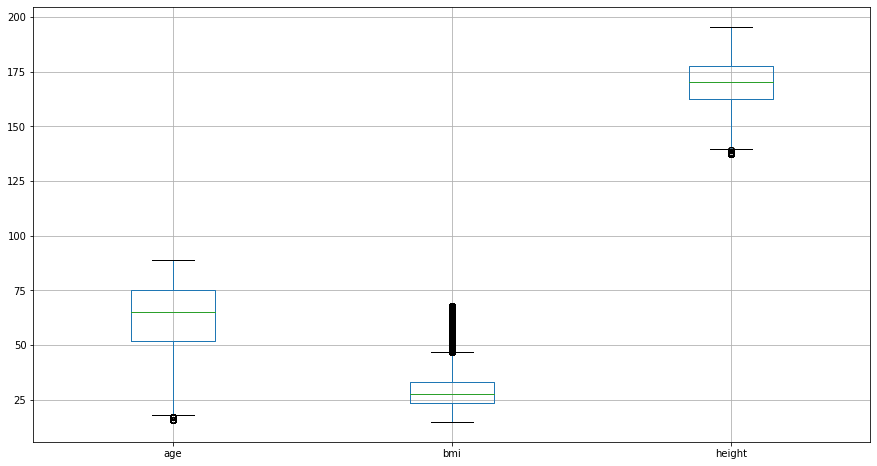

In [776]:
plt.figure(figsize=(15,8))
df_num.loc[:,['age', 'bmi', 'height']].boxplot()

<AxesSubplot:>

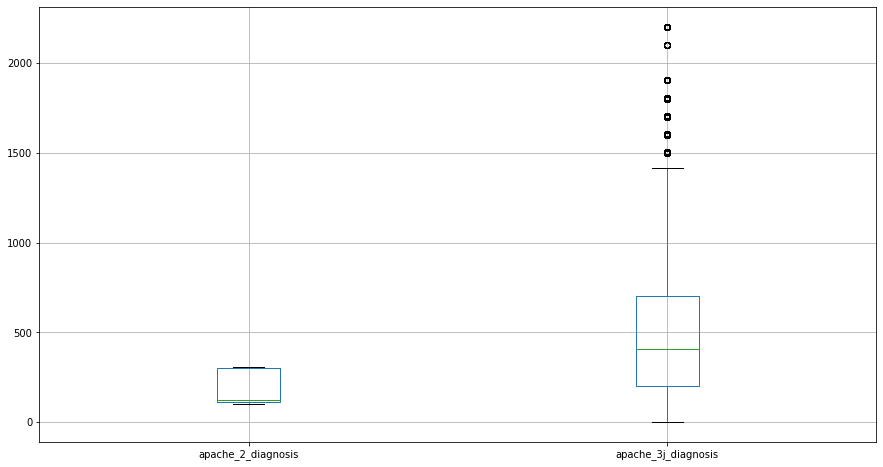

In [55]:
plt.figure(figsize=(15,8))
df_num.loc[:,['apache_2_diagnosis','apache_3j_diagnosis']].boxplot()

<AxesSubplot:>

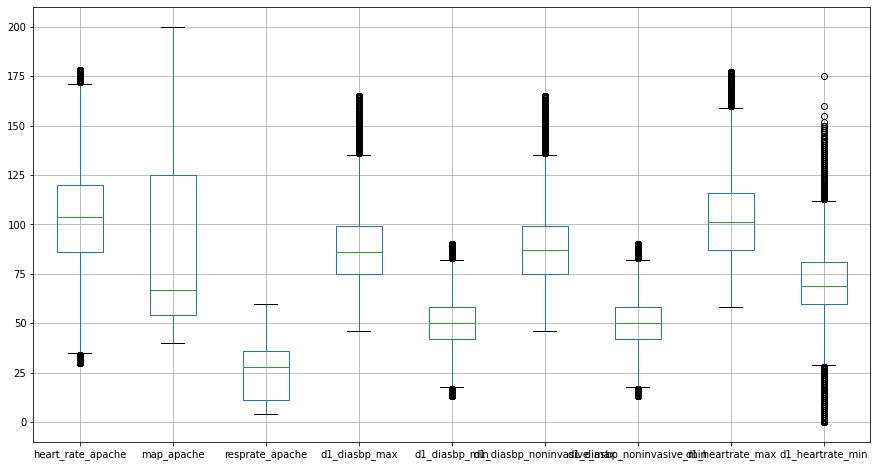

In [56]:
plt.figure(figsize=(15,8))
df_num.loc[:,['heart_rate_apache','map_apache','resprate_apache','d1_diasbp_max','d1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max','d1_heartrate_min']].boxplot()

<AxesSubplot:>

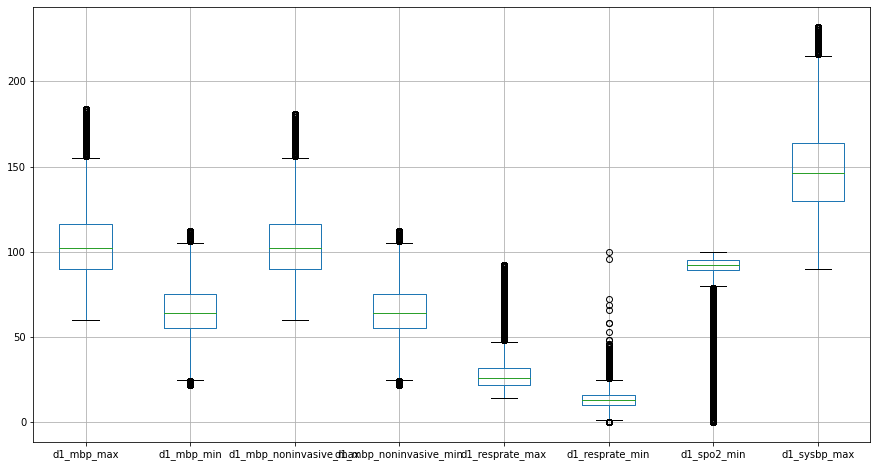

In [57]:
plt.figure(figsize=(15,8))
df_num.loc[:,['d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max','d1_resprate_min','d1_spo2_min','d1_sysbp_max']].boxplot()

<AxesSubplot:>

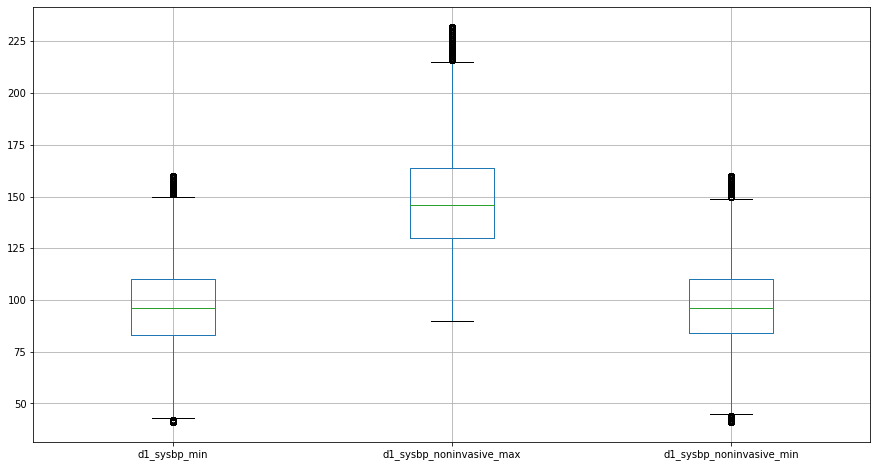

In [58]:
plt.figure(figsize=(15,8))
df_num.loc[:,['d1_sysbp_min','d1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min']].boxplot()

<AxesSubplot:>

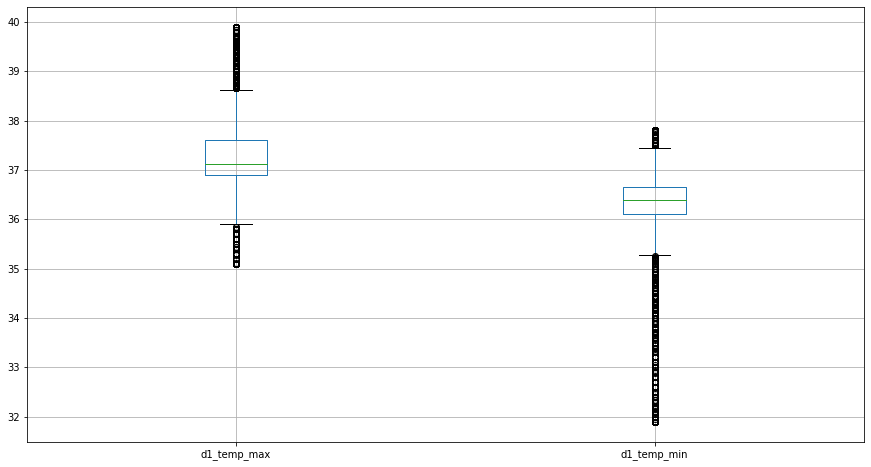

In [59]:
plt.figure(figsize=(15,8))
df_num.loc[:,['d1_temp_max','d1_temp_min']].boxplot()

<AxesSubplot:>

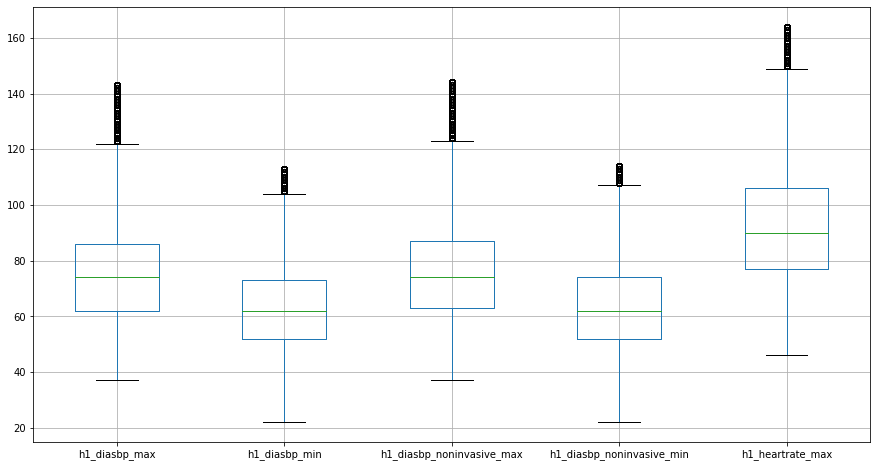

In [60]:
plt.figure(figsize=(15,8))
df_num.loc[:,['h1_diasbp_max','h1_diasbp_min','h1_diasbp_noninvasive_max',
              'h1_diasbp_noninvasive_min','h1_heartrate_max']].boxplot()

<AxesSubplot:>

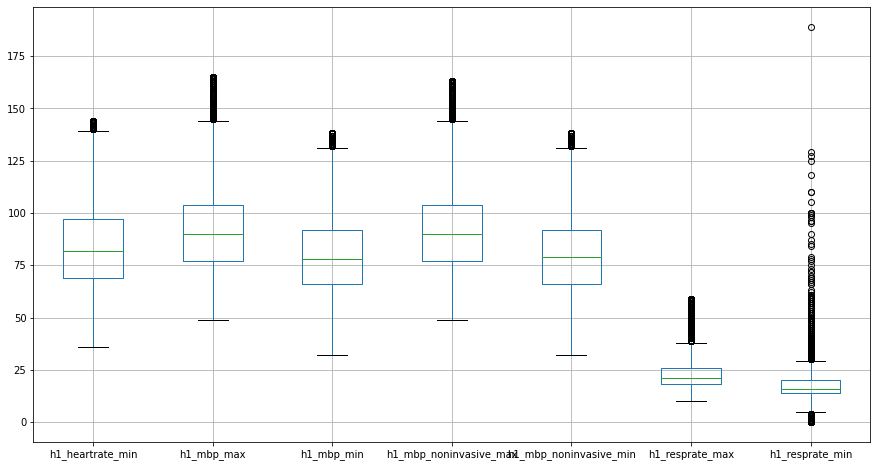

In [61]:
plt.figure(figsize=(15,8))
df_num.loc[:,['h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min']].boxplot()

<AxesSubplot:>

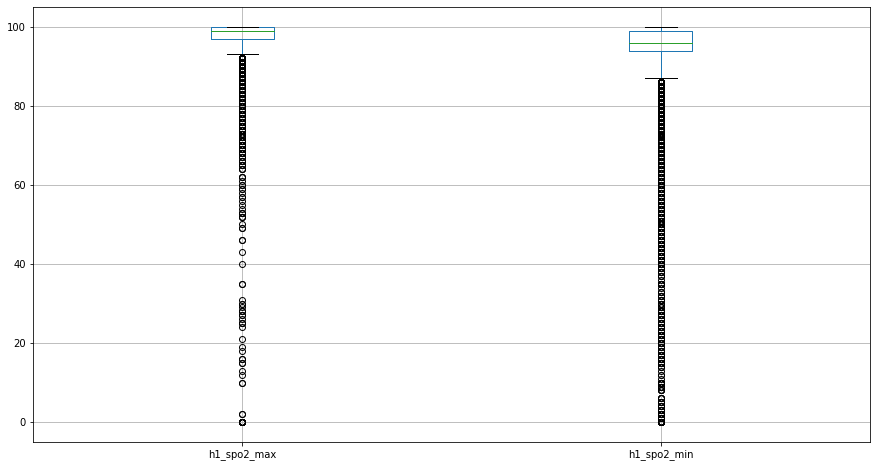

In [62]:
plt.figure(figsize=(15,8))
df_num.loc[:,['h1_spo2_max', 'h1_spo2_min']].boxplot()

<AxesSubplot:>

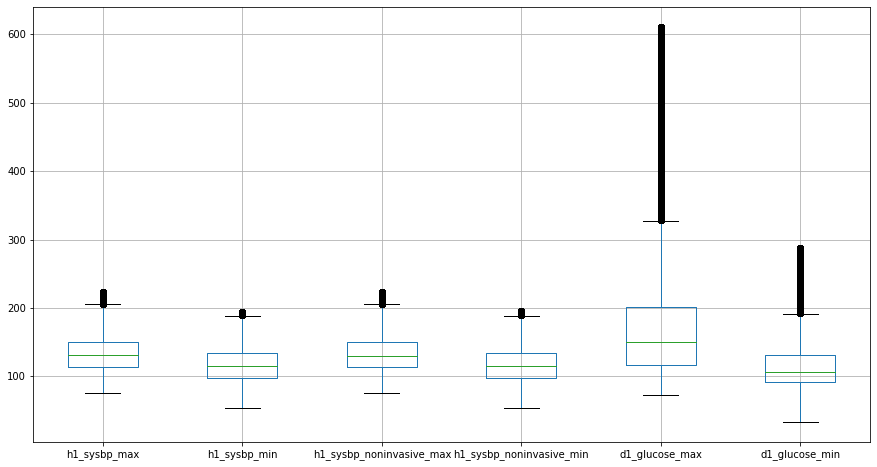

In [63]:
plt.figure(figsize=(15,8))
df_num.loc[:,['h1_sysbp_max','h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
       'd1_glucose_max', 'd1_glucose_min']].boxplot()

<AxesSubplot:>

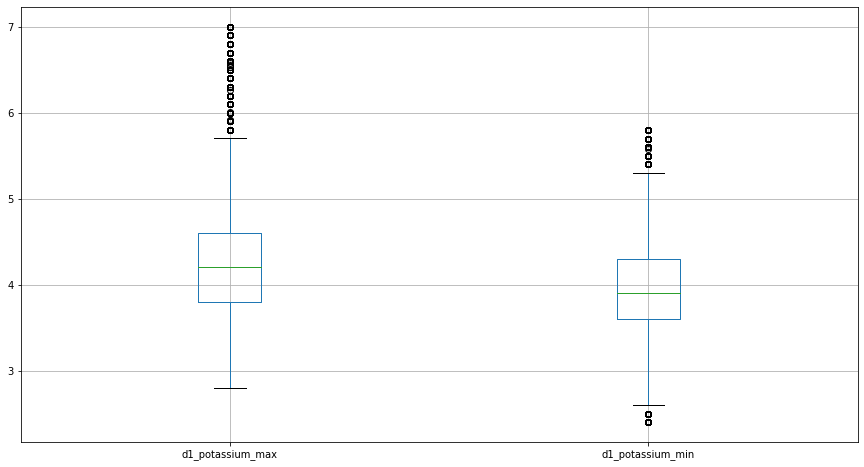

In [64]:
plt.figure(figsize=(15,8))
df_num.loc[:,['d1_potassium_max','d1_potassium_min']].boxplot()

<AxesSubplot:>

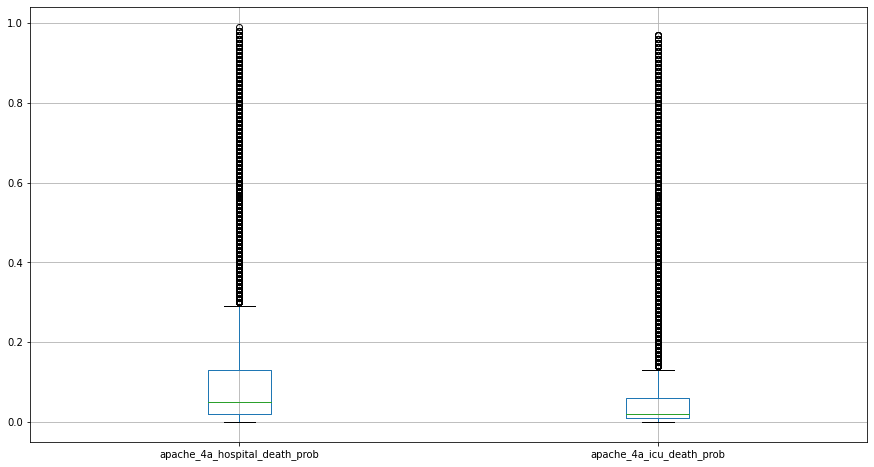

In [65]:
plt.figure(figsize=(15,8))
df_num.loc[:,['apache_4a_hospital_death_prob','apache_4a_icu_death_prob']].boxplot()

In [1006]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

In [1007]:
df_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df[numerical_columns]), columns=numerical_columns)

In [1008]:
df_normalized.std().sort_values()

pre_icu_los_days                 0.013518
d1_spo2_max                      0.017942
h1_spo2_max                      0.032129
h1_resprate_min                  0.032130
d1_resprate_min                  0.050649
h1_spo2_min                      0.066252
d1_heartrate_min                 0.097805
d1_spo2_min                      0.100301
temp_apache                      0.109671
apache_4a_icu_death_prob         0.110326
apache_4a_hospital_death_prob    0.124406
d1_temp_min                      0.126061
d1_resprate_max                  0.137205
d1_temp_max                      0.144435
d1_glucose_min                   0.150090
h1_resprate_max                  0.153368
bmi                              0.156223
d1_potassium_max                 0.158894
d1_glucose_max                   0.161130
d1_diasbp_noninvasive_max        0.166334
d1_diasbp_max                    0.166373
d1_mbp_max                       0.167809
weight                           0.169685
d1_potassium_min                 0

In [1009]:
# pre_icu_los_days, spo2_max, resperate_min, spo2_min have very low variance, possibly due to outliers

In [1010]:
df.loc[np.abs(df['pre_icu_los_days'])>26, 'hospital_death'].value_counts(normalize=True)

0    0.757009
1    0.242991
Name: hospital_death, dtype: float64

In [1011]:
# high value of pre_icu_los_days, leads to more deaths > 20% (compared to 8% overall )

In [1012]:
df_original = df.copy()

In [1013]:
(df['pre_icu_los_days']<0).sum()

778

In [1014]:
(df['apache_4a_hospital_death_prob']<0).sum()

2371

In [1015]:
(df['apache_4a_icu_death_prob']<0).sum()

2230

In [1016]:
# As probabilities acnnot be negative, we can remove the -ve value data points

In [1017]:
# mark Invalid values as null
# df['pre_icu_los_days'] = np.abs(df['pre_icu_los_days'])     # maybe they marked as -ve because 
df.loc[df['pre_icu_los_days']<0, 'pre_icu_los_days'] = np.nan
df.loc[df['apache_4a_hospital_death_prob']<0, 'apache_4a_hospital_death_prob'] = np.nan
df.loc[df['apache_4a_icu_death_prob']<0, 'apache_4a_icu_death_prob'] = np.nan

In [1020]:
def treat_outliers_capping(df):
    x = df['pre_icu_los_days'].copy()
    x.loc[x >  10] = 10
    df['pre_icu_los_days']=x
    
    x1 = df['d1_resprate_min'].copy()
    x1.loc[x1 >  47.734600] = 47.734600
    df['d1_resprate_min']=x1
    
    x2  = df['d1_spo2_max'].copy()
    x2.loc[x2<87] = 87
    df['d1_spo2_max']=x2
    
    x3 = df['d1_spo2_min'].copy()
    x3[x3<43]=43
    df['d1_spo2_min'] = x3
    
    x4 = df['h1_resprate_min'].copy()
    x4.loc[x4>50] = 50
    df['h1_resprate_min']=x4
    
    x5 = df['h1_spo2_max'].copy()
    x5.loc[x5<60] = 60
    df['h1_spo2_max'] = x5
    
    x6 = df['h1_spo2_min'].copy()
    x6.loc[x6<60] = 60
    df['h1_spo2_min'] = x6
    
    return df

In [1021]:
df = treat_outliers_capping(df)

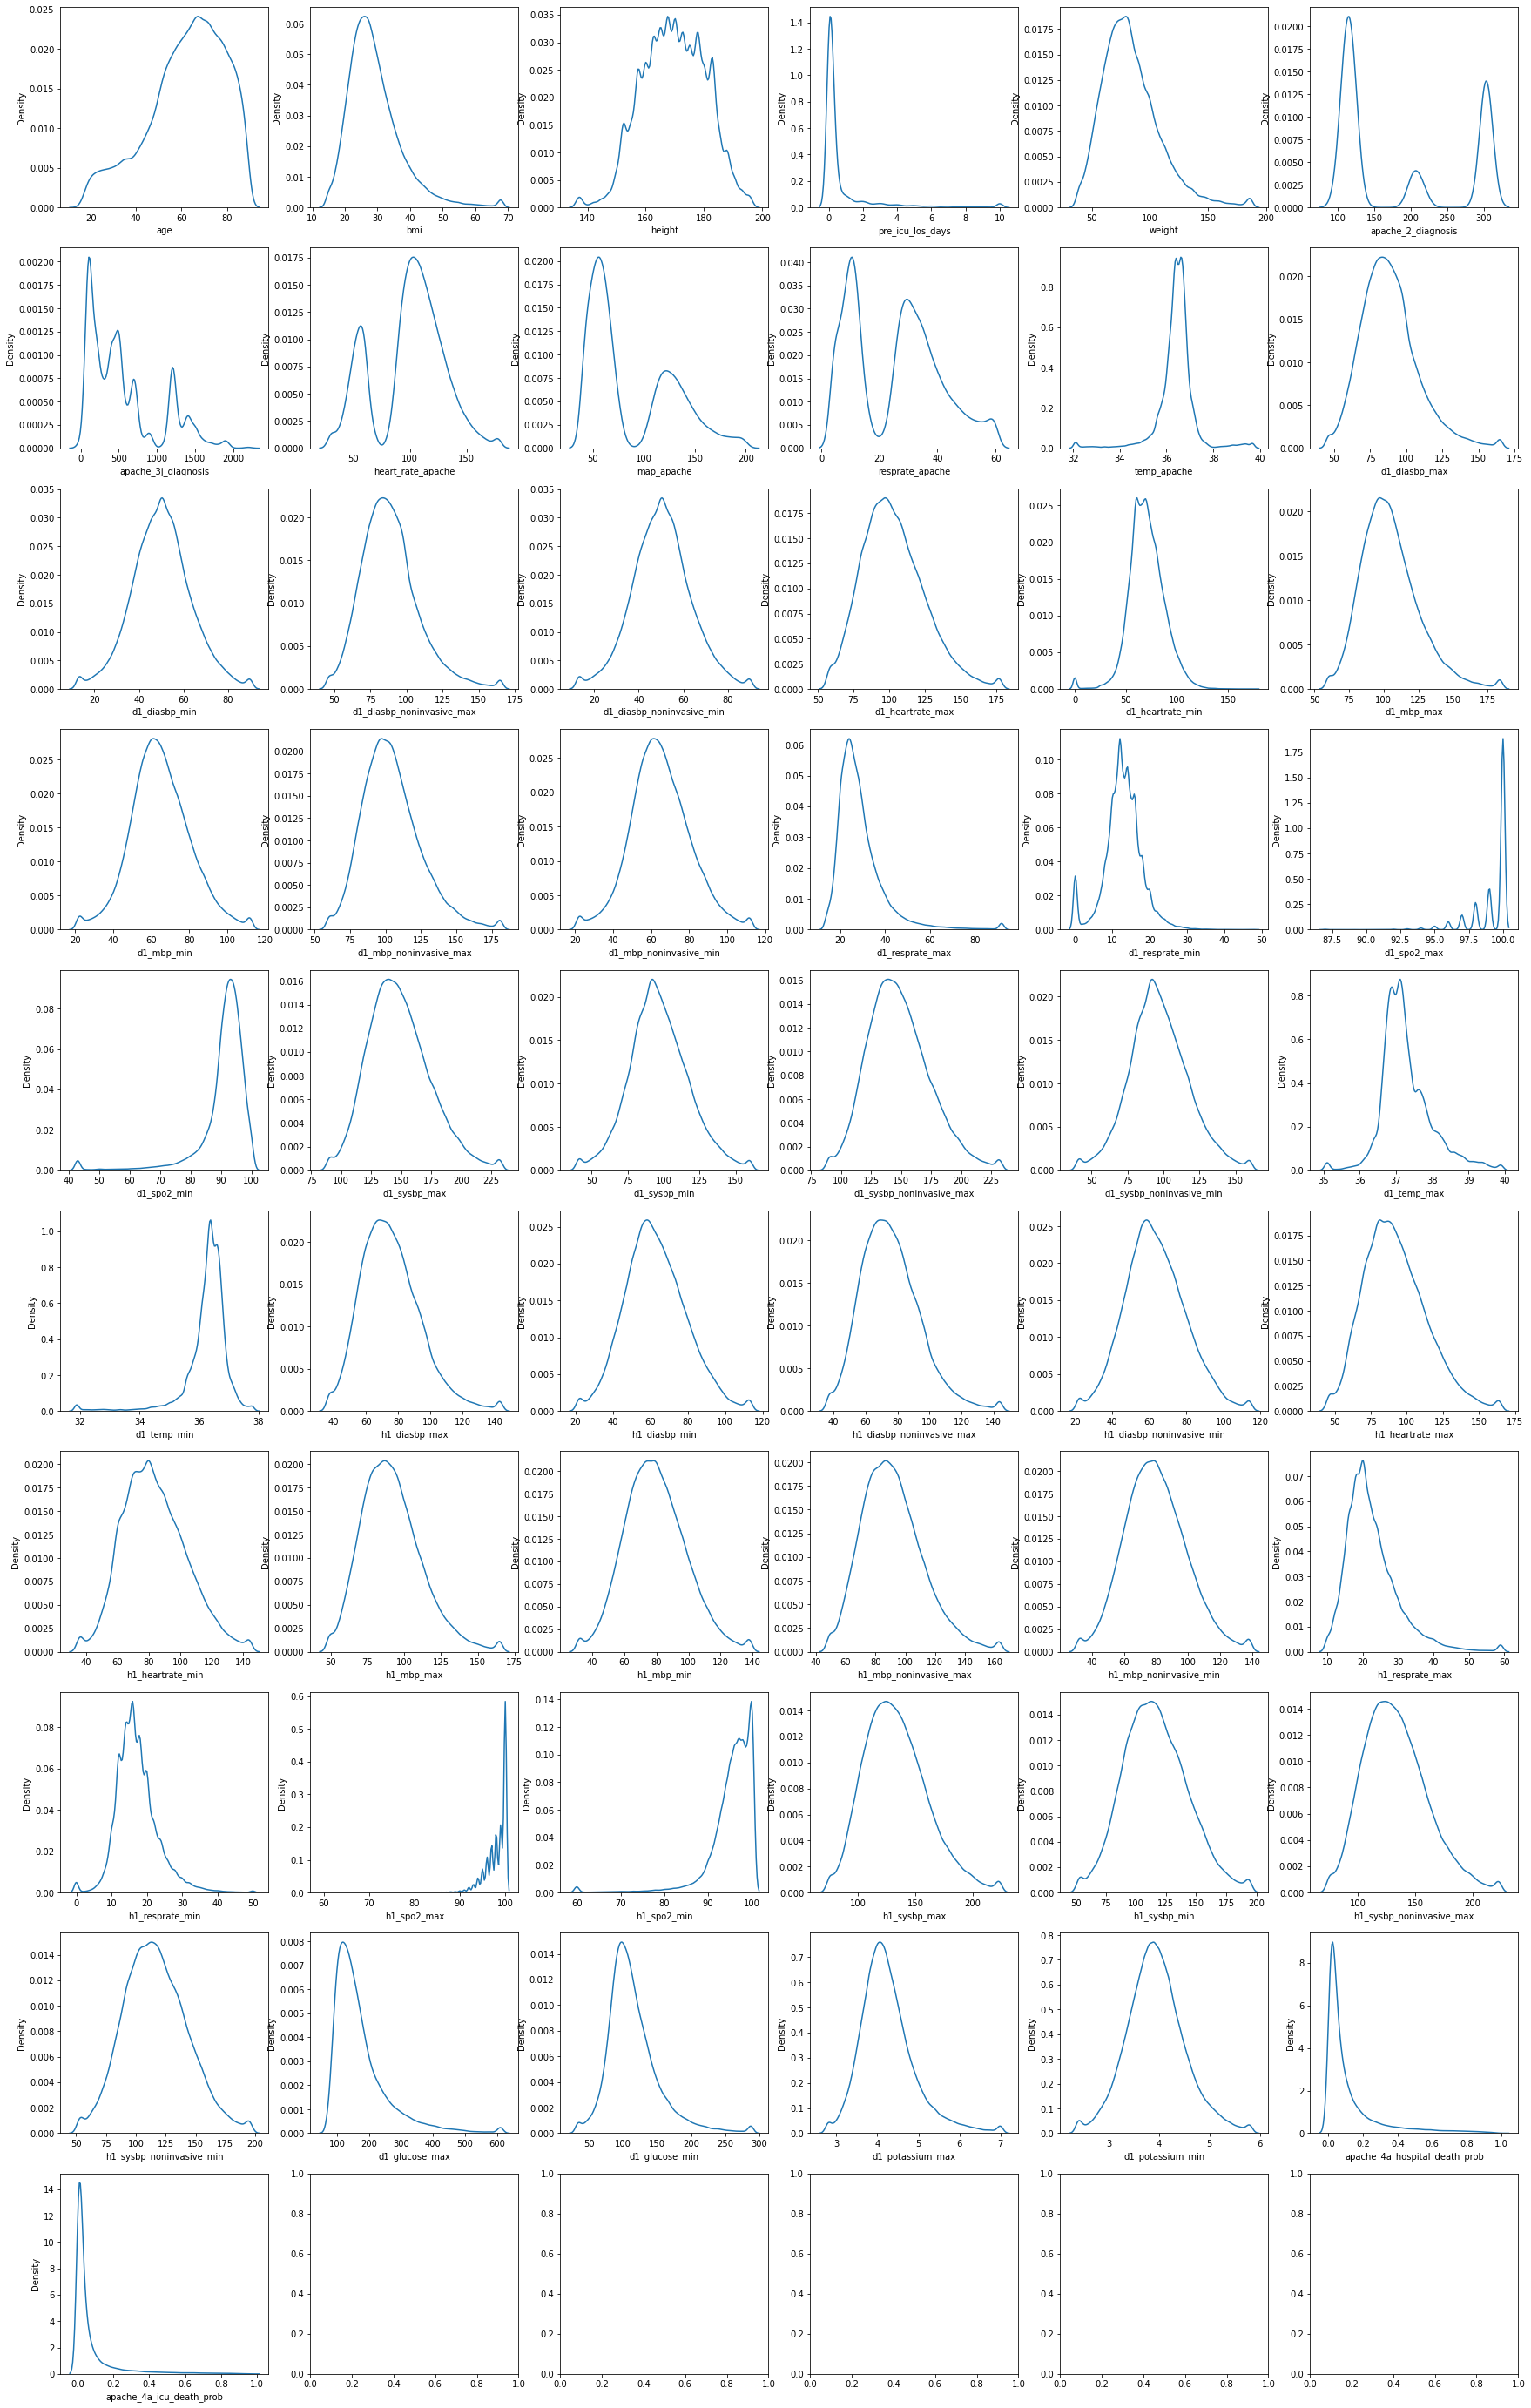

In [1022]:
fig, ax = plt.subplots(nrows=10, ncols=6, figsize=(30,50))

i=0
for col in df_num.columns:   
    r = i//6
    c = i%6
    i+=1
    sns.kdeplot(data=df, x=col, ax=ax[r][c])

In [77]:
# we see using z score method to remove outliers is not viable as it leads to too much data loss

In [1023]:
# We will categorize some variables to mitigate the effect of outliers

In [1024]:
df['pre_icu_los_days'] = pd.cut(df['pre_icu_los_days'], bins=[0,1, 7, df['pre_icu_los_days'].max()], labels=[0, 1, 2], include_lowest=True).astype(object)

In [1025]:
df['d1_spo2_max'] = pd.cut(df['d1_spo2_max'], bins=[0,94,df['d1_spo2_max'].max()], labels=[0,1], include_lowest=True).astype(object)

In [1026]:
df['d1_spo2_min'] = pd.cut(df['d1_spo2_min'], bins=[0,70, 85, df['d1_spo2_min'].max()], labels=[0, 1, 2], include_lowest=True).astype(object)

In [1027]:
df['h1_spo2_max'] = pd.cut(df['h1_spo2_max'], bins=[0,94,df['h1_spo2_max'].max()], labels=[0, 1], include_lowest=True).astype(object)

In [1028]:
df['h1_spo2_min'] = pd.cut(df['h1_spo2_min'], bins=[0,70, 85, df['h1_spo2_min'].max()], labels=[0, 1, 2], include_lowest=True)

In [1029]:
numerical_columns = df.select_dtypes('number').columns

In [1030]:
categorical_columns = df.select_dtypes(exclude='number').columns

In [1031]:
len(numerical_columns), len(categorical_columns)

(50, 30)

## Missing Values <a class="anchor" id="fifth-bullet"></a>

### Check Missing Values

In [1033]:
df_before_missing = df.copy()

In [1034]:
import missingno as msno

<AxesSubplot:>

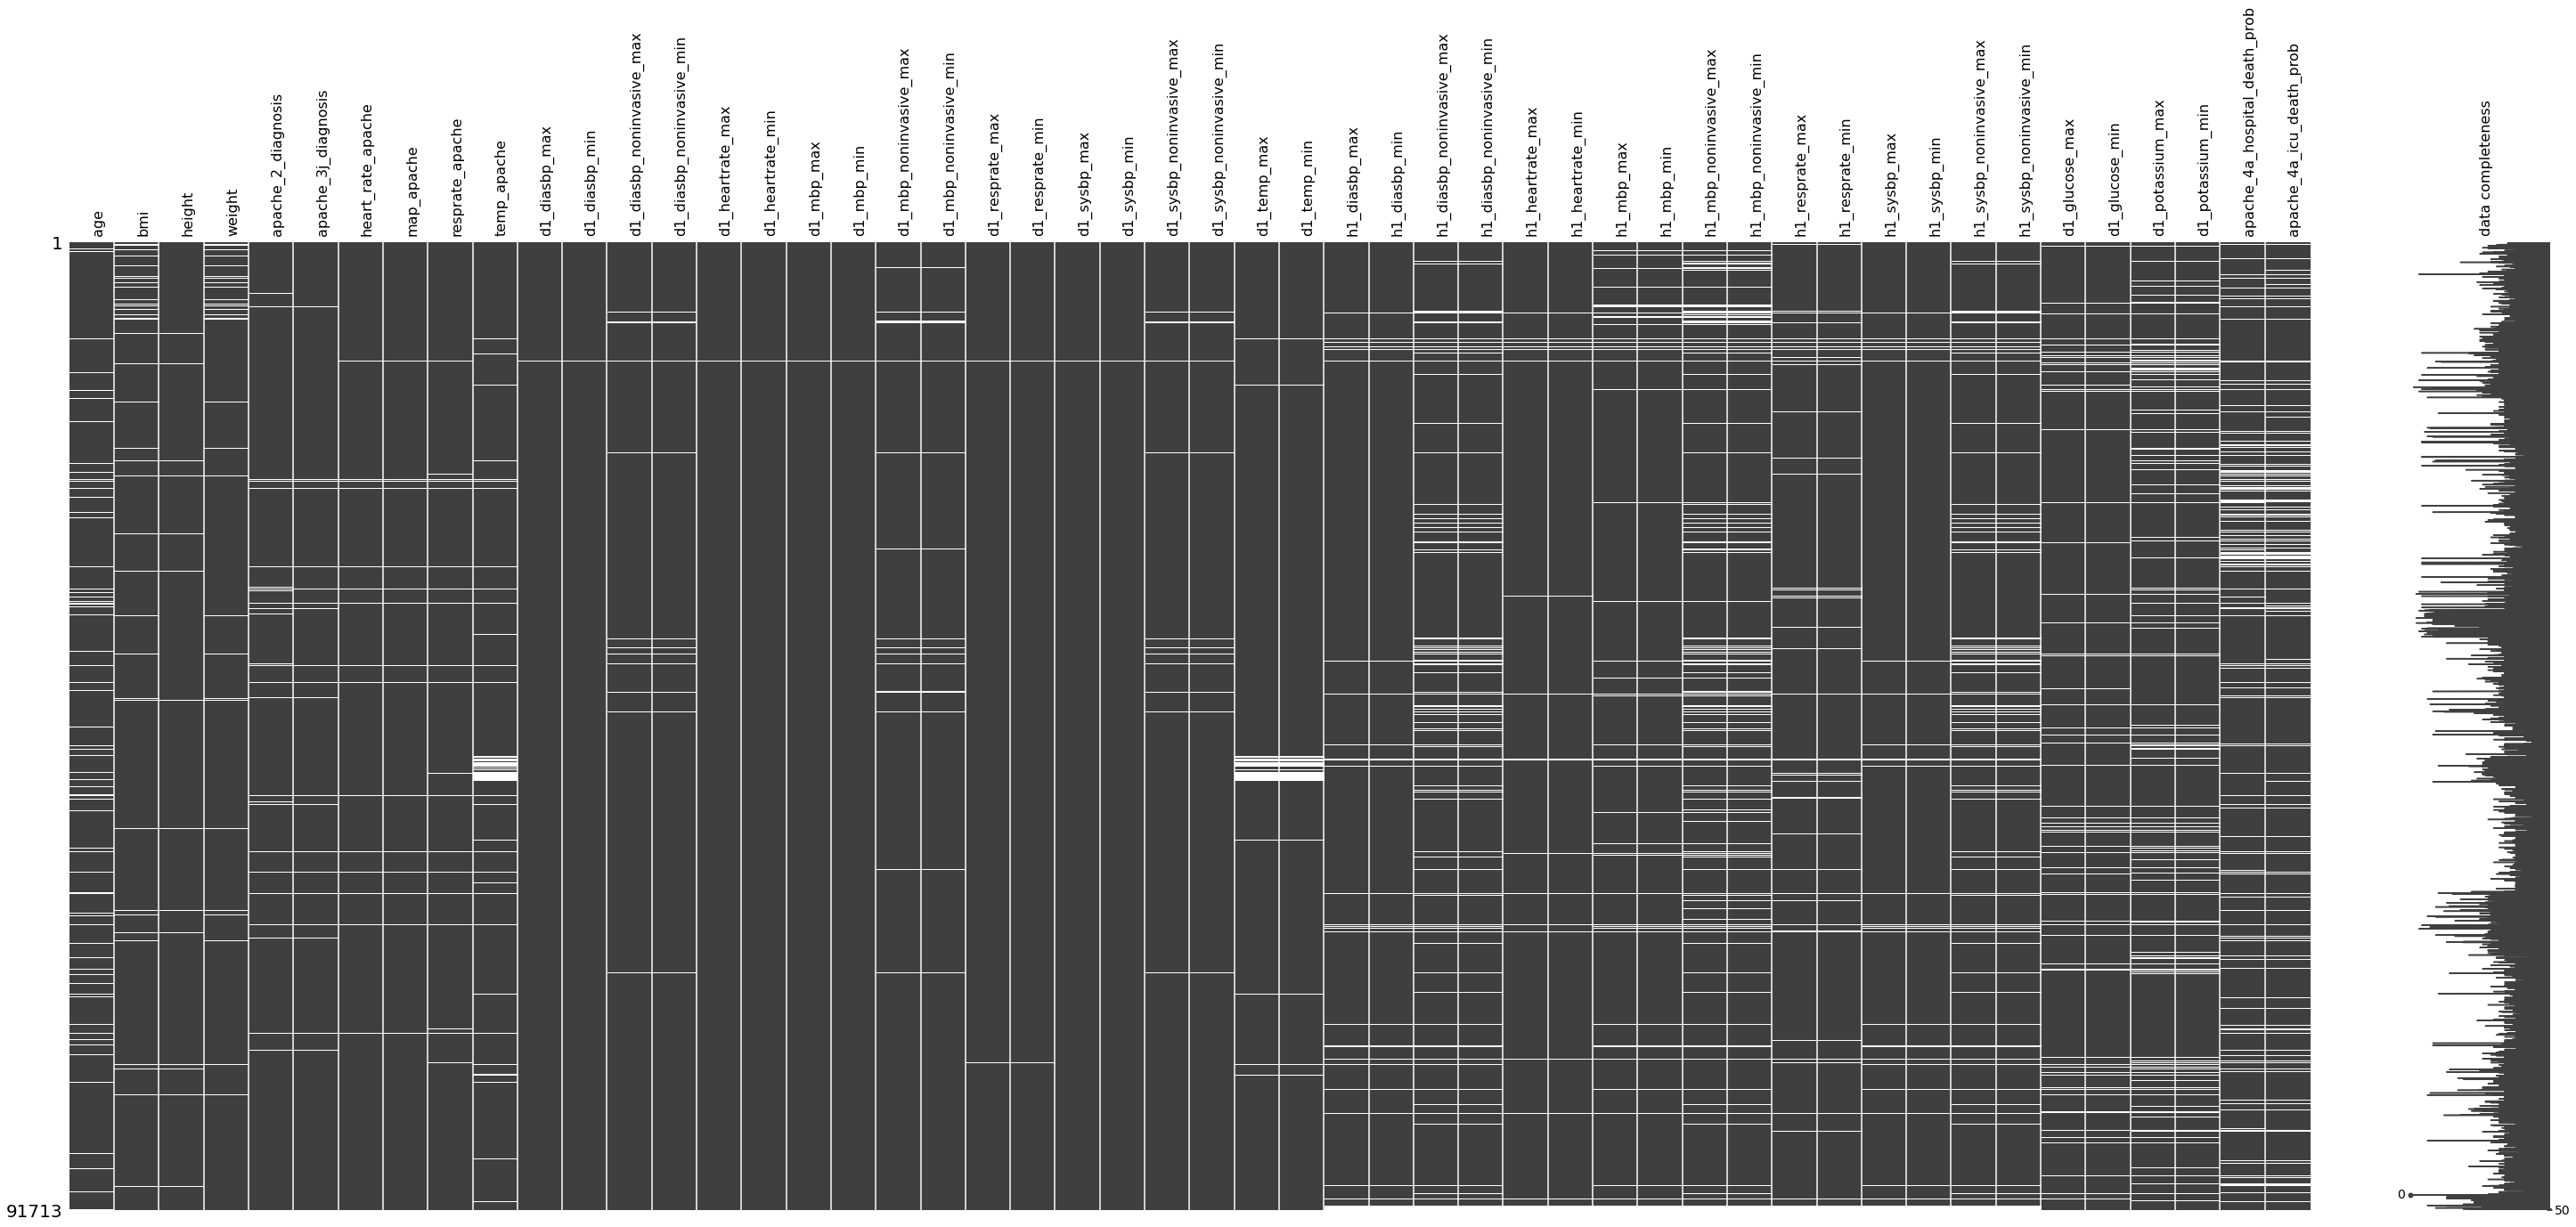

In [1035]:
msno.matrix(df[numerical_columns], figsize=(50,20), labels=True, label_rotation=90)

<AxesSubplot:>

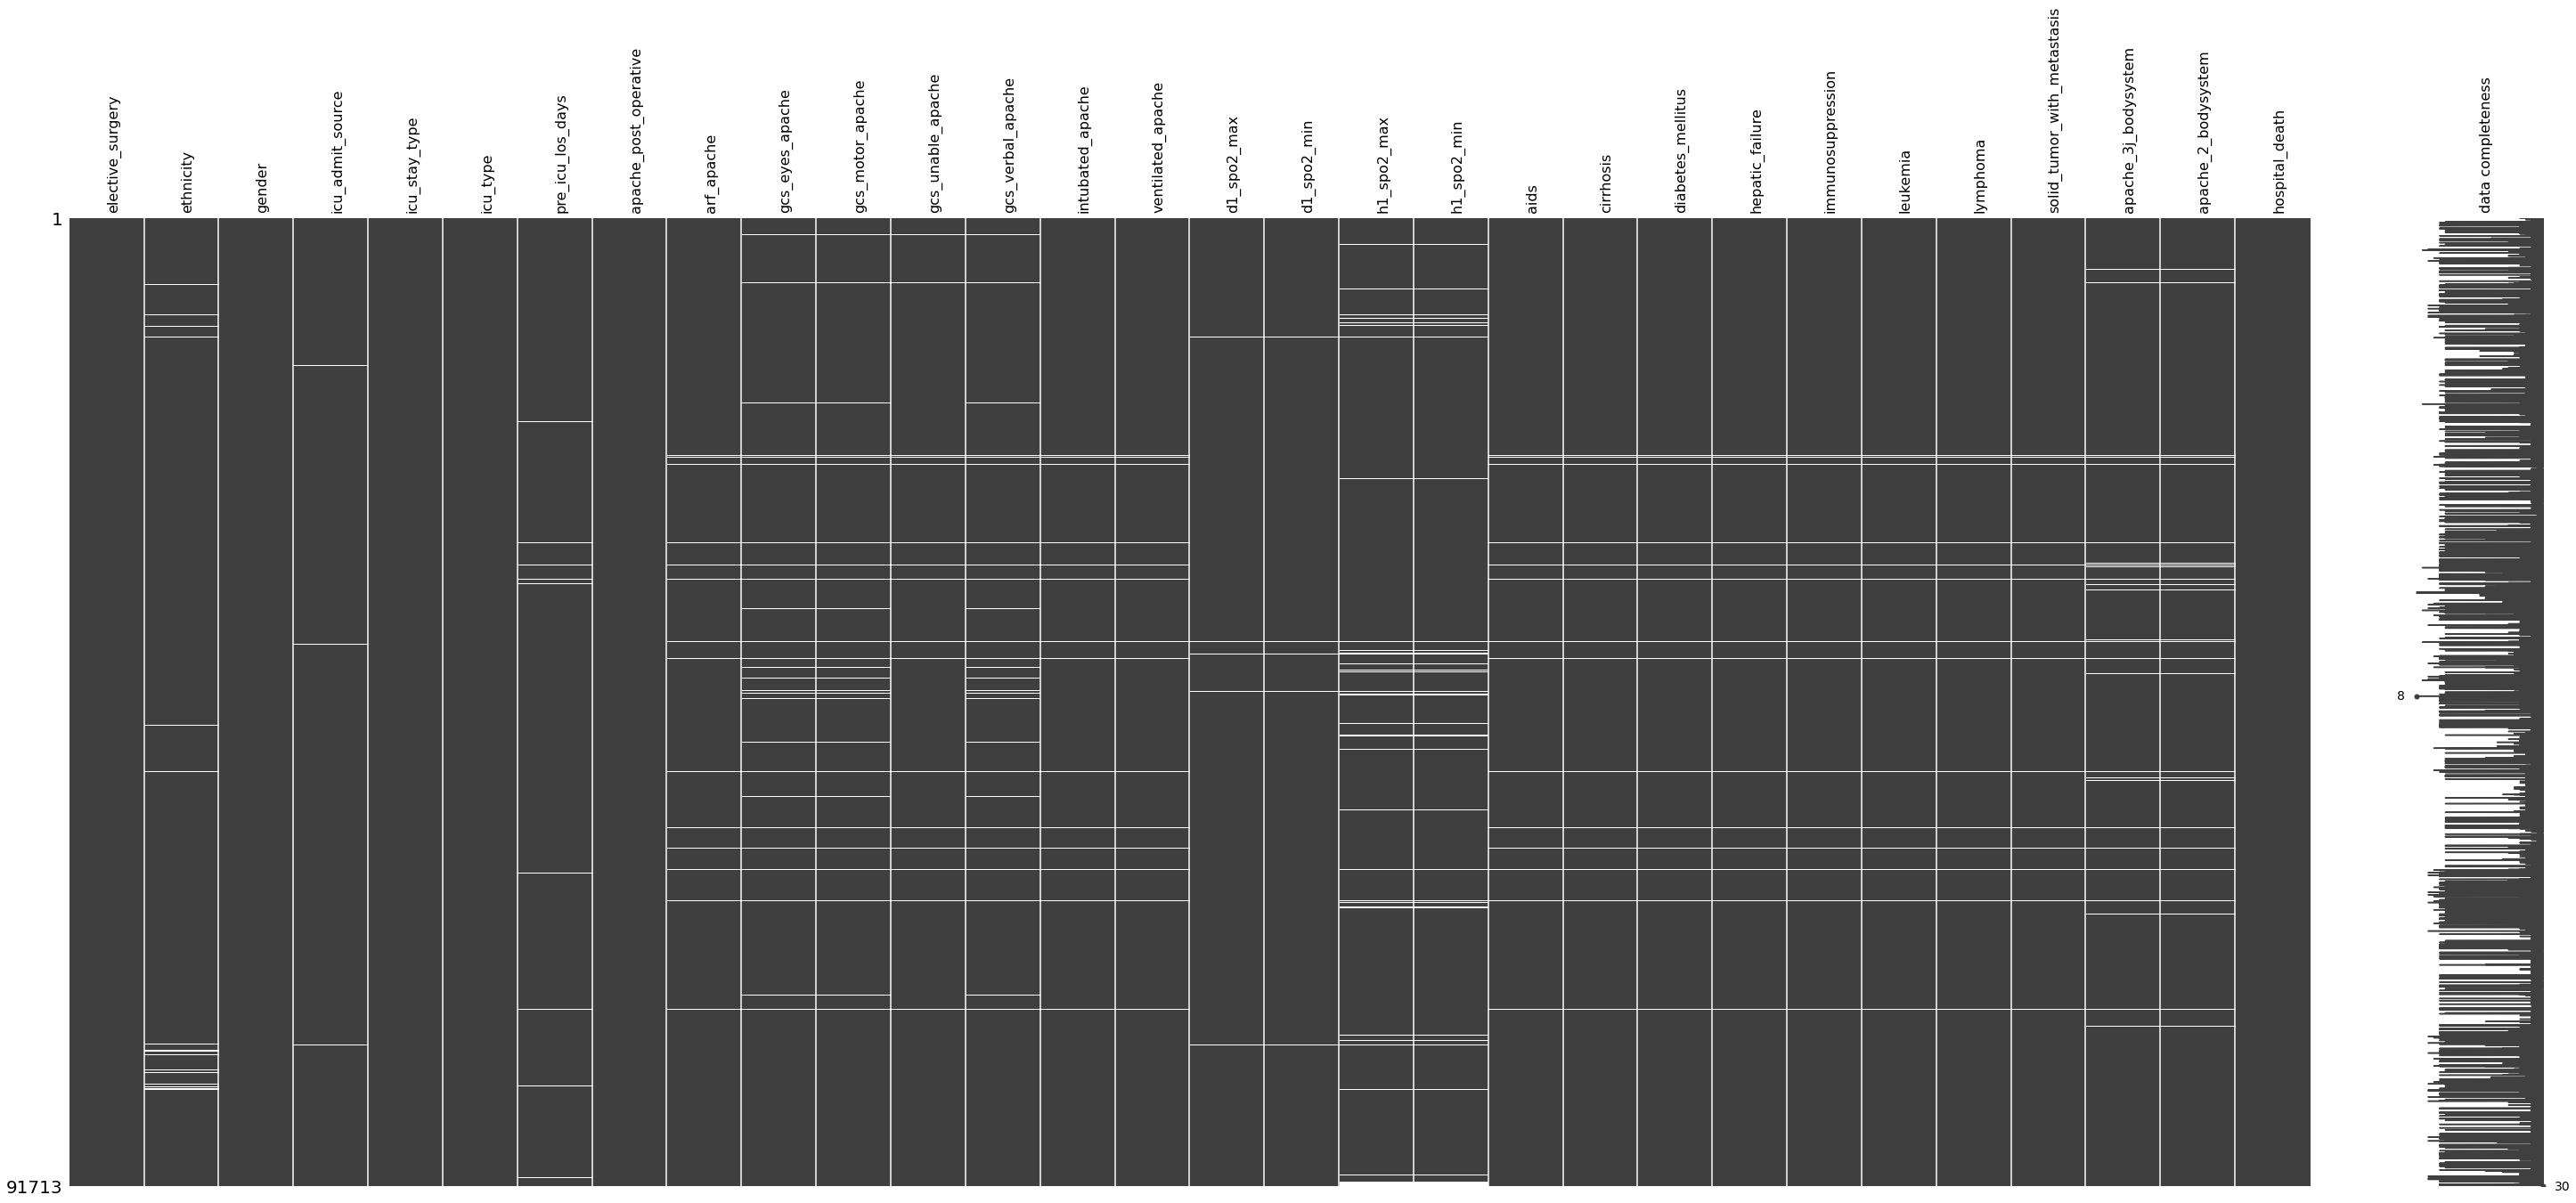

In [1036]:
msno.matrix(df[categorical_columns], figsize=(50,20), labels=True, label_rotation=90)

In [51]:
#relationship between null valued columns based on nullity correlation. 1 - > if one col has null, other col will also have null. for that row.

<AxesSubplot:>

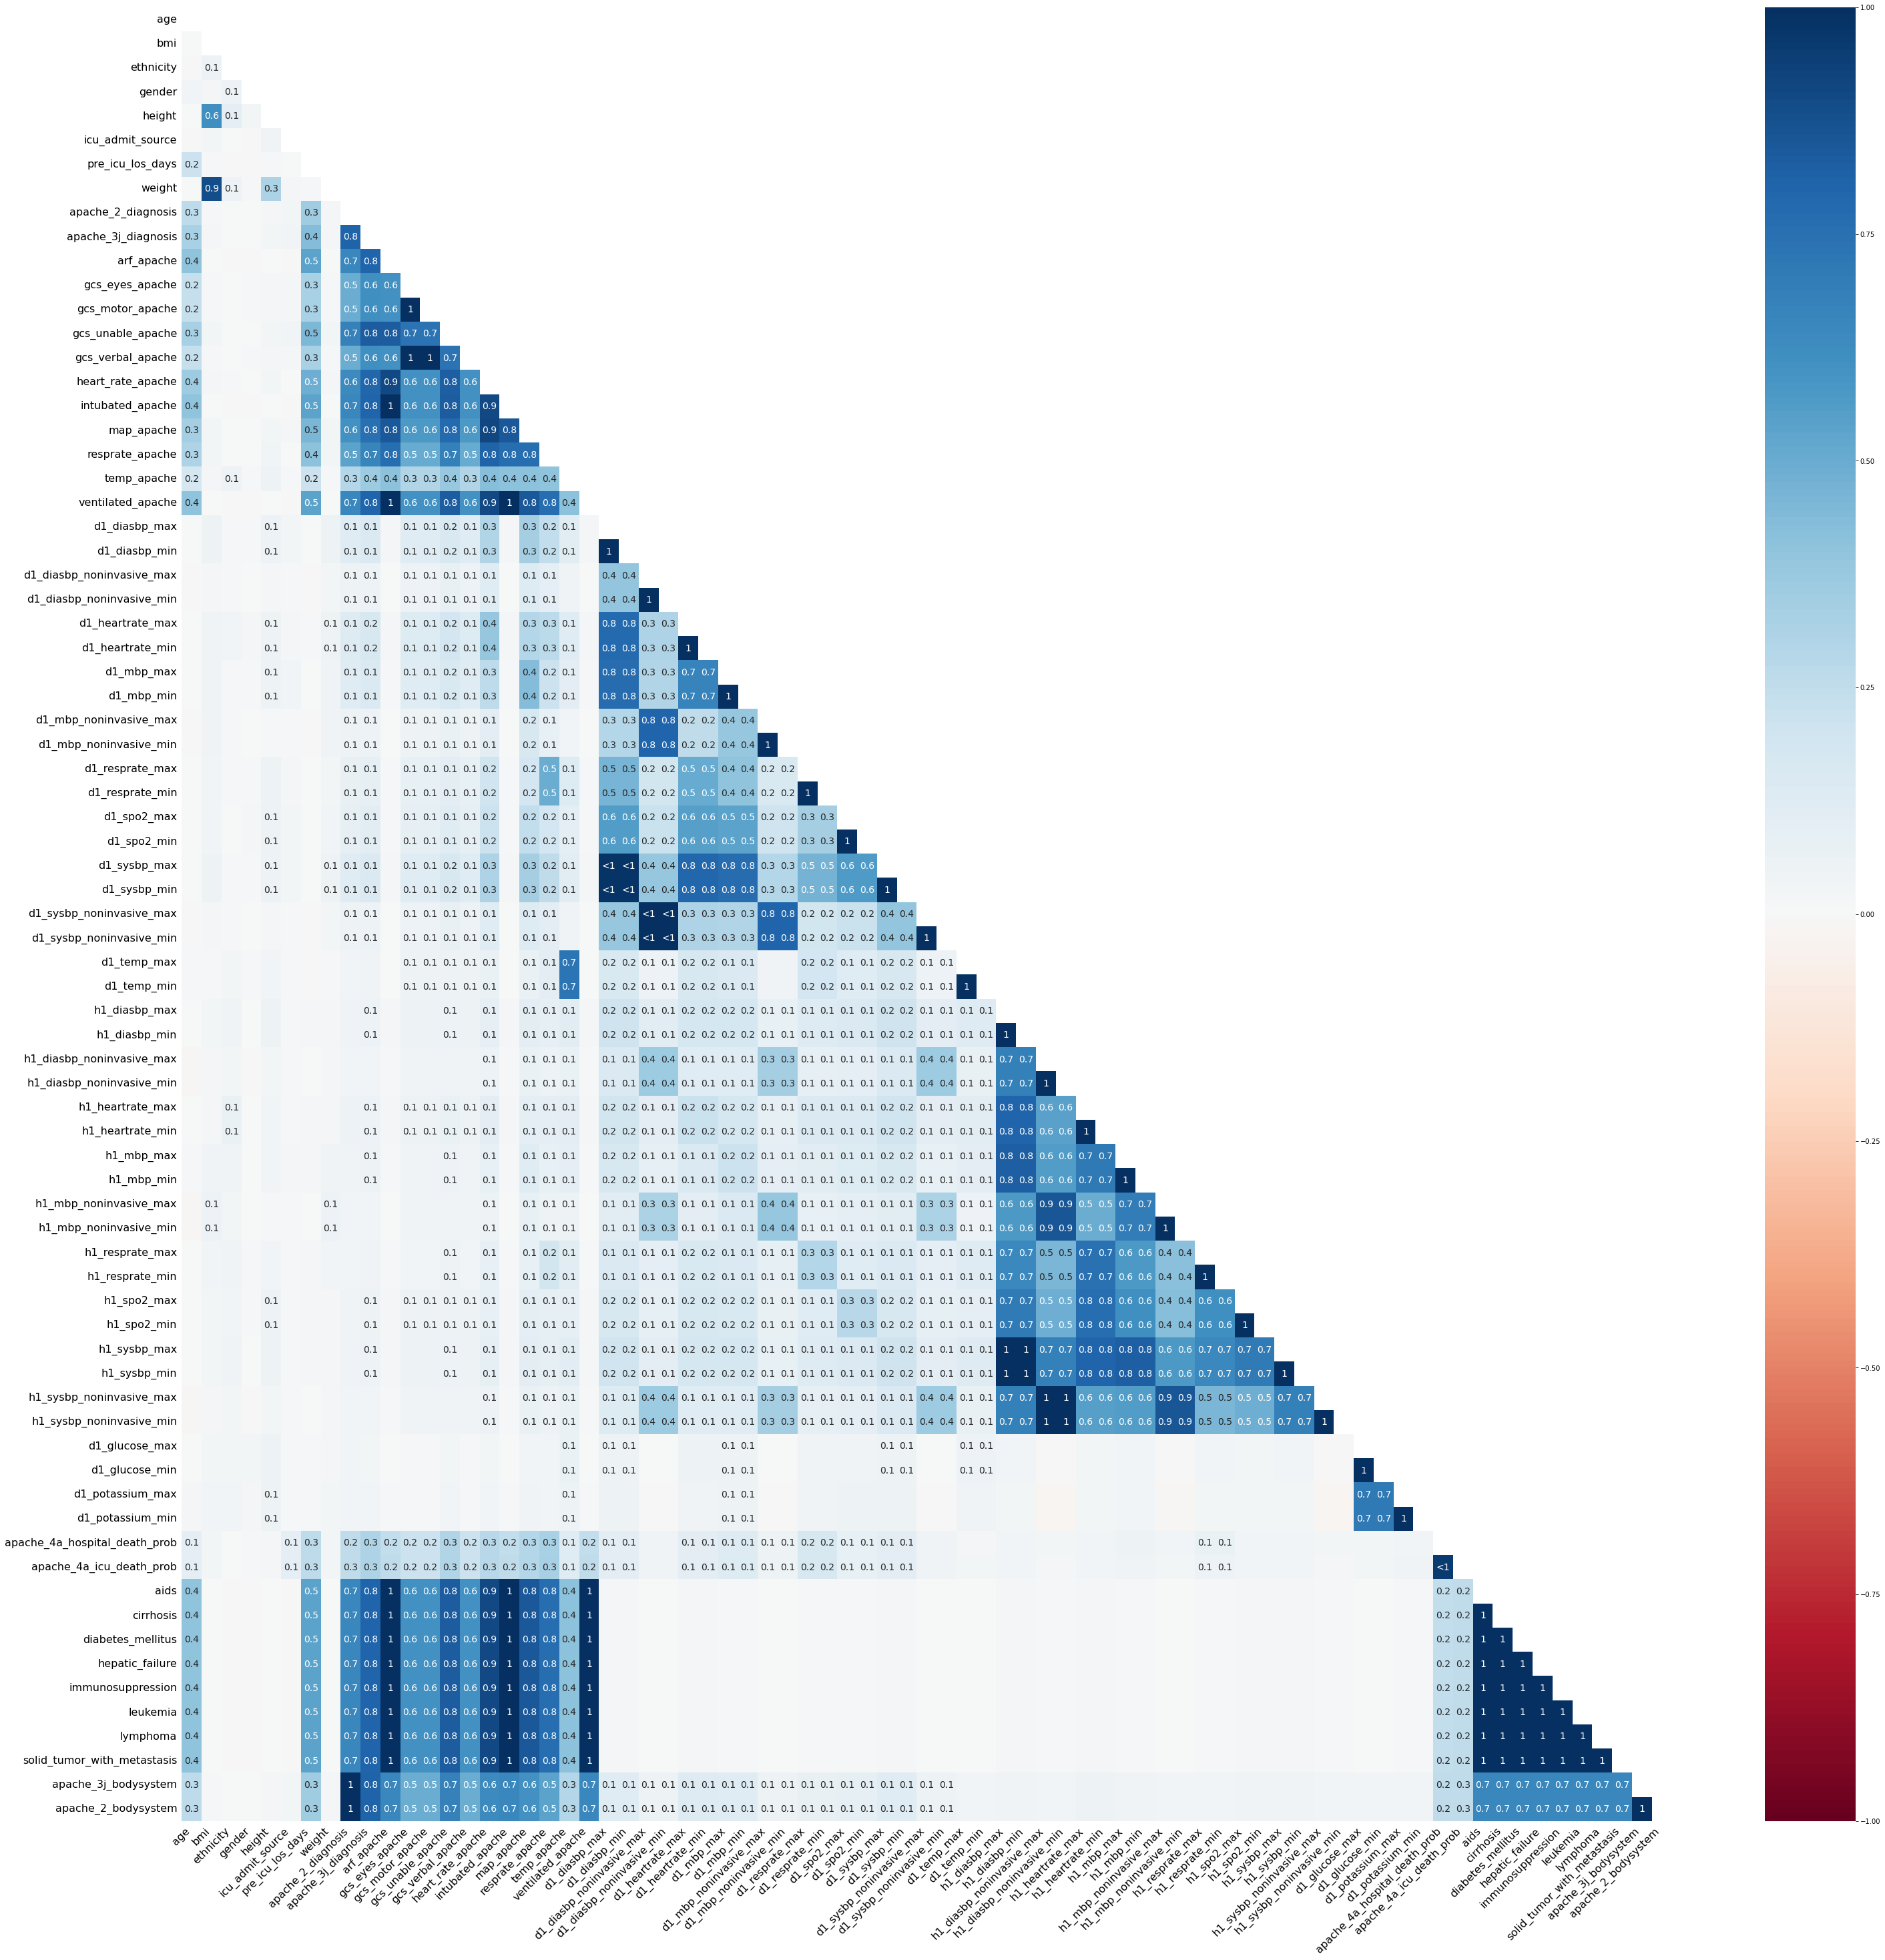

In [1037]:
msno.heatmap(df, figsize=(50,50))

In [1038]:
((df[numerical_columns].isnull().sum()/len(df)).sort_values(ascending=False)*100)

apache_4a_hospital_death_prob    11.250313
apache_4a_icu_death_prob         11.096573
d1_potassium_min                 10.451081
d1_potassium_max                 10.451081
h1_mbp_noninvasive_min            9.904812
h1_mbp_noninvasive_max            9.904812
h1_diasbp_noninvasive_max         8.014131
h1_diasbp_noninvasive_min         8.014131
h1_sysbp_noninvasive_min          8.004318
h1_sysbp_noninvasive_max          8.004318
d1_glucose_min                    6.331709
d1_glucose_max                    6.331709
h1_mbp_min                        5.058171
h1_mbp_max                        5.058171
h1_resprate_min                   4.750690
h1_resprate_max                   4.750690
age                               4.610033
temp_apache                       4.479191
h1_diasbp_min                     3.946005
h1_diasbp_max                     3.946005
h1_sysbp_max                      3.937283
h1_sysbp_min                      3.937283
bmi                               3.738837
h1_heartrat

In [1039]:
((df[categorical_columns].isnull().sum()/len(df)).sort_values(ascending=False)*100)

h1_spo2_min                    4.563148
h1_spo2_max                    4.563148
gcs_verbal_apache              2.072770
gcs_eyes_apache                2.072770
gcs_motor_apache               2.072770
apache_2_bodysystem            1.812175
apache_3j_bodysystem           1.812175
ethnicity                      1.521049
gcs_unable_apache              1.130701
pre_icu_los_days               0.848298
immunosuppression              0.779606
hepatic_failure                0.779606
diabetes_mellitus              0.779606
cirrhosis                      0.779606
aids                           0.779606
leukemia                       0.779606
ventilated_apache              0.779606
intubated_apache               0.779606
lymphoma                       0.779606
arf_apache                     0.779606
solid_tumor_with_metastasis    0.779606
d1_spo2_min                    0.363089
d1_spo2_max                    0.363089
icu_admit_source               0.122120
gender                         0.027259


###

### Highly Correlated columns

Many columns are highly correlated . The threshold for correlation is being considered as 0.98 or 98% for this dataset.
Accordingly there will be 12 highly coorelated columns which will be dropped from  " df_full "

In [1040]:
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.98
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]
print(len(to_drop), to_drop)

12 ['d1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min']


In [1041]:
df.drop(to_drop,axis=1,inplace=True)

In [1042]:
df.shape

(91713, 68)

In [1043]:
numerical_columns = df.select_dtypes('number').columns

###

### Splitting the dataset

In [1044]:
def split_dataset(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=test_size, random_state=100)
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return X_train, X_test, y_train, y_test

In [1045]:
X = df.drop(columns='hospital_death')
y = df['hospital_death']
X_train, X_test, y_train, y_test = split_dataset(X, y, 0.3)

print('Total no. of samples: Training and Testing dataset separately')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately
X_train: (64199, 67)
y_train: (64199,)
X_test: (27514, 67)
y_test: (27514,)


In [1046]:
df.shape

(91713, 68)

##

### Encoding categorical variables

In [1047]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [1048]:
# types of categorical columns
ordinal_cols = ['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'd1_spo2_min', 'h1_spo2_min', 'pre_icu_los_days']
nominal_cols = ['ethnicity', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']
binary_cols = list( set(categorical_columns).difference( set(ordinal_cols + nominal_cols) ))
binary_cols.remove('hospital_death')
print('ordinal_columns:\n', len(ordinal_cols), ordinal_cols)
print('nominal_columns:\n', len(nominal_cols), nominal_cols)
print('binary_columns:\n', len(binary_cols), binary_cols)

ordinal_columns:
 6 ['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'd1_spo2_min', 'h1_spo2_min', 'pre_icu_los_days']
nominal_columns:
 6 ['ethnicity', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']
binary_columns:
 17 ['solid_tumor_with_metastasis', 'hepatic_failure', 'immunosuppression', 'gender', 'ventilated_apache', 'diabetes_mellitus', 'aids', 'h1_spo2_max', 'elective_surgery', 'apache_post_operative', 'd1_spo2_max', 'intubated_apache', 'cirrhosis', 'lymphoma', 'gcs_unable_apache', 'leukemia', 'arf_apache']


In [1049]:
oe = OrdinalEncoder()
# these columns are either ordered or binary, hence we can use ordinal
oe.fit(X_train[ordinal_cols+binary_cols])

OrdinalEncoder()

In [1050]:
x1 = pd.DataFrame(oe.transform(X_train[ordinal_cols+binary_cols]), columns=ordinal_cols+binary_cols)

In [1051]:
ohe = OneHotEncoder(drop='first', sparse=False)
# nulls are assigned as new subcategory
ohe.fit(X_train[nominal_cols])

OneHotEncoder(drop='first', sparse=False)

In [1052]:
x2 = pd.DataFrame(ohe.transform(X_train[nominal_cols]), columns=ohe.get_feature_names_out())

In [1053]:
X_train = pd.concat([X_train[numerical_columns], x1, x2], axis=1)

In [1054]:
X_train.shape

(64199, 101)

In [1055]:
X_train.head()

age        bmi  height  weight  apache_2_diagnosis  apache_3j_diagnosis  \
0  73.0  40.163901   157.0    99.0               108.0               203.01   
1  54.0  27.260774   185.0    93.3               302.0               111.01   
2  83.0  28.266528   167.6    79.4               106.0               212.01   
3  28.0        NaN     NaN    67.6               303.0               211.07   
4  19.0  21.380336   154.9    51.3               122.0               703.03   

   heart_rate_apache  map_apache  resprate_apache  temp_apache  d1_diasbp_max  \
0              121.0       127.0              4.0         37.2          116.0   
1               96.0       126.0             59.0         36.4          100.0   
2              152.0        46.0             50.0         36.7           91.0   
3              130.0        49.0             10.0         36.7           94.0   
4              102.0        65.0             30.0         35.8           74.0   

   d1_diasbp_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_max  d1_mbp_min  \
0           51.0             130.0              78.0       144.0        62.0   
1           68.0             101.0              75.0       126.0        84.0   
2           45.0             148.0              72.0       117.0        53.0   
3           40.0             128.0              61.0        97.0        49.0   
4           71.0              82.0              76.0        90.0        82.0   

   d1_resprate_max  d1_resprate_min  d1_sysbp_max  d1_sysbp_min  d1_temp_max  \
0             28.0              0.0         228.0          75.0         38.2   
1             59.0              6.0         151.0         108.0         38.0   
2             54.0             19.0         166.0          72.0         37.3   
3             24.0             10.0         147.0          82.0         37.4   
4             17.0             17.0         111.0          85.0         36.4   

   d1_temp_min  h1_diasbp_max  h1_diasbp_min  h1_heartrate_max  \
0         37.2          116.0           76.0             130.0   
1         36.4            NaN            NaN             101.0   
2         35.2           88.0           88.0             144.0   
3         36.6           94.0           40.0              85.0   
4         35.8           74.0           74.0              76.0   

   h1_heartrate_min  h1_mbp_max  h1_mbp_min  h1_resprate_max  h1_resprate_min  \
0              94.0       144.0        96.0             28.0             21.0   
1              85.0       115.0        96.0             20.0              6.0   
2             108.0       103.0       103.0             54.0             21.0   
3              61.0        83.0        49.0             12.0             10.0   
4              76.0        90.0        90.0             17.0             17.0   

   h1_sysbp_max  h1_sysbp_min  d1_glucose_max  d1_glucose_min  \
0         223.0         167.0             NaN             NaN   
1           NaN           NaN           251.0           205.0   
2         166.0         166.0           203.0           171.0   
3         143.0          82.0           111.0            94.0   
4         111.0         111.0           203.0            88.0   

   d1_potassium_max  d1_potassium_min  apache_4a_hospital_death_prob  \
0               NaN               NaN                           0.19   
1               4.2               4.2                           0.04   
2               3.4               3.1                           0.79   
3               4.1               3.3                           0.18   
4               4.9               3.4                           0.00   

   apache_4a_icu_death_prob  gcs_eyes_apache  gcs_motor_apache  \
0                      0.09              1.0               4.0   
1                      0.01              3.0               5.0   
2                      0.62              0.0               2.0   
3                      0.13              0.0               0.0   
4                      0.00              3

In [1056]:
X_train.dtypes.unique()

array([dtype('float64')], dtype=object)

In [1057]:
X_columns = X_train.columns

In [1058]:
# All columns are numerical now.

In [1059]:
X_train.isna().sum().sum()

99647

In [1060]:
x1_test = pd.DataFrame(oe.transform(X_test[ordinal_cols+binary_cols]), columns=ordinal_cols+binary_cols)

In [1061]:
x2_test = pd.DataFrame(ohe.transform(X_test[nominal_cols]), columns=ohe.get_feature_names_out())

In [1062]:
X_test = pd.concat([X_test[numerical_columns], x1_test, x2_test], axis=1)

In [1063]:
X_test.shape

(27514, 101)

In [1064]:
X_test.head()

age        bmi  height  weight  apache_2_diagnosis  apache_3j_diagnosis  \
0  30.0        NaN     NaN     NaN                 NaN                  NaN   
1  67.0  36.481695   153.0    85.4               109.0               108.01   
2  62.0  25.525316   167.6    71.7               301.0               403.01   
3  61.0  35.925700   175.3   110.4               113.0               501.01   
4  51.0  42.011817   170.2   121.7                 NaN                 0.23   

   heart_rate_apache  map_apache  resprate_apache  temp_apache  d1_diasbp_max  \
0                NaN         NaN              NaN          NaN            NaN   
1              105.0       125.0             54.0         36.5           86.0   
2               83.0       157.0             26.0          NaN          123.0   
3              137.0        40.0             38.0         38.9           99.0   
4               95.0        61.0             39.0         36.9           69.0   

   d1_diasbp_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_max  d1_mbp_min  \
0            NaN               NaN               NaN         NaN         NaN   
1           81.0              84.0              83.0       110.0       104.0   
2           87.0              90.0              73.0       157.0       112.0   
3           16.0             128.0              96.0        96.0        32.0   
4           50.0              92.0              79.0        85.0        61.0   

   d1_resprate_max  d1_resprate_min  d1_sysbp_max  d1_sysbp_min  d1_temp_max  \
0              NaN              NaN           NaN           NaN          NaN   
1             30.0             14.0         155.0         140.0         37.2   
2             45.0             13.0         208.0         143.0          NaN   
3             38.0              0.0         176.0          99.0         38.9   
4             29.0             10.0         116.0          81.0         37.7   

   d1_temp_min  h1_diasbp_max  h1_diasbp_min  h1_heartrate_max  \
0          NaN            NaN            NaN               NaN   
1         36.5           86.0           86.0              83.0   
2          NaN            NaN            NaN               NaN   
3         37.3           41.0           22.0             113.0   
4         36.9           65.0           55.0              88.0   

   h1_heartrate_min  h1_mbp_max  h1_mbp_min  h1_resprate_max  h1_resprate_min  \
0               NaN         NaN         NaN              NaN              NaN   
1              83.0       104.0       104.0             14.0             14.0   
2               NaN         NaN         NaN              NaN              NaN   
3             101.0        64.0        32.0             38.0             31.0   
4              80.0        85.0        70.0             20.0             11.0   

   h1_sysbp_max  h1_sysbp_min  d1_glucose_max  d1_glucose_min  \
0           NaN           NaN           222.0           130.0   
1         140.0         140.0           135.0           116.0   
2           NaN           NaN            97.0            97.0   
3         136.0         103.0           184.0           133.0   
4         116.0          98.0             NaN             NaN   

   d1_potassium_max  d1_potassium_min  apache_4a_hospital_death_prob  \
0               NaN               NaN                            NaN   
1               3.7               3.7                            NaN   
2               3.7               3.7                           0.07   
3               4.1               4.1                           0.49   
4               NaN               NaN                           0.00   

   apache_4a_icu_death_prob  gcs_eyes_apache  gcs_motor_apache  \
0                       NaN              NaN               NaN   
1                       NaN              3.0               5.0   
2                      0.03              3.0               5.0   
3                      0.33              0.0               3.0   
4                      0.00              3

In [1065]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [1066]:
y_train = le.transform(y_train)

In [1067]:
y_test = le.transform(y_test)

In [1068]:
pd.Series(y_train).value_counts(normalize=True)

0    0.913363
1    0.086637
dtype: float64

In [1069]:
pd.Series(y_test).value_counts(normalize=True)

0    0.91448
1    0.08552
dtype: float64

##

## Imputation

In [1070]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

### Simple Imputation
Filling missing values using median and mode

In [1071]:
def perform_imputation_simple(X_train, X_test, numerical_columns, ordinal_cols, binary_cols):
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()
    
    # median imputation for numerical columns
    imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_num.fit(X_train[numerical_columns])
    X_train_imputed[numerical_columns] = imp_num.transform(X_train[numerical_columns])
    X_test_imputed[numerical_columns] = imp_num.transform(X_test[numerical_columns])
    
    # Mode imputation for categorical variables (nominal columns already include new column for missing)
    imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imp_cat.fit(X_train[ordinal_cols+binary_cols])
    X_train_imputed[ordinal_cols+binary_cols] = imp_cat.transform(X_train[ordinal_cols+binary_cols])
    X_test_imputed[ordinal_cols+binary_cols] = imp_cat.transform(X_test[ordinal_cols+binary_cols])
    
    return X_train_imputed, X_test_imputed

### Multiple Imputer
A strategy for imputing missing values by modeling each feature with
missing values as a function of other features in a round-robin fashion

In [1072]:
def perform_imputation_mice(X_train, X_test, numerical_columns, ordinal_cols, binary_cols):
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()
    
    # Imputing numerical features with Linear Regression as estimator for MICE
    lr = LinearRegression()
    imp_num = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=10, verbose=2, random_state=0)
    imp_num.fit(X_train[numerical_columns])
    X_train_imputed[numerical_columns] = imp_num.transform(X_train[numerical_columns])
    X_test_imputed[numerical_columns] = imp_num.transform(X_test[numerical_columns])
    
    # Imputing categorical features with Decision Tree as estimator for MICE (nominal columns already include new column for missing)
    dt = DecisionTreeClassifier(max_depth=10)
    imp_cat = IterativeImputer(estimator=dt, missing_values=np.nan, max_iter=10, verbose=2, random_state=0)
    imp_cat.fit(X_train[ordinal_cols+binary_cols])
    X_train_imputed[ordinal_cols+binary_cols] = imp_cat.transform(X_train[ordinal_cols+binary_cols])
    X_test_imputed[ordinal_cols+binary_cols] = imp_cat.transform(X_test[ordinal_cols+binary_cols])
    
    return X_train_imputed, X_test_imputed

### KNN Imputer

Since KNN uses nearest neighbor and imputes the missing values and it doesnt depend
on other columns like in multivariate approach.
Second it uses Euclidean distance to form the neighbors and fillinf missing values 
is not random or artificial unlike in Simple Imputations

In [1073]:
def perform_imputation_knn(X_train, X_test, numerical_columns, ordinal_cols, binary_cols):
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    # Scaling numerical columns before applying KNN impute
    sc = StandardScaler()
    sc.fit(X_train[numerical_columns])
    X_train_scaled[numerical_columns] = sc.transform(X_train[numerical_columns])
    X_test_scaled[numerical_columns] = sc.transform(X_test[numerical_columns])
    
    # Imputing numerical features with KNN
    impute_knn=KNNImputer(n_neighbors=4)
    impute_knn.fit(X_train_scaled[numerical_columns])
    X_train_scaled[numerical_columns] = impute_knn.transform(X_train_scaled[numerical_columns])
    X_test_scaled[numerical_columns] = impute_knn.transform(X_test_scaled[numerical_columns])
    
#     # Mode imputation for categorical variables (nominal columns already include new column for missing)
#     imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#     imp_cat.fit(X_train_scaled[ordinal_cols+binary_cols])
#     X_train_scaled[ordinal_cols+binary_cols] = imp_cat.transform(X_train_scaled[ordinal_cols+binary_cols])
#     X_test_scaled[ordinal_cols+binary_cols] = imp_cat.transform(X_test_scaled[ordinal_cols+binary_cols])
    
    # Imputing categorical features with Decision Tree as estimator for MICE (nominal columns already include new column for missing)
    dt = DecisionTreeClassifier(max_depth=10)
    imp_cat = IterativeImputer(estimator=dt, missing_values=np.nan, max_iter=10, verbose=2, random_state=0)
    imp_cat.fit(X_train_scaled[ordinal_cols+binary_cols])
    X_train_scaled[ordinal_cols+binary_cols] = imp_cat.transform(X_train_scaled[ordinal_cols+binary_cols])
    X_train_scaled[ordinal_cols+binary_cols] = imp_cat.transform(X_train_scaled[ordinal_cols+binary_cols])
    
    # inverse transform the numerical values to get to to original scale before returning
    X_train_scaled[numerical_columns] = sc.inverse_transform(X_train[numerical_columns])
    X_test_scaled[numerical_columns] = sc.inverse_transform(X_test[numerical_columns])
    
    return X_train_scaled, X_test_scaled

In [1074]:
# there are no missing values in target
pd.isna(y_train).sum(), pd.isna(y_test).sum()

(0, 0)

In [1075]:
X_train, X_test = perform_imputation_mice(X_train, X_test, numerical_columns, ordinal_cols, binary_cols)
# X_train, X_test = perform_imputation_knn(X_train, X_test, numerical_columns, ordinal_cols, binary_cols)
# X_train, X_test = perform_imputation_simple(X_train, X_test, numerical_columns, ordinal_cols, binary_cols)

[IterativeImputer] Completing matrix with shape (64199, 38)
[IterativeImputer] Ending imputation round 1/10, elapsed time 5.19
[IterativeImputer] Change: 584.8800528089959, scaled tolerance: 2.2010500000000004 
[IterativeImputer] Ending imputation round 2/10, elapsed time 10.25
[IterativeImputer] Change: 203.6387315413549, scaled tolerance: 2.2010500000000004 
[IterativeImputer] Ending imputation round 3/10, elapsed time 15.34
[IterativeImputer] Change: 107.944758908541, scaled tolerance: 2.2010500000000004 
[IterativeImputer] Ending imputation round 4/10, elapsed time 20.42
[IterativeImputer] Change: 66.73874048343, scaled tolerance: 2.2010500000000004 
[IterativeImputer] Ending imputation round 5/10, elapsed time 25.48
[IterativeImputer] Change: 38.74283033965466, scaled tolerance: 2.2010500000000004 
[IterativeImputer] Ending imputation round 6/10, elapsed time 30.70
[IterativeImputer] Change: 22.794798997145815, scaled tolerance: 2.2010500000000004 
[IterativeImputer] Ending imputa

In [1076]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(0, 0)

In [1077]:
# Save the imputed data, as imputation is computationally expensive. We can retreive this back after any more changes during model building
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

##

## Statistical Tests for feature selection

In [1078]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif


In [1079]:
def select_features_chi2(X_train, y_train, X_test, k='all'):
    fs = SelectKBest(score_func=chi2, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [1080]:
def select_features_mi(X_train, y_train, X_test, k='all'):
    fs = SelectKBest(score_func=mutual_info_classif, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [1081]:
encoded_categorical_columns = list(set(X_columns).difference(set(numerical_columns)))

In [1082]:
len(encoded_categorical_columns)

63

In [1083]:
# Using chi-squared test for feature selection
X_train_fs, X_test_fs, fs_chi2 = select_features_chi2(X_train[encoded_categorical_columns], y_train, X_test[encoded_categorical_columns], k=15)

In [1084]:
df_best_features_chi2 = pd.Series(fs_chi2.scores_, index=encoded_categorical_columns, name='score').sort_values(ascending=False)
df_best_features_chi2.head(15).index

Index(['gcs_verbal_apache', 'ventilated_apache', 'gcs_motor_apache',
       'gcs_eyes_apache', 'intubated_apache', 'apache_3j_bodysystem_Sepsis',
       'elective_surgery', 'icu_admit_source_Operating Room / Recovery',
       'apache_post_operative', 'apache_2_bodysystem_Metabolic',
       'apache_3j_bodysystem_Metabolic', 'd1_spo2_min',
       'icu_admit_source_Floor', 'pre_icu_los_days',
       'solid_tumor_with_metastasis'],
      dtype='object')

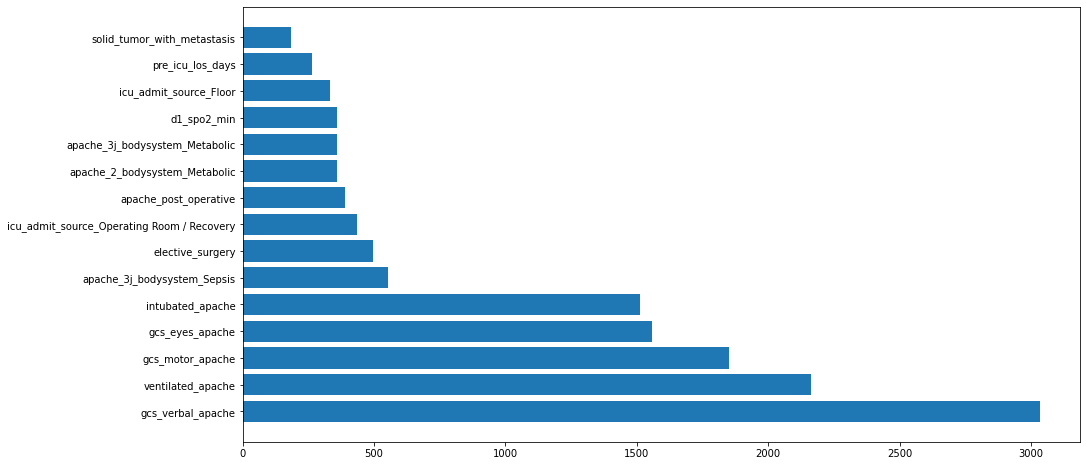

In [1085]:
plt.figure(figsize=(15,8))
plt.barh(df_best_features_chi2.head(15).index, df_best_features_chi2.head(15).values)
# plt.xticks(rotation=90)
plt.show()

In [1086]:
# Using Mutual Information for feature selection
X_train_fs, X_test_fs, fs_mi = select_features_mi(X_train[encoded_categorical_columns], y_train, X_test[encoded_categorical_columns], k=15)

In [1087]:
df_best_features_mi = pd.Series(fs_mi.scores_, index=encoded_categorical_columns, name='score').sort_values(ascending=False)
df_best_features_mi[:15].index

Index(['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache',
       'd1_spo2_min', 'ventilated_apache', 'h1_spo2_min', 'd1_spo2_max',
       'h1_spo2_max', 'intubated_apache', 'ethnicity_Caucasian',
       'icu_admit_source_Operating Room / Recovery', 'elective_surgery',
       'apache_2_bodysystem_Metabolic', 'apache_3j_bodysystem_Metabolic',
       'apache_post_operative'],
      dtype='object')

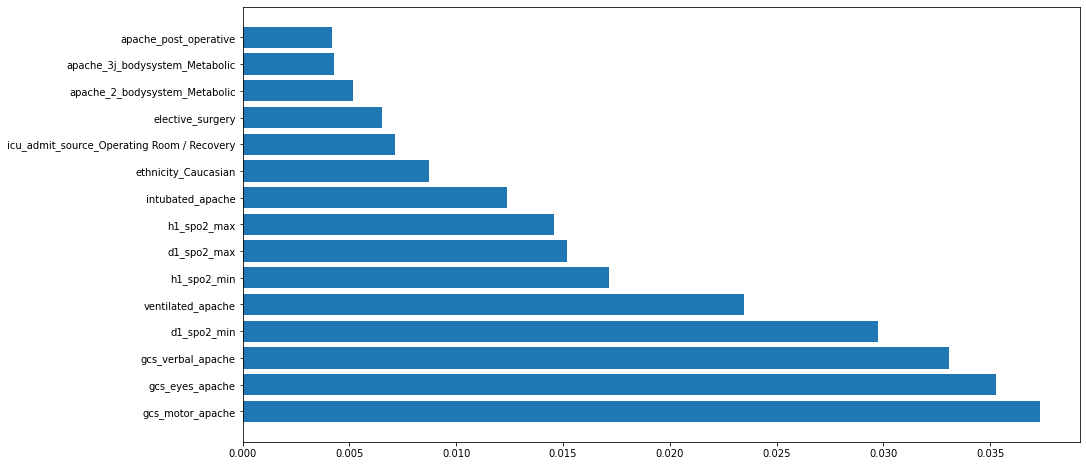

In [1088]:
plt.figure(figsize=(15,8))
plt.barh(df_best_features_mi.head(15).index, df_best_features_mi.head(15).values)
# plt.xticks(rotation=90)
plt.show()

In [1089]:
# Using ANOVA for feature selection from numerical columns

In [1090]:
from sklearn.feature_selection import f_classif

In [1091]:
fs = SelectKBest(score_func=f_classif, k=20)
# apply feature selection

In [1092]:
X_selected = fs.fit_transform(X_train[numerical_columns], y_train)

In [1093]:
best_features_num = pd.Series(fs.scores_, index=numerical_columns).sort_values(ascending=False)
best_features_num.head(20).index


Index(['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
       'd1_temp_min', 'd1_sysbp_min', 'd1_mbp_min', 'd1_diasbp_min',
       'temp_apache', 'd1_heartrate_max', 'h1_sysbp_min', 'h1_mbp_min',
       'h1_diasbp_min', 'h1_resprate_max', 'h1_resprate_min', 'age',
       'd1_potassium_max', 'h1_heartrate_max', 'heart_rate_apache',
       'd1_resprate_max', 'apache_3j_diagnosis', 'apache_2_diagnosis'],
      dtype='object')

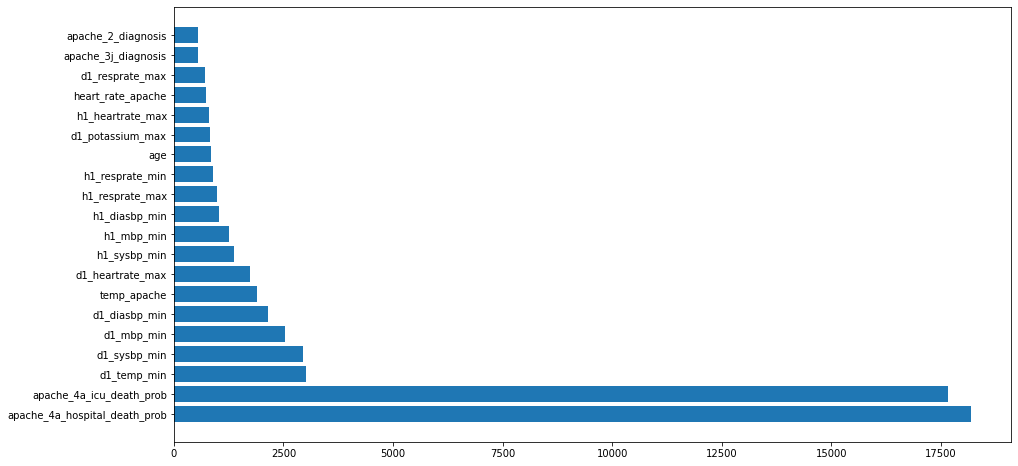

In [1094]:
plt.figure(figsize=(15,8))
plt.barh(best_features_num.head(20).index, best_features_num.head(20).values)
# plt.xticks(rotation=90)
plt.show()

In [1138]:
top_features = ['gcs_motor_apache', 'gcs_verbal_apache', 'gcs_eyes_apache', 'ventilated_apache', 'intubated_apache', 'elective_surgery', 'icu_admit_source_Operating Room / Recovery', 'pre_icu_los_days', 'apache_3j_bodysystem_Metabolic', 'apache_3j_bodysystem_Sepsis', 'apache_post_operative', 'd1_spo2_min', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'd1_heartrate_max', 'd1_mbp_min', 'd1_temp_min', 'd1_sysbp_min', 'd1_diasbp_min', 'temp_apache']

## Model Building <a class="anchor" id="seventh-bullet"></a>

In [1095]:
from sklearn.metrics import fbeta_score, make_scorer

In [1096]:
X_train.shape

(64199, 101)

In [1097]:
def plot_confusion_matrix(cm, norm=False): 
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])
    fmt = '0.2f' if norm else 'd'
    sns.heatmap(conf_matrix, annot = True, fmt = fmt, cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})    
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [1098]:
def plot_roc(fpr, tpr, thresholds, score):
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(score)))
    plt.grid(True)

In [1099]:
def display_model_results(y_true, y_predicted, y_predicted_prob, norm=False):
    accuracy = accuracy_score(y_true, y_predicted)*100
    auc_roc = roc_auc_score(y_true, y_predicted_prob)*100
    # PR AUC - precision recall ROC curve area
    avg_prec_score = average_precision_score(y_true, y_predicted_prob)
    cm = confusion_matrix(y_true, y_predicted)
    cm_norm = cm*100/cm.sum()
    print('ROC AUC: %.4f' % auc_roc)
    print('Accuracy: %.4f %%' % accuracy)
    print(f'Avg Precision Score: {avg_prec_score:.2f}')
    print()
    print(classification_report(y_true, y_predicted))
    if norm:
        plot_confusion_matrix(cm_norm, True)
    else:
        plot_confusion_matrix(cm)
        
    return accuracy, auc_roc, cm[0][1]/(cm[1][1]+cm[1][0])

In [1100]:
# Scaling numerical columns before applying logistic regression
sc = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

sc.fit(X_train[numerical_columns])
X_train_scaled[numerical_columns] = sc.transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = sc.transform(X_test[numerical_columns])

## Logistic Regression

In [1101]:
X_train_scaled.shape, y_train.shape

((64199, 101), (64199,))

In [1102]:
X_test_scaled.shape, y_test.shape

((27514, 101), (27514,))

In [1103]:
classifier = LogisticRegression(random_state=0, max_iter=300)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=300, random_state=0)

In [1104]:
y_train_hat = classifier.predict(X_train_scaled)
y_train_hat_probs = classifier.predict_proba(X_train_scaled)[:,1]

ROC AUC: 87.9386
Accuracy: 92.6681 %
Avg Precision Score: 0.51

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     58637
           1       0.67      0.30      0.41      5562

    accuracy                           0.93     64199
   macro avg       0.80      0.64      0.69     64199
weighted avg       0.91      0.93      0.91     64199



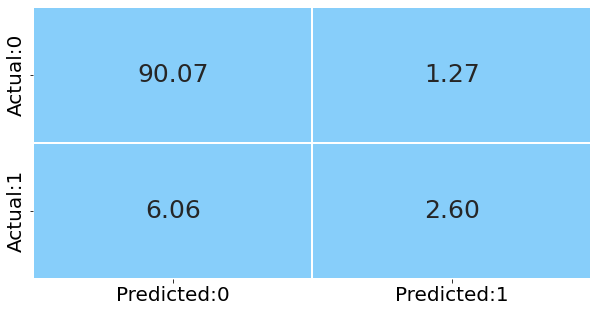

(92.66811009517282, 87.93855481138817, 0.1463502337288745)

In [1105]:
display_model_results(y_train, y_train_hat, y_train_hat_probs, True)

ROC AUC: 87.3996
Accuracy: 92.3493 %
Avg Precision Score: 0.47

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     25161
           1       0.62      0.27      0.38      2353

    accuracy                           0.92     27514
   macro avg       0.78      0.63      0.67     27514
weighted avg       0.91      0.92      0.91     27514



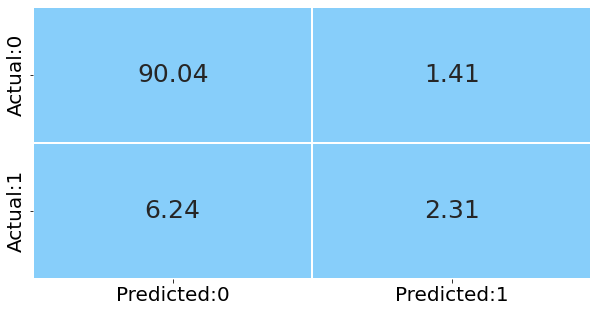

(92.34934942211238, 87.39960299529929, 0.16489587760305993)

In [1106]:
y_test_hat = classifier.predict(X_test_scaled)
y_test_hat_probs = classifier.predict_proba(X_test_scaled)[:,1]
display_model_results(y_test, y_test_hat, y_test_hat_probs, True)

In [1107]:
fbeta_score(y_test, y_test_hat, beta=2)

0.3047144499808355

In [1108]:
# Wrong to Right ratio for class 1
cm = confusion_matrix(y_test, y_test_hat)
cm[0,1]/cm[1,1]

0.610062893081761

### Threshold tuning

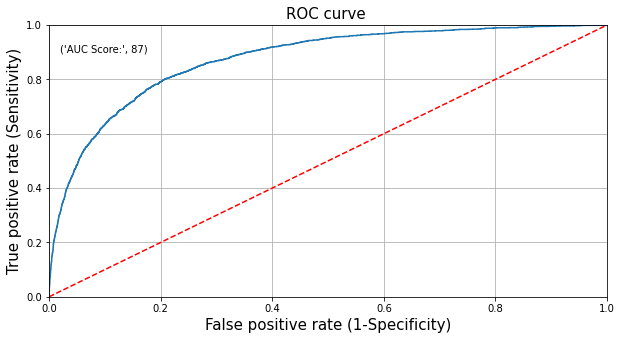

In [1109]:
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
fpr, tpr, thresholds = roc_curve(y_test, y_test_hat_probs)
plot_roc(fpr, tpr, thresholds, test_auc_roc)

In [1110]:
from sklearn.metrics import precision_recall_curve

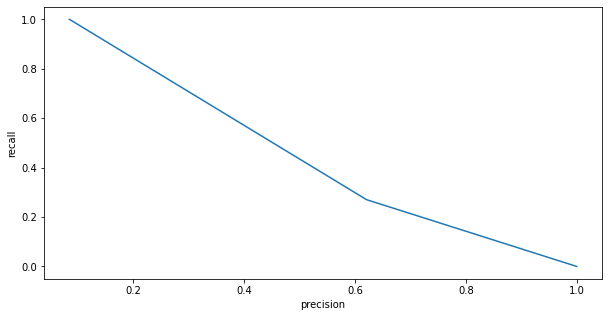

In [1111]:
precision_, recall_, thresholds_ = precision_recall_curve(y_test, y_test_hat)
plt.xlabel('precision')
plt.ylabel('recall')
plt.plot(precision_, recall_)

In [1112]:
from sklearn.metrics import precision_recall_fscore_support

In [1113]:
thesholds = [0.05*i for i in range(1,11)]

accuracies = []
recalls = []
fbetas = []
for thresh in thresholds:
    y_test_hat2 = np.where(y_test_hat_probs>=thresh, 1, 0)
    accuracy = accuracy_score(y_test, y_test_hat2)
    prec, recall, fbeta, support  = precision_recall_fscore_support(y_test, y_test_hat2, beta=2, zero_division=0)
    accuracies.append(accuracy)
    recalls.append(recall[1])
    fbetas.append(fbeta[1])

<AxesSubplot:>

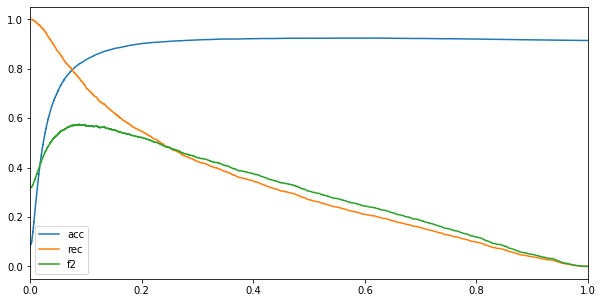

In [1114]:
plt.xlim(0,1)
sns.lineplot(x=thresholds, y=accuracies, label='acc')
sns.lineplot(x=thresholds, y=recalls, label='rec')
sns.lineplot(x=thresholds, y=fbetas, label='f2')
    

In [1115]:
# we are seeing tradeoff between precision and recall. 

In [1116]:
# Youdens index to select cutoff
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
# print the first five observations
youdens_table.head(5)

TPR       FPR  Threshold  Difference
0  0.800680  0.207106   0.074364    0.593574
1  0.797705  0.204245   0.075456    0.593460
2  0.800255  0.206828   0.074435    0.593427
3  0.798130  0.204801   0.075261    0.593329
4  0.802380  0.209093   0.073542    0.593287

In [1117]:
y_test_hat2 = np.where(y_test_hat_probs>=0.1, 1, 0)

In [1120]:
fbeta_score(y_test, y_test_hat2, beta=2)

0.5700466977985325

ROC AUC: 87.3996
Accuracy: 83.5974 %
Avg Precision Score: 0.47

              precision    recall  f1-score   support

           0       0.97      0.85      0.90     25161
           1       0.31      0.73      0.43      2353

    accuracy                           0.84     27514
   macro avg       0.64      0.79      0.67     27514
weighted avg       0.91      0.84      0.86     27514



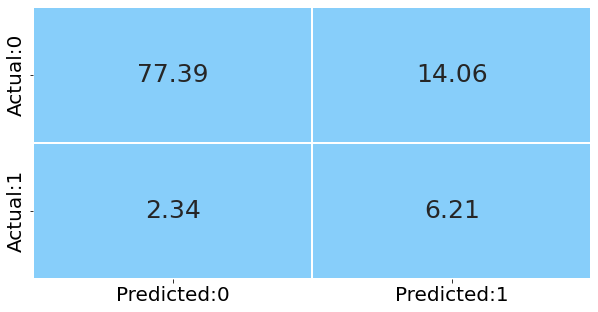

In [1121]:
acc, roc, recall = display_model_results(y_test, y_test_hat2, y_test_hat_probs, True)

In [1122]:
# Although we get better scores using low threshold of 0.1, but it is not suitable as it decreases the confidence in our models prediction power. 
# Hence we evaluate other methods to improve the model

### Cross Validation

In [1123]:
fbeta_score(y_test, y_test_hat, beta=2)

0.3047144499808355

In [1124]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from warnings import filterwarnings
filterwarnings('ignore')

In [1125]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [1126]:
scores = cross_val_score(estimator = LogisticRegression(), 
                         X = X_train_scaled, 
                         y = y_train, 
                         cv = 5, 
                         scoring = ftwo_scorer)

In [1127]:
print(scores)

[0.34385113 0.31459988 0.32509621 0.34200969 0.34118357]


In [1128]:
# We can observe that the model is performing good with all subsets of data

In [1129]:
# Comparing Apache death probability and death probability of our model

In [1130]:
predictions = pd.concat([pd.Series(y_test, name='actual'), pd.Series(y_test_hat_probs, name='predicted_probs'), X_test['apache_4a_hospital_death_prob']], axis=1)

In [1131]:
predictions['actual'].value_counts()

0    25161
1     2353
Name: actual, dtype: int64

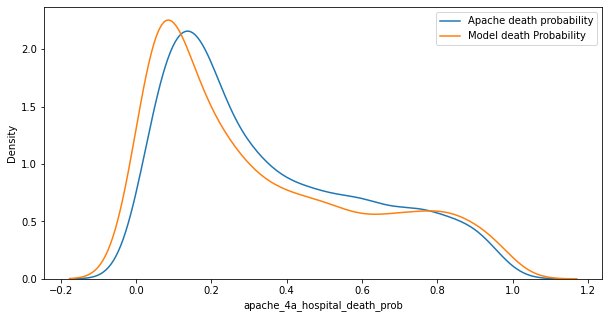

In [1132]:
sns.kdeplot(predictions.loc[predictions['actual']==1, 'apache_4a_hospital_death_prob'], label='Apache death probability')
sns.kdeplot(predictions.loc[predictions['actual']==1, 'predicted_probs'], label = 'Model death Probability')
plt.legend()

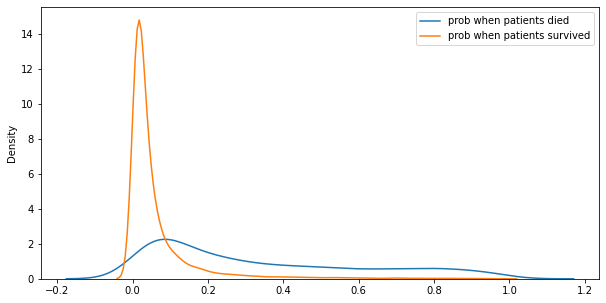

In [1133]:
sns.kdeplot(pd.Series(y_test_hat_probs)[y_test==1], label='prob when patients died')
sns.kdeplot(pd.Series(y_test_hat_probs)[y_test==0], label='prob when patients survived')
plt.legend()

In [1134]:
# Coefficients

In [1135]:
classifier.intercept_

array([-0.72843011])

In [1136]:
coeff = pd.Series(classifier.coef_[0], index=X_train_scaled.columns)
coeff.sort_values(ascending=False)[:20]

ventilated_apache                  0.647073
solid_tumor_with_metastasis        0.620114
icu_admit_source_Other ICU         0.594544
apache_4a_hospital_death_prob      0.535716
icu_admit_source_nan               0.532056
icu_admit_source_Other Hospital    0.530152
apache_3j_diagnosis                0.465828
ethnicity_Native American          0.451410
gcs_unable_apache                  0.425617
cirrhosis                          0.392500
hepatic_failure                    0.375385
ethnicity_nan                      0.359330
d1_heartrate_max                   0.313217
immunosuppression                  0.296223
age                                0.295528
arf_apache                         0.258863
icu_type_Neuro ICU                 0.252353
lymphoma                           0.246452
ethnicity_Hispanic                 0.223944
pre_icu_los_days                   0.194318
dtype: float64

In [1137]:
coeff.sort_values(ascending=False)[:-20:-1]

apache_2_bodysystem_Undefined diagnoses      -0.892355
d1_spo2_max                                  -0.880615
apache_post_operative                        -0.873940
apache_2_bodysystem_Metabolic                -0.817368
apache_3j_bodysystem_Metabolic               -0.817368
apache_3j_bodysystem_Gynecological           -0.630115
elective_surgery                             -0.605540
apache_2_bodysystem_Renal/Genitourinary      -0.577681
d1_spo2_min                                  -0.547143
icu_admit_source_Operating Room / Recovery   -0.353843
apache_3j_bodysystem_Sepsis                  -0.327311
icu_stay_type_readmit                        -0.302870
icu_stay_type_transfer                       -0.221809
diabetes_mellitus                            -0.214460
apache_3j_bodysystem_Genitourinary           -0.211371
intubated_apache                             -0.173722
apache_2_bodysystem_Trauma                   -0.173496
apache_3j_bodysystem_Trauma                  -0.173496
d1_mbp_min

## PCA for Dimention reduction

In [1187]:
from sklearn.decomposition import PCA

In [1188]:
len(numerical_columns)

38

In [1189]:
n_pca = 20
pca = PCA(n_components=n_pca)

In [1190]:
pca_train = pca.fit_transform(X_train_scaled[numerical_columns])
pca_test = pca.transform(X_test_scaled[numerical_columns])

In [1191]:
pca.explained_variance_ratio_.sum()

0.9086594616549332

In [1192]:
pca_train_df = pd.DataFrame(data = pca_train, columns = ['PC'+str(i) for i in range(1, n_pca+1)])
pca_test_df = pd.DataFrame(data = pca_test, columns = ['PC'+str(i) for i in range(1, n_pca+1)])

In [1193]:
X_train_pca = pd.concat([pca_train_df, X_train[encoded_categorical_columns]], axis = 1)
X_test_pca = pd.concat([pca_test_df, X_test[encoded_categorical_columns]], axis = 1)

In [1194]:
model = LogisticRegression(random_state = 100, max_iter=200)

In [1195]:
model.fit(X_train_pca, y_train)

LogisticRegression(max_iter=200, random_state=100)

In [1196]:
y_test_pred = model.predict(X_test_pca)
y_test_pred_prob = model.predict_proba(X_test_pca)[:,1]

ROC AUC: 87.2696
Accuracy: 92.3748 %
Avg Precision Score: 0.47

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     25161
           1       0.63      0.27      0.38      2353

    accuracy                           0.92     27514
   macro avg       0.78      0.63      0.67     27514
weighted avg       0.91      0.92      0.91     27514



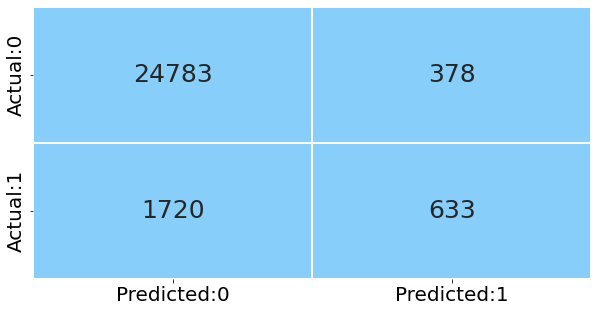

(92.37479101548303, 87.26960296641603, 0.16064598385040374)

In [1197]:
display_model_results(y_test, y_test_pred, y_test_pred_prob)

## AutoML

## Model with top features

In [1139]:
classifier2 = LogisticRegression(random_state=0)
classifier2.fit(X_train_scaled[top_features], y_train)

LogisticRegression(random_state=0)

ROC AUC: 86.3889
Accuracy: 92.1931 %
Avg Precision Score: 0.45

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     25161
           1       0.60      0.26      0.36      2353

    accuracy                           0.92     27514
   macro avg       0.77      0.62      0.66     27514
weighted avg       0.91      0.92      0.91     27514



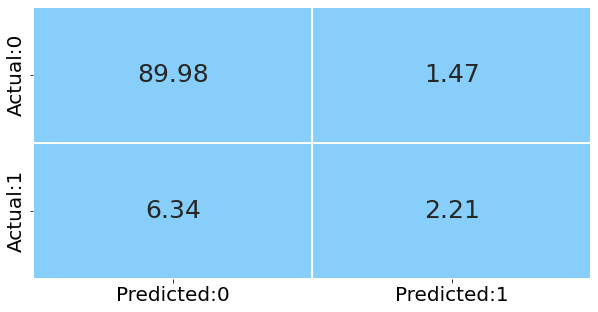

(92.19306534854982, 86.38885255959693, 0.17169570760730982)

In [1140]:
y_test_hat2 = classifier2.predict(X_test_scaled[top_features])
y_test_hat_probs2 = classifier2.predict_proba(X_test_scaled[top_features])[:,1]
display_model_results(y_test, y_test_hat2, y_test_hat_probs2, True)

In [1141]:
# Wrong to Right ratio for class 1
cm = confusion_matrix(y_test, y_test_hat2)
cm[0,1]/cm[1,1]

0.6633825944170771

In [1142]:
fbeta_score(y_test, y_test_hat2, beta=2)

0.29208633093525177

## Decision Tree

In [1143]:
model_dt = DecisionTreeClassifier(max_depth=20, random_state = 100)

In [1144]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=100)

In [1145]:
y_train_hat = model_dt.predict(X_train)
y_train_hat_probs = model_dt.predict_proba(X_train)[:,1]

ROC AUC: 97.9007
Accuracy: 98.2227 %
Avg Precision Score: 0.92

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58637
           1       0.99      0.81      0.89      5562

    accuracy                           0.98     64199
   macro avg       0.98      0.90      0.94     64199
weighted avg       0.98      0.98      0.98     64199



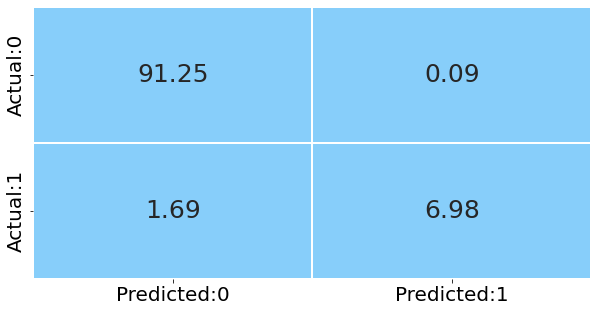

(98.22271374943536, 97.90073967665455, 0.010248112189859764)

In [1146]:
display_model_results(y_train, y_train_hat, y_train_hat_probs, True)

ROC AUC: 65.5616
Accuracy: 89.8815 %
Avg Precision Score: 0.24

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     25161
           1       0.39      0.33      0.36      2353

    accuracy                           0.90     27514
   macro avg       0.67      0.64      0.65     27514
weighted avg       0.89      0.90      0.90     27514



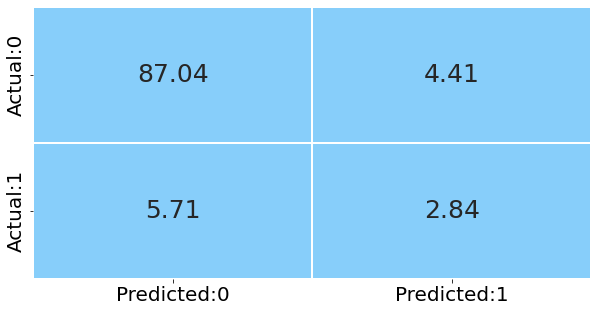

(89.88151486515955, 65.56160645882505, 0.5155121121971951)

In [1147]:
y_test_hat = model_dt.predict(X_test)
y_test_hat_probs = model_dt.predict_proba(X_test)[:,1]
display_model_results(y_test, y_test_hat, y_test_hat_probs, True)

In [1148]:
fbeta_score(y_test, y_test_hat, beta=2)

0.3427719821162445

In [1149]:
pd.Series(model_dt.feature_importances_, index=X_test.columns).sort_values(ascending=False)[:20]

apache_4a_icu_death_prob         0.206968
apache_4a_hospital_death_prob    0.087061
d1_heartrate_min                 0.042237
d1_mbp_min                       0.028466
d1_sysbp_min                     0.025949
d1_glucose_min                   0.022952
d1_temp_max                      0.022676
d1_temp_min                      0.021302
d1_glucose_max                   0.020830
age                              0.020207
d1_heartrate_max                 0.018289
d1_diasbp_max                    0.018247
d1_mbp_max                       0.018201
height                           0.017849
d1_sysbp_max                     0.017737
d1_resprate_min                  0.017441
d1_spo2_min                      0.017343
weight                           0.017197
h1_resprate_min                  0.016471
d1_potassium_min                 0.016332
dtype: float64

## Random Forest

In [1150]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [1151]:
model_rf = RandomForestClassifier(max_depth=20, random_state = 100)

In [1152]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=100)

In [1153]:
y_train_hat = model_rf.predict(X_train)
y_train_hat_probs = model_rf.predict_proba(X_train)[:,1]

ROC AUC: 99.9765
Accuracy: 98.4532 %
Avg Precision Score: 1.00

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58637
           1       1.00      0.82      0.90      5562

    accuracy                           0.98     64199
   macro avg       0.99      0.91      0.95     64199
weighted avg       0.98      0.98      0.98     64199



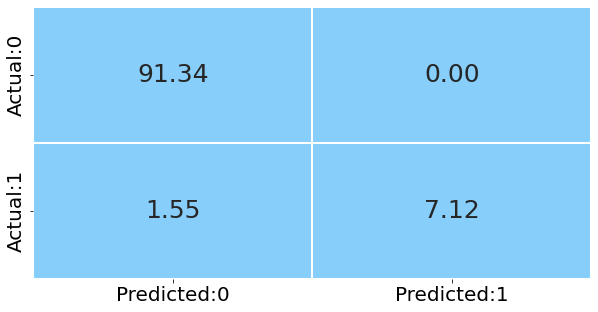

(98.45324693531052, 99.97648241963977, 0.0)

In [1154]:
display_model_results(y_train, y_train_hat, y_train_hat_probs, True)

ROC AUC: 88.0636
Accuracy: 92.5783 %
Avg Precision Score: 0.49

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25161
           1       0.68      0.25      0.37      2353

    accuracy                           0.93     27514
   macro avg       0.80      0.62      0.67     27514
weighted avg       0.91      0.93      0.91     27514



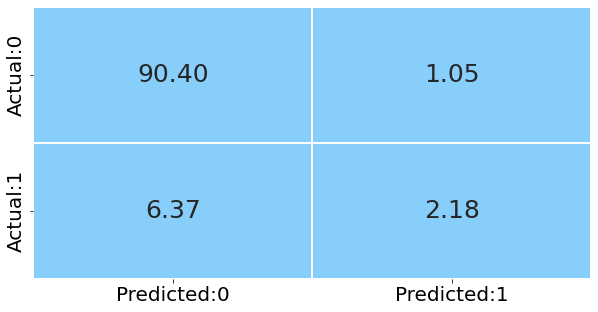

(92.5783237624482, 88.06357689712421, 0.12239694007649808)

In [1155]:
y_test_hat = model_rf.predict(X_test)
y_test_hat_probs = model_rf.predict_proba(X_test)[:,1]
display_model_results(y_test, y_test_hat, y_test_hat_probs, True)

In [1156]:
fbeta_score(y_test, y_test_hat, beta=2)

0.29080493251772016

In [1157]:
pd.Series(model_rf.feature_importances_, index=X_test.columns).sort_values(ascending=False)[:20]

apache_4a_icu_death_prob         0.084095
apache_4a_hospital_death_prob    0.071643
d1_sysbp_min                     0.030252
d1_heartrate_min                 0.029172
d1_mbp_min                       0.026218
d1_temp_min                      0.025360
temp_apache                      0.025154
d1_temp_max                      0.023133
gcs_motor_apache                 0.021728
d1_diasbp_min                    0.020538
d1_glucose_min                   0.020536
map_apache                       0.020520
age                              0.020279
d1_heartrate_max                 0.019619
apache_3j_diagnosis              0.019570
bmi                              0.019391
heart_rate_apache                0.019361
d1_glucose_max                   0.018910
d1_sysbp_max                     0.018898
weight                           0.018750
dtype: float64

## XGBoost

In [1158]:
from xgboost import XGBClassifier

In [1159]:
xgb_model = XGBClassifier( use_label_encoder=False, scale_pos_weight=10)
xgb_model.fit(X_train, y_train, eval_metric=ftwo_scorer)

[14:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [1163]:
y_test_hat = xgb_model.predict(X_test)
y_test_hat_probs = xgb_model.predict_proba(X_test)[:,1]

ROC AUC: 86.6068
Accuracy: 87.2065 %
Avg Precision Score: 0.48

              precision    recall  f1-score   support

           0       0.96      0.89      0.93     25161
           1       0.36      0.63      0.46      2353

    accuracy                           0.87     27514
   macro avg       0.66      0.76      0.69     27514
weighted avg       0.91      0.87      0.89     27514



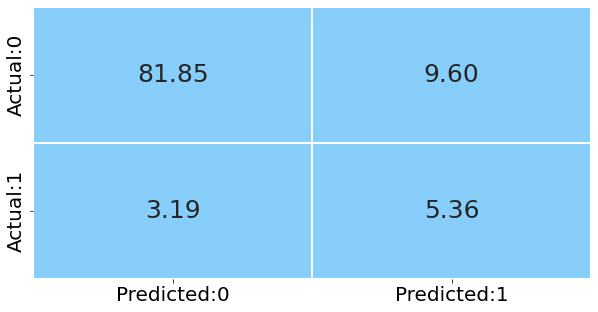

(87.20651304790289, 86.60680128599105, 1.1228219294517636)

In [1164]:
display_model_results(y_test, y_test_hat, y_test_hat_probs, True)

In [1165]:
fbeta_score(y_test, y_test_hat, beta=2)

0.5451252864217606

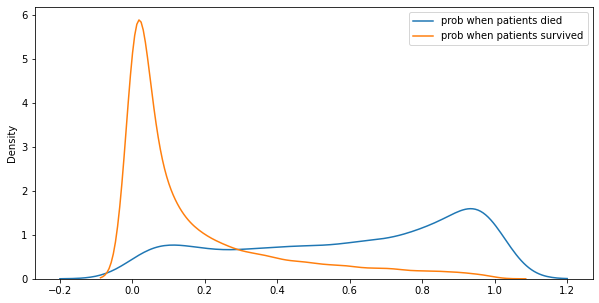

In [1166]:
sns.kdeplot(pd.Series(y_test_hat_probs)[y_test==1], label='prob when patients died')
sns.kdeplot(pd.Series(y_test_hat_probs)[y_test==0], label='prob when patients survived')
plt.legend()

In [1167]:
pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False).iloc[:20]

apache_4a_hospital_death_prob         0.148294
d1_spo2_min                           0.033576
ventilated_apache                     0.024448
apache_4a_icu_death_prob              0.021878
elective_surgery                      0.021218
apache_3j_bodysystem_Neurological     0.017655
hepatic_failure                       0.016567
apache_3j_bodysystem_Metabolic        0.016318
d1_sysbp_min                          0.016289
icu_admit_source_Other Hospital       0.014709
gender                                0.013769
solid_tumor_with_metastasis           0.012925
icu_type_CSICU                        0.012823
d1_heartrate_min                      0.012649
apache_3j_bodysystem_Genitourinary    0.012609
d1_mbp_min                            0.012385
lymphoma                              0.012223
d1_resprate_max                       0.012142
h1_resprate_min                       0.011494
arf_apache                            0.011372
dtype: float32

## Hybridization: SMOTE + TOMEK LINKS
### for Target since target is imbalanced  

SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links.
Reference:

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In [724]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [725]:
# SMOTE + TOMEK for train data
counter = Counter(y_train)
print('Before SMOTE : ', counter)

smt = SMOTETomek(random_state=100)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_smt)
print('After SMOTE : ', counter)

Before SMOTE :  Counter({0: 58637, 1: 5562})
After SMOTE :  Counter({0: 58623, 1: 58623})


In [726]:
print('data shape before smote')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

data shape before smote
(64199, 101) (27514, 101) (64199,) (27514,)


In [729]:
print('data shape after smote')
print(X_train_smt.shape, X_test.shape, y_train_smt.shape, y_test.shape)

data shape after smote
(117246, 101) (27514, 101) (117246,) (27514,)


# Logistic regression SMOTE variables

In [748]:
model_rfs = LogisticRegression(random_state = 100)
model_rfs.fit(X_train_smt[top_features], y_train_smt)

LogisticRegression(random_state=100)

In [752]:
y_test_hat = model_rfs.predict(X_test[top_features])
y_test_hat_probs = model_rfs.predict_proba(X_test[top_features])[:,1]

In [753]:
fbeta_score(y_test, y_test_hat, beta=2)

0.5434509606932062

ROC AUC: 85.1138
Accuracy: 80.3555 %
Avg Precision Score: 0.42

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     25161
           1       0.27      0.74      0.39      2353

    accuracy                           0.80     27514
   macro avg       0.62      0.77      0.64     27514
weighted avg       0.91      0.80      0.84     27514



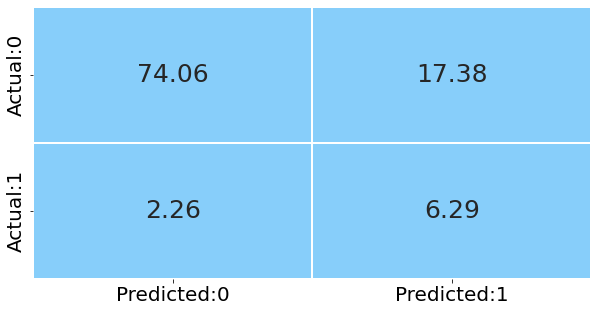

(80.35545540452134, 85.11383713956494, 2.0327241818954525)

In [754]:
display_model_results(y_test, y_test_hat, y_test_hat_probs, True)

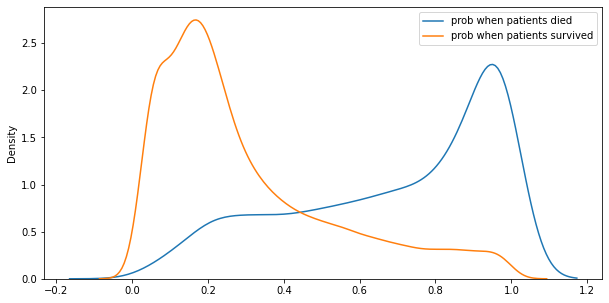

In [755]:
sns.kdeplot(pd.Series(y_test_hat_probs)[y_test==1], label='prob when patients died')
sns.kdeplot(pd.Series(y_test_hat_probs)[y_test==0], label='prob when patients survived')
plt.legend()

## HyperParameter Tuning

In [738]:
from sklearn.model_selection import GridSearchCV, GroupKFold

In [778]:
tuned_paramaters = [{'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                     'C': [100, 10, 1.0, 0.1, 0.01],
                     'class_weight': ['balanced', None],
                     'max_iter': [200]}]
 
log_reg = LogisticRegression(random_state = 10)

logreg_grid = GridSearchCV(estimator = log_reg, 
                       param_grid = tuned_paramaters, 
                       scoring=ftwo_scorer,
                       cv = 5)

In [779]:
# use fit() to fit the model on the train set
logreg_grid_model = logreg_grid.fit(X_train_scaled[top_features], y_train)

In [780]:
# get the best parameters
print('Best parameters for Logistic Regression classifier: ', logreg_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'} 



In [348]:
# Save the model and reload

In [784]:
from joblib import dump, load

In [785]:
dump(logreg_grid_model, 'logreg_grid_model.joblib') 

['logreg_grid_model.joblib']

In [786]:
logreg_grid_model2 = load('logreg_grid_model.joblib')

In [790]:
res = logreg_grid_model.cv_results_

In [796]:
ranks = pd.Series(res['rank_test_score'])

In [797]:
params = pd.Series(res['params'])

In [800]:
scores0 = pd.Series(res['split0_test_score'])

In [801]:
scores_mean = pd.Series(res['mean_test_score'])

In [814]:
params_exp = params.apply(pd.Series)

In [825]:
res_comb = pd.concat([ranks, scores_mean, scores0, params, params_exp], axis=1)
res_comb.columns = ['ranks', 'scores_mean', 'scores0', 'params'] + params_exp.columns.tolist()

In [866]:
indexes_ranked = res_comb.sort_values(by=['ranks']).index
res_comb.sort_values(by=['ranks'])[:20]

ranks  scores_mean   scores0  \
131      1     0.558281  0.568420   
133      2     0.557422  0.565410   
134      2     0.557422  0.565410   
132      4     0.557407  0.565410   
135      5     0.557224  0.564796   
103      6     0.556240  0.561751   
100      6     0.556240  0.561751   
102      8     0.556224  0.561751   
101      9     0.556224  0.561674   
67      10     0.556209  0.561976   
76      11     0.556194  0.561898   
140     11     0.556194  0.561898   
12      11     0.556194  0.561898   
108     11     0.556194  0.561898   
36      11     0.556194  0.561898   
44      11     0.556194  0.561898   
4       11     0.556194  0.561898   
35      18     0.556179  0.561898   
142     19     0.556178  0.561898   
110     19     0.556178  0.561898   

                                                params       C class_weight  \
131  {'C': 0.01, 'class_weight': 'balanced', 'max_i...    0.01     balanced   
133  {'C': 0.01, 'class_weight': 'balanced', 'max_i...    0.01     balanced   
134  {'C': 0.01, 'class_weight': 'balanced', 'max_i...    0.01     balanced   
132  {'C': 0.01, 'class_weight': 'balanced', 'max_i...    0.01     balanced   
135  {'C': 0.01, 'class_weight': 'balanced', 'max_i...    0.01     balanced   
103  {'C': 0.1, 'class_weight': 'balanced', 'max_it...    0.10     balanced   
100  {'C': 0.1, 'class_weight': 'balanced', 'max_it...    0.10     balanced   
102  {'C': 0.1, 'class_weight': 'balanced', 'max_it...    0.10     balanced   
101  {'C': 0.1, 'class_weight': 'balanced', 'max_it...    0.10     balanced   
67   {'C': 1.0, 'class_weight': 'balanced', 'max_it...    1.00     balanced   
76   {'C': 1.0, 'class_weight': 'balanced', 'max_it...    1.00     balanced   
140  {'C': 0.01, 'class_weight': 'balanced', 'max_i...    0.01     balanced   
12   {'C': 100, 'class_weight': 'balanced', 'max_it...  100.00     balanced   
108  {'C': 0.1, 'class_weight': 'balanced', 'max_it...    0.10     balanced   
36   {'C': 10, 'class_weight': 'balanced', 'max_ite...   10.00     balanced   
44   {'C': 10, 'class_weight': 'balanced', 'max_ite...   10.00     balanced   
4    {'C': 100, 'class_weight': 'balanced', 'max_it...  100.00     balanced   
35   {'C': 10, 'class_weight': 'balanced', 'max_ite...   10.00     balanced   
142  {'C': 0.01, 'class_weight': 'balanced', 'max_i...    0.01     balanced   
110  {'C': 0.1, 'class_weight': 'balanced', 'max_it...    0.10     balanced   

     max_iter penalty     solver  
131       200      l1       saga  
133       200      l2      lbfgs  
134       200      l2        sag  
132       200      l2  newton-cg  
135       200      l2       saga  
103       200      l2       saga  
100       200      l2  newton-cg  
102       200      l2        sag  
101       200      l2      lbfgs  
67        200      l1       saga  
76        200    none  newton-cg  
140       200    none  newton-cg  
12        200    none  newton-cg  
108       200    none  newton-cg  
36        200      l2  newton-cg  
44        200    none  newton-cg  
4         200      l2  newton-cg  
35        200      l1       saga  
142       200    none        sag  
110       200    none        sag

In [875]:
def try_params_logistic(params):
    params2 = {'random_state': 100}
    params2.update(params)
    print('parameters:', params2)
    model_temp = LogisticRegression(**params2)
    model_temp.fit(X_train_scaled[top_features], y_train)
    y_test_hat = model_temp.predict(X_test_scaled[top_features])
    y_test_hat_probs = model_temp.predict_proba(X_test_scaled[top_features])[:,1]
    print('f2 score:', fbeta_score(y_test, y_test_hat, beta=2))
    display_model_results(y_test, y_test_hat, y_test_hat_probs, True)
    print(pd.Series(model_temp.coef_[0], index=top_features).sort_values())

parameters: {'random_state': 100, 'C': 0.1, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
f2 score: 0.5597692207960585
ROC AUC: 86.2505
Accuracy: 82.1436 %
Avg Precision Score: 0.44

              precision    recall  f1-score   support

           0       0.97      0.83      0.89     25161
           1       0.29      0.73      0.41      2353

    accuracy                           0.82     27514
   macro avg       0.63      0.78      0.65     27514
weighted avg       0.91      0.82      0.85     27514



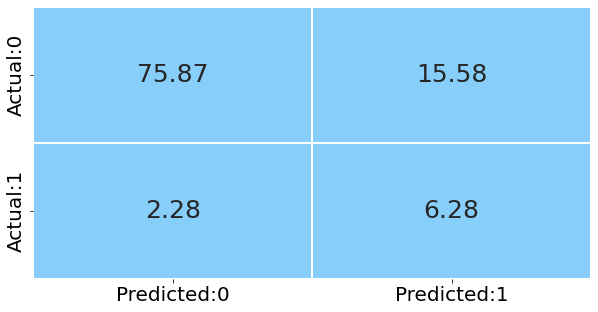

apache_3j_bodysystem_Metabolic               -1.236364
elective_surgery                             -0.594137
d1_spo2_min                                  -0.549281
apache_4a_icu_death_prob                     -0.417105
icu_admit_source_Operating Room / Recovery   -0.298187
d1_temp_min                                  -0.162441
intubated_apache                             -0.156733
d1_mbp_min                                   -0.135220
d1_sysbp_min                                 -0.132525
d1_diasbp_min                                -0.094286
apache_post_operative                        -0.069480
gcs_eyes_apache                              -0.063585
temp_apache                                  -0.040963
gcs_motor_apache                             -0.031077
gcs_verbal_apache                            -0.004204
pre_icu_los_days                              0.107563
d1_heartrate_max                              0.237320
apache_3j_bodysystem_Sepsis                   0.260056
ventilated

In [876]:
try_params_logistic(res_comb.loc[indexes_ranked[0], 'params'])

### Hyperparameter tuning for decision tree

In [873]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [1222]:
tuned_paramaters = [{'criterion' : ["gini", "entropy"],
                     'max_depth': [5, 7, 9, 12],
                     'min_samples_split': [2,5,10,20],
                     'min_samples_leaf': [5,10,20,30],
                     'class_weight': ['balanced', None]}]

dt_est = DecisionTreeClassifier(random_state = 10)

dt_grid = GridSearchCV(estimator = dt_est, 
                       param_grid = tuned_paramaters, 
                       scoring=ftwo_scorer,
                       cv = 5)

In [1223]:
# use fit() to fit the model on the train set
dt_grid_model = dt_grid.fit(X_train[top_features], y_train)

In [1224]:
# get the best parameters
print('Best parameters for random forest classifier: ', dt_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 30, 'min_samples_split': 2} 



In [1225]:
# Save the model and reload

In [1226]:
from joblib import dump, load

In [1227]:
dump(dt_grid_model, 'dt_grid_model1.joblib') 

['dt_grid_model1.joblib']

In [1228]:
res = dt_grid_model.cv_results_
ranks = pd.Series(res['rank_test_score'])
params = pd.Series(res['params'])
scores0 = pd.Series(res['split0_test_score'])
scores_mean = pd.Series(res['mean_test_score'])
params_exp = params.apply(pd.Series)

In [1229]:
res_comb = pd.concat([ranks, scores_mean, scores0, params, params_exp], axis=1)
res_comb.columns = ['ranks', 'scores_mean', 'scores0', 'params'] + params_exp.columns.tolist()

In [1230]:
res_comb.sort_values(by=['ranks'])[:3]

ranks  scores_mean   scores0  \
95      1     0.552147  0.550314   
93      1     0.552147  0.550314   
92      1     0.552147  0.550314   

                                               params class_weight criterion  \
95  {'class_weight': 'balanced', 'criterion': 'ent...     balanced   entropy   
93  {'class_weight': 'balanced', 'criterion': 'ent...     balanced   entropy   
92  {'class_weight': 'balanced', 'criterion': 'ent...     balanced   entropy   

    max_depth  min_samples_leaf  min_samples_split  
95          7                30                 20  
93          7                30                  5  
92          7                30                  2

In [1231]:
indexes_ranked = res_comb.sort_values(by=['ranks'])[:20].index

In [1232]:
def try_params_decisiontree2(params):
    params2 = {'random_state': 100}
    params2.update(params)
    model_temp = DecisionTreeClassifier(**params2)
    model_temp.fit(X_train[top_features], y_train)
    y_test_hat = model_temp.predict(X_test[top_features])
    y_test_hat_probs = model_temp.predict_proba(X_test[top_features])[:,1]
    f2score = fbeta_score(y_test, y_test_hat, beta=2)
    auc_roc = roc_auc_score(y_test, y_test_hat)*100
    avg_prec_score = average_precision_score(y_test, y_test_hat_probs)
    rep = classification_report(y_test, y_test_hat, output_dict=True)
    prec = rep['1']['precision']
    recall = rep['1']['recall']
    f1score = rep['1']['f1-score']
    accuracy = rep['accuracy']
    return pd.Series([f2score, auc_roc, accuracy, prec, recall, f1score])

In [1233]:
results_ = res_comb['params'].apply(try_params_decisiontree2)

In [1234]:
results_.columns = ['f2score', 'auc_roc', 'accuracy', 'prec', 'recall', 'f1score']
results_comb2 = pd.concat([res_comb, results_], axis=1)

In [1235]:
results_comb2.sort_values('ranks')[:10]

ranks  scores_mean   scores0  \
95      1     0.552147  0.550314   
93      1     0.552147  0.550314   
92      1     0.552147  0.550314   
94      1     0.552147  0.550314   
91      5     0.550820  0.549666   
90      5     0.550820  0.549666   
89      5     0.550820  0.549666   
88      5     0.550820  0.549666   
0       9     0.550255  0.555059   
1       9     0.550255  0.555059   

                                               params class_weight criterion  \
95  {'class_weight': 'balanced', 'criterion': 'ent...     balanced   entropy   
93  {'class_weight': 'balanced', 'criterion': 'ent...     balanced   entropy   
92  {'class_weight': 'balanced', 'criterion': 'ent...     balanced   entropy   
94  {'class_weight': 'balanced', 'criterion': 'ent...     balanced   entropy   
91  {'class_weight': 'balanced', 'criterion': 'ent...     balanced   entropy   
90  {'class_weight': 'balanced', 'criterion': 'ent...     balanced   entropy   
89  {'class_weight': 'balanced', 'criterion': 'ent...     balanced   entropy   
88  {'class_weight': 'balanced', 'criterion': 'ent...     balanced   entropy   
0   {'class_weight': 'balanced', 'criterion': 'gin...     balanced      gini   
1   {'class_weight': 'balanced', 'criterion': 'gin...     balanced      gini   

    max_depth  min_samples_leaf  min_samples_split   f2score    auc_roc  \
95          7                30                 20  0.553441  78.229727   
93          7                30                  5  0.553441  78.229727   
92          7                30                  2  0.553441  78.229727   
94          7                30                 10  0.553441  78.229727   
91          7                20                 20  0.553855  78.285685   
90          7                20                 10  0.553855  78.285685   
89          7                20                  5  0.553855  78.285685   
88          7                20                  2  0.553855  78.285685   
0           5                 5                  2  0.544201  77.744872   
1           5                 5                  5  0.544201  77.744872   

    accuracy      prec    recall   f1score  
95  0.795595  0.262178  0.766256  0.390683  
93  0.795595  0.262178  0.766256  0.390683  
92  0.795595  0.262178  0.766256  0.390683  
94  0.795595  0.262178  0.766256  0.390683  
91  0.794505  0.261454  0.768806  0.390207  
90  0.794505  0.261454  0.768806  0.390207  
89  0.794505  0.261454  0.768806  0.390207  
88  0.794505  0.261454  0.768806  0.390207  
0   0.782147  0.249691  0.771781  0.377311  
1   0.782147  0.249691  0.771781  0.377311

f2 score: 0.5534409724353859
ROC AUC: 86.0915
Accuracy: 79.5595 %
Avg Precision Score: 0.44

              precision    recall  f1-score   support

           0       0.97      0.80      0.88     25161
           1       0.26      0.77      0.39      2353

    accuracy                           0.80     27514
   macro avg       0.62      0.78      0.63     27514
weighted avg       0.91      0.80      0.84     27514



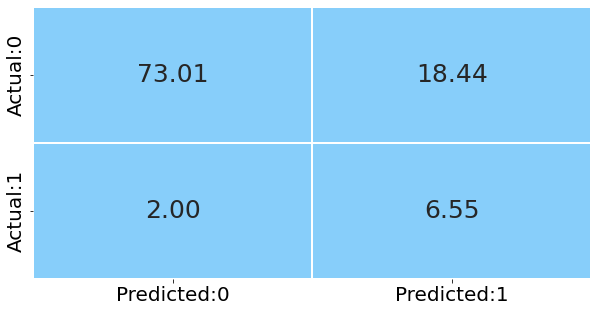

(79.55949698335392, 86.09152721581388, 2.1563960900977475)

In [1236]:
# Model builing with tuned parameters
model_dt_tuned = DecisionTreeClassifier(random_state=100, **dt_grid_model.best_params_)
model_dt_tuned.fit(X_train[top_features], y_train)
y_test_hat = model_dt_tuned.predict(X_test[top_features])
y_test_hat_probs = model_dt_tuned.predict_proba(X_test[top_features])[:,1]
print('f2 score:', fbeta_score(y_test, y_test_hat, beta=2))
display_model_results(y_test, y_test_hat, y_test_hat_probs, True)

In [1237]:
from sklearn.tree import plot_tree

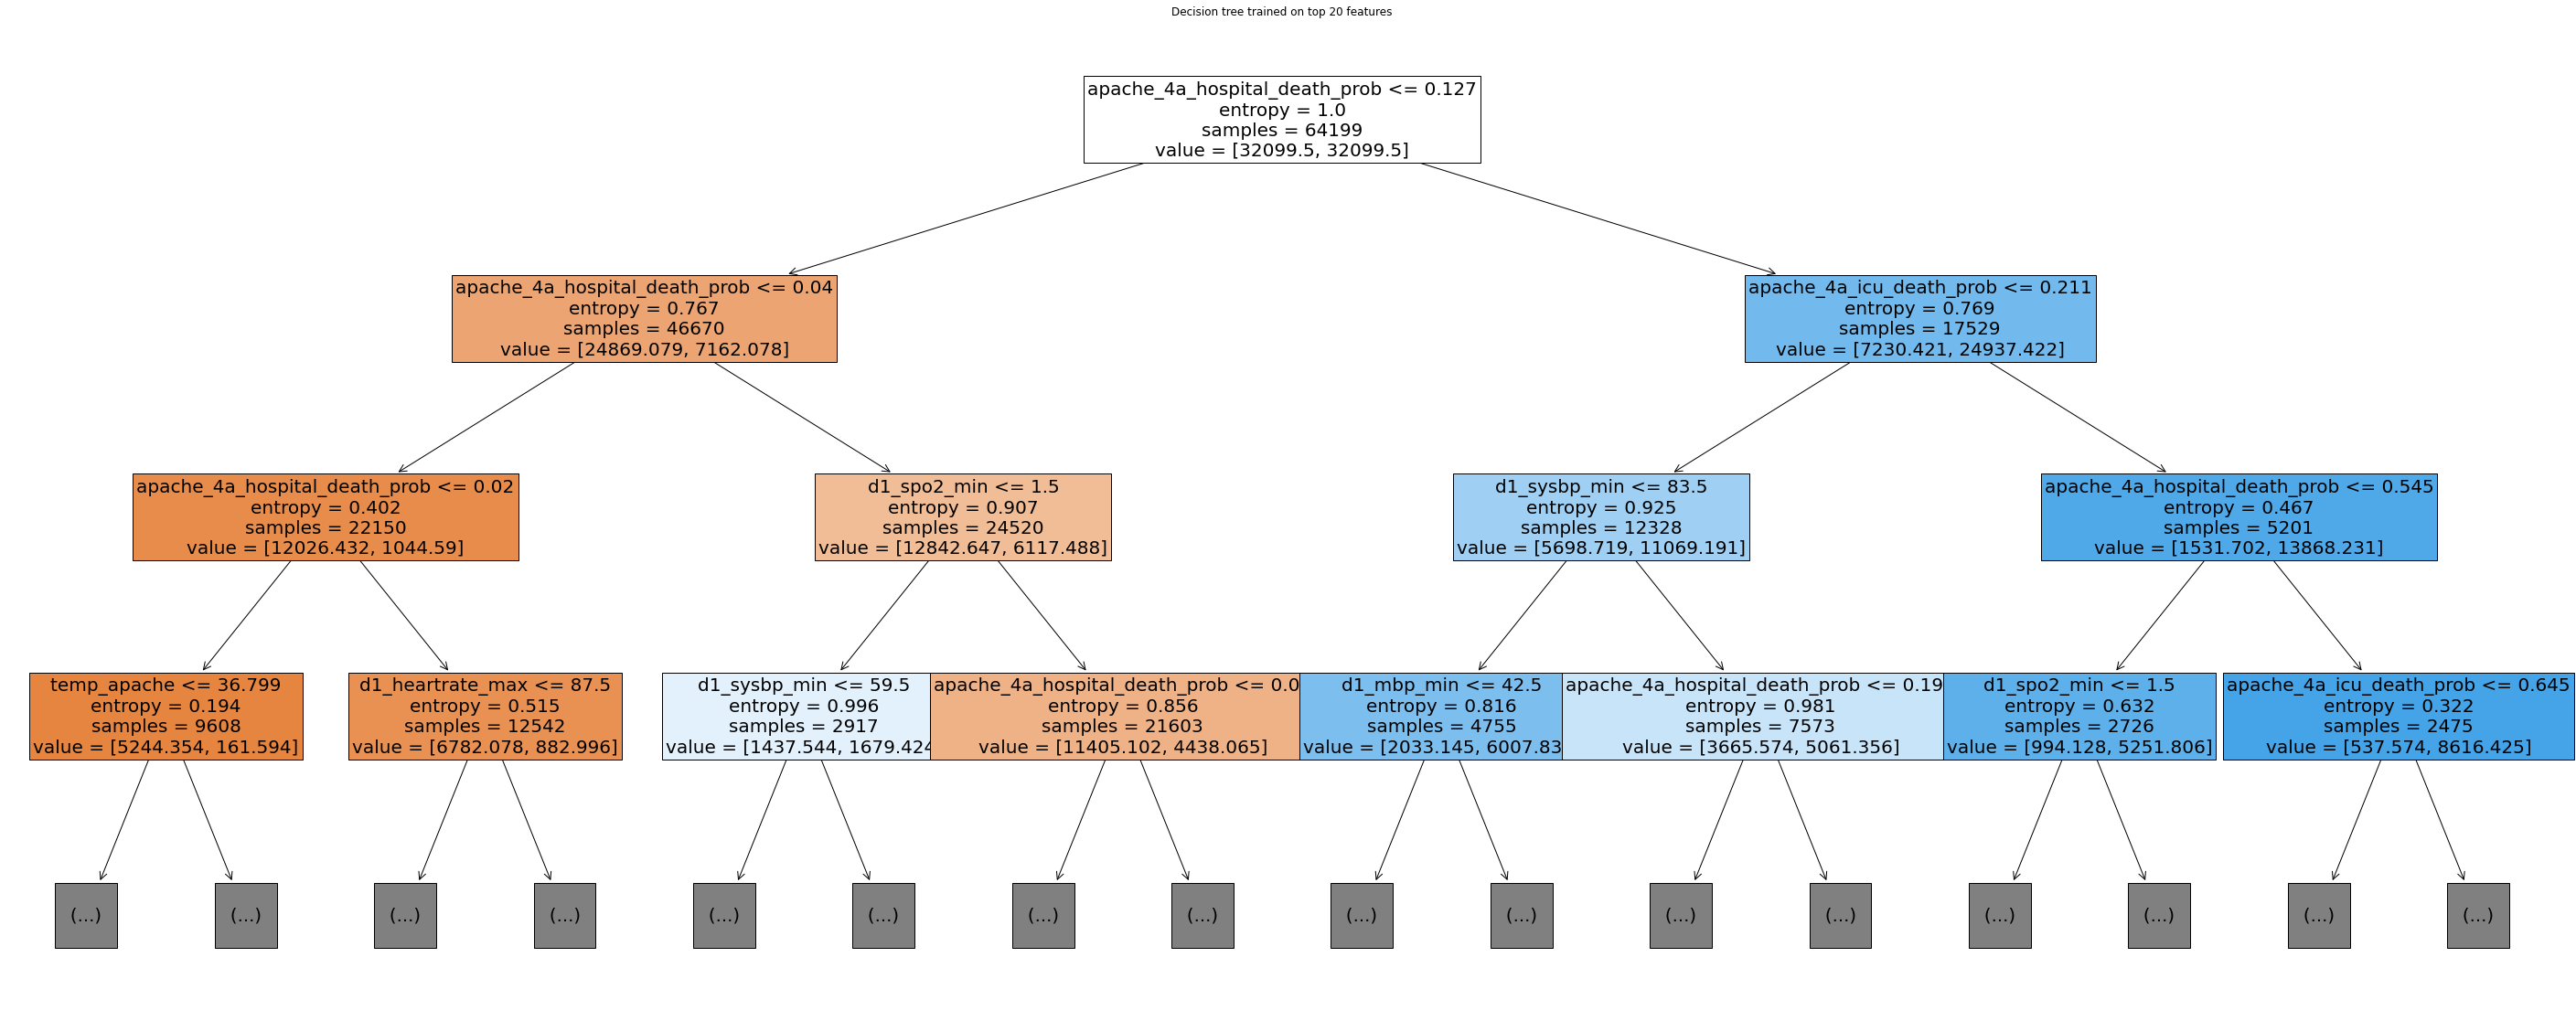

In [1238]:
plt.figure(figsize=(50,20))
plot_tree(model_dt_tuned, filled=True, max_depth=3, feature_names=top_features, fontsize=20)
plt.title("Decision tree trained on top 20 features")
plt.show()

In [1239]:
important_features = pd.Series(model_dt_tuned.feature_importances_, index=model_dt_tuned.feature_names_in_).sort_values(ascending=False)
important_features

apache_4a_hospital_death_prob                 0.758644
apache_4a_icu_death_prob                      0.089047
d1_spo2_min                                   0.034461
d1_sysbp_min                                  0.031157
d1_heartrate_max                              0.020575
d1_mbp_min                                    0.017577
d1_diasbp_min                                 0.008333
ventilated_apache                             0.007561
temp_apache                                   0.007095
d1_temp_min                                   0.004631
apache_3j_bodysystem_Metabolic                0.004352
gcs_verbal_apache                             0.003932
pre_icu_los_days                              0.003004
gcs_eyes_apache                               0.002928
elective_surgery                              0.002466
apache_3j_bodysystem_Sepsis                   0.002068
apache_post_operative                         0.001196
intubated_apache                              0.000614
gcs_motor_

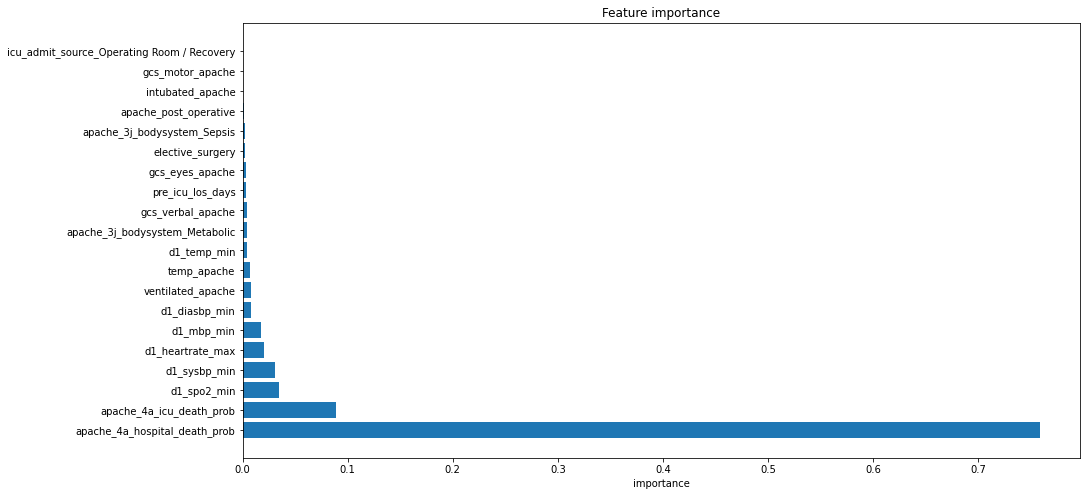

In [1243]:
plt.figure(figsize=(15,8))
plt.barh(important_features.index, important_features.values)
plt.xlabel('importance')
plt.title('Feature importance')
plt.show()